In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import jieba
import csv
import random
import numpy as np
PUCNTS = [' ', '\'', '\"', '-', '.']
stopwords_file=open('dataset/stopwords/my_stopwords.txt','r',encoding='utf-8')
my_stopwords=stopwords_file.readlines()
stopwords=[]
for item in my_stopwords:stopwords.append(item.replace('\n',''))
# stopwords = ['的', '呀', '这', '那', '就', '的话', '如果', '了', '么','你们','和','以及','建议', '说','是', '吧','我','你','之','一个','在','这个','被','啊','和','吗','觉得','就是','应该','认为','很','感觉','可能','会','下面']

In [2]:
import jieba
from tqdm import tqdm
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.engine.topology import Layer
from keras.layers import Embedding, Input, Dense, Conv2D, MaxPooling2D, Concatenate, Reshape, Dropout, Flatten, Lambda, LSTM, Bidirectional
from keras.models import Model
from keras import optimizers
import pdb
import matplotlib.pyplot as plt
from PIL import Image
import pickle
from keras import backend as K
import re
import codecs
from keras import initializers, regularizers, constraints
import gc
import time
from gensim.models import Word2Vec
from keras import regularizers
import argparse
import pprint
import gensim
from glove import Glove
from glove import Corpus

EMBED_SIZE=200
MAX_LEN= 30 #样本最大长度为100，但是大部分长度都在0-40
EPOCHS = 40
BATCH_SIZE = 512
VAL_SPLIT = 0.1 #数据量很大，验证集可以不用20%
PUCNTS = [' ', '\'', '\"', '-', '.']

D:\Anaconda3\envs\tensorflow\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [20]:
li = [
    u'\u3002', u'\uFF1F', u'\uFF01', u'\u3010', u'\u3011', u'\uFF0C', u'\u3001', u'\uFF1B',
    u'\uFF1A', u'\u300C', u'\u300D', u'\u300E', u'\u300F', u'\u2019', u'\u201C', u'\u201D',
    u'\u2018', u'\uFF08', u'\uFF09', u'\u3014', u'\u3015', u'\u2026', u'\u2013', u'\uFF0E',
    u'\u2014', u'\u300A', u'\u300B', u'\u3008', u'\u3009'
]

In [21]:
def is_symbol(xchar):
    if xchar in li:
        return True
    else:
        return False

In [5]:
def is_chinese(xchar):
    if xchar >= u'\u4e00' and xchar <= u'\u9fa5':
        return True
    else:
        return False

In [14]:
def is_number(xchar):
    if (xchar >= u'\u0030' and xchar <= u'\u0039'):
        return True
    else:
        return False

In [7]:
def is_alphabet(xchar):
    if (xchar >= u'\u0041' and xchar <= u'\u005a') or (xchar >= u'\u0061' and xchar <= u'\u007a'):
        return True
    else:
        return False

In [26]:
def is_japanese(xchar):
    if (xchar >= u'\u3040' and xchar <= u'\u309F')or(xchar >= u'\u30A0' and xchar <= u'\u30FF')or(xchar >= u'\u31F0' and xchar <= u'\u31FF'):
        return True
    else:
        return False

In [30]:
def count_text(x):
    dictnum={"chinese":0,'number':0,'alphabet':0,'japanese':0,'symbol':0,'other':0}
    for i in x:
        if is_symbol(i):
            dictnum['symbol']+=1
            print(i, end=' ')
        elif is_chinese(i):
            dictnum['chinese']+=1
        elif is_number(i):
            dictnum['number']+=1
        elif is_alphabet(i):
            dictnum['alphabet']+=1
        elif is_japanese(i):
            dictnum['japanese']+=1
        else:
            dictnum['other']+=1
    return dictnum

In [31]:
dataset = pd.read_csv('dataset/dataset.csv')
count=0
for item in dataset['content']:
    if str(item) == 'nan':
        dataset['content'][count] = ''
    count += 1
dictnum=dataset["content"].apply(lambda x: count_text(x))
# print(dictnum)

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


！ ！ ！ ！ ！ ， ， ， … … ！ ！ ， ！ ！ ！ ， ？ ？ ， 。 ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ！ ， ？ ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， 。 。 ， ， ， ， ， ？ ， ！ ， 。 ， 。 ， 。 ， ， 。 。 ， 。 。 。 。 。 。 ， ， ， 。 ， ， 。 ， ？ ？ ， ？ … … ， 。 。 。 ， 。 ， 。 ， 。 ， ， 。 。 ， ， ， 。 ， ， ， 。 。 ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， 。 。 。 。 。 ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， 。 ， “ ” ， 。 ， ， ， … … 。 。 ， ， ， ！ 。 ， ， 。 ， ， ！ ！ ！ ！ ！ ！ ！ ！ ， ， ， ， 。 ， 。 。 。 。 。 。 ， ， ， ， 。 ， 。 ， ： ； ， ！ ， ， ， 。 ， ， ， 。 ， ， ， 。 。 。 。 。 ， ， ， ， ， ， ， 。 。 。 。 。 。 ， 。 。 ， ， ， ， ， ？ ， ， ！ ？ 。 。 。 ？ ？ ？ ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， … ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， … ， （ ） ， ， ， ， ， ， ， ！ ， ， ， ， ， 。 “ ， ！ ” “ ， ！ ” ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， （ ） ， ， ， ， ， ！ ！ ！ ， ， 。 ： ， ， 。 。 ， 。 ， ， ， ？ ， ， 。 ， ， 。 。 。 。 ， ， ， ， ， ， 。 ， ， ？ ， 。 。 ， ， ， ， 。 。 ， 。 ， ， ， ， 。 ， ， （ ） ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ？ ， ！ ， ， （ … ） ， “ ” ， “ ” ， “ ” 。 。 ， ， ， … … ， ！ ， ， ， ， ？ ， ， ？ ？ ？ ， “ ” ， 。 “ ， 。 。 ， ， ， 。 。 。 。 ” ： ， ， ， 。 ， 。 。 

 ， ？ ， ， ， ， 。 ， 。 ， ？ ， 。 。 ， ， ， ， ， ， ， 。 。 ！ ， ， 。 ， 。 ， ： 。 ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ： 。 ， 。 。 ， 。 ， 。 ， 。 ， 。 ， ， ， ， 。 ， ， ， 。 ？ 。 ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ？ ？ ， ， ， ， ， ？ ？ ， 。 ？ ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， “ ” ， “ ” 。 ， （ “ ， ， ” ） ， 。 ， ， ， ， ， 。 ， ， ， ， 。 。 。 ， ， 。 ， 。 ， ， ： ， ， ， ， 。 ， ， “ ” ， ， ， ， ， “ ” ， ， ， 。 ， 、 。 。 ， ， ？ ， … ， ， ， 。 ， “ ” ， ， ， 。 。 ， ， 。 ， ， 。 ， ， ， 。 。 … … 。 ， ， ， ， ， ， 。 。 。 。 。 。 。 。 。 。 ， ， ， ， ， 。 ， ， ， 。 “ ” ， ， ， 。 ， ， ， 。 ？ ！ ， 。 ， 。 ， ， 。 ， ， ， （ ） ， ， 。 ， ， （ ： ？ ） 。 ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， 。 ， 。 ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， 。 。 。 “ ” 。 。 。 ， ， 。 ， ， ， ！ 。 ？ ？ ？ ， ， ， ， 。 ， ， ？ ？ ？ ？ ？ ？ ？ ？ ？ ？ ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， 。 ， 。 、 。 ， ， 。 ， ， “ ” ， ， 。 ， ， 。 ， ， ， 。 。 … … ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， 。 ： 。 ， 。 ， ， ， ？ ， ， ？ ？ ， ？ ， 。 。 。 。 ， ！ ， ， ！ ， ， ， 。 ， 。 。 。 。 ， ， 。 ？ 。 。 ， 。 ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， （

 ， ？ ， 。 ？ ？ ？ ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， 。 。 。 。 。 ， 。 ， ， ， “ ” ， ， ？ ？ ？ ？ ， ？ ， 。 ， （ ） ， ， ， ， ， ， ， ？ ， ！ ： “ ” ， “ ” ， “ ” ， ， ， 。 “ ， （ ） 。 ， ， 。 。 。 。 。 ， ， 。 “ ” ， 。 （ ） ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 “ ” ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 。 。 。 ？ ， 。 ？ ， ， 。 ， “ ” 。 ， ， ， 。 ， ， 。 。 。 。 ， “ ” ， ， ， 。 ， ， 。 ， ， ？ ？ ， ， 。 ， ， ， ， ， ， ， 。 ？ ？ 。 … … ？ ， ， ， 。 ， ？ ？ ？ ？ ， ， ， ， ， ， ， ？ ， ， ？ ？ ？ ， ， ， ， ， ， ， 。 ， ， ， ， … ？ ？ ， ， ， 。 ， ， ， ！ ！ ！ ， ， ， ， 。 ， ， 。 … … ， ？ ， ， ， “ ” 。 ， 。 ？ ？ ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， 。 ？ ？ ？ ？ ， ， ， ， ， ， 。 ， 。 （ ） ， ， ， ， ， ， ， ， 。 。 。 。 ， 。 ， ， 。 。 。 ， ， ， ？ ， ， ， ， ， ， ？ ？ ？ ！ 。 ， ， ， ， 。 ， 。 ， ， 。 。 。 。 。 。 。 。 。 。 。 。 。 。 。 ， “ ” 《 》 “ ！ ” 。 ， 。 “ ” “ ” 。 ， ， ？ 。 。 ， 。 ， 。 ， 。 ？ 。 。 。 。 。 ！ ！ ！ ， ， 。 ， ， 。 ， ， “ ” ， ， ， “ ” 。 。 — — ， 。 “ ” ， ， ， “ ” 。 。 “ ” ， ， ， “ ” 。 ， 。 ？ ？ ？ ， ， ， ， 。 。 ， ， ， ， ， ， 。 「 ， 」 ， ？ ？ 、 ， 。 ， ， ， ， ？ 。 。 ， ， ？ ？ ？ ？ ？ ？ ？ ？ ？ ？ ， ， ， ， ， ， ， ， ！ ！ ， ， ， ， 。 ， ， ， ，

 ， ， 。 ， ， ， ， ？ ， ？ ， ， ， ， 。 ， 。 。 ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ； 《 》 ， ； 《 》 ， 。 ， ， ， 。 （ ， ， “ ” 。 。 。 ） ， 。 ， ， 。 。 。 ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， … … ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， 、 ， ， ， ， ， ， 。 “ ” ， “ ” ， ， 。 ， ， 。 ， “ 、 ， ” 。 。 ， “ ” 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ？ ， ； ， ， ？ ， ， ， … … ， ， ， 。 … … ， ， ， 。 ， 。 。 ， ？ ？ ？ 。 。 ， ， ， ， ： ， ， 《 》 ， ， ， ， ， 。 … … ， 。 ， ， 。 ， ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， 。 ！ ？ ， ， ？ ， ， ， ， ， ！ ， ， ？ ， ， ， ， ， ， ， ， ， ， ， 《 》 ； ， ， ， ， 。 ？ ？ ， ？ ？ ？ ， ， ， ， 。 。 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， ！ 。 ， ， ， 。 。 ， ， ？ ？ ， ？ … … ， ， ， ， ， ， ， ， ， ， ， （ ？ ） ， ， 。 。 。 ， ， ， ， ， ， ， ？ 。 ， ？ ， ， ， ， ， ， 。 ， （ ） ， ， ， ， ， ， ？ ？ ， ， ， ， ？ ， ， ， ， ？ ， ， ？ ， ！ ， 。 ？ ， ， ？ ！ ， ， ， ， ， ， 。 ？ ， ， ， ， 。 ， 。 ， ， 。 。 ， ， ， ， ？ ， ？ ， ， 、 。 ， 。 ， 、 ， 。 ， ， 。 ， 。 “ 、 、 ” ， 。 ， ， 。 ， ？ “ ” ， “ ” ， ， ， “ ” 。 。 ， “ ” “ ” ， 。 ： ， ， 。 ， ， ， （ ） ， ， 。 《 》 ， “ ” “ ” ， ， ， ， ， “ ” “ ” ， ？ ， ， 。 ， 。 。 ， ？ ， ， ， ， 。 ？ ？ ？ ， ， “ ” “ ” “ ” 。 ， （ “ ” ） ， 。 ， … … ”

 。 ， 。 ， ， ， 。 ， 。 ， ， ， ， 。 ， 。 。 ， ， 。 。 ， 【 ， ？ 】 ， 。 ， ， ， ， “ ” 。 ， （ ） ， ， ， ， ， 。 ， 。 ， ， ？ ， ， 。 。 。 ， ， ， 。 。 ， 。 ， ， ， 。 。 ， ， ， ！ ， ， ， ， ， ， ？ ， ？ ， ， ， ， ， 。 ， ， ， ， … … “ ” ， ， ， ， “ ” 。 “ ” ， ， 。 ， 。 。 ， （ ） ， ， ， ， 。 。 ， ， ， ， … … “ ” 。 ， … … ， ， ， ， ， 。 ， ， 。 。 ， ？ ， ？ ， ， ？ ， 。 ， ， ， 。 ， ， ， 。 ， 。 ， 。 ， ， ， ？ ， ， ， ， ， ， ， 。 ： ， ， ， ， ， ， ， 。 ， ， ， ， ， ， “ ” 。 ， ， ， … … ， ， ， 。 。 。 ， 。 。 。 ， ， ， ， 。 ， ， 。 ， ， 。 ？ （ ） ？ ， ， ？ ， ， “ ” ， “ ？ ” 。 ， ？ “ ” ？ ？ ， ， 。 “ ” ， ， “ ” ， ， “ ” ， （ ） ， ， 。 ， ， 。 ， ， ， ， 。 。 ？ ， 。 。 。 。 。 ， ， ， 。 。 。 ！ ？ … ， ， ， ？ ？ ， ， ， 。 ， ！ ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 、 ， 。 ， ， 。 ， ？ ， ， “ ” ， “ ” ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， “ ” ， ， ？ … … “ ” ， ？ ？ ， ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ？ ， 。 ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ， 。 ， 。 ， ， 。 ， ， 。 ， ， ？ 。 ， ， “ ” ！ ， ， ， ， 。 ， 。 ， 。 ， 。 ， 。 ， ， ？ ， ， ， ， ， 。 ？ ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ？ ？ ？ ？ ， ： ， ？ ， ， ， ， 。 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ？ ， ， 。 ， ？ ， ， ， ， ， ， 。 ， ， 。 ，

。 ， ， ， ， ， ， ？ ， ， ， ， ？ ， ， ， ， ？ 。 ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ！ ， ， ， 、 、 ， 。 ， ？ ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ！ ， ， ， 。 。 ， ， “ ” ， （ ） ， ， ， ， ， ， ， ， ， ， ？ ， ， ？ ？ ， ， ， ， ， ， ， ， ， 。 。 ， ， 。 ， ， ， ， 。 。 “ ” 。 。 ， ， ？ ！ ， ， ， ， 。 ， ， “ ” ， ， ， ， ， “ ， ” “ ” ， ， ？ ？ 。 ？ ， ， 。 ， 。 ， ？ （ ） ， ， ， ， ， 。 ， ， ， ， ， ， 。 ！ 。 ， ， ， … … “ ‘ ’ ” ？ ， ， ， 。 ， 。 ？ ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ： 。 。 ， ， ， … … ， ， … … ， … … ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ？ ， ， 。 ， ， ， 。 ， ？ ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ！ ？ ， 。 ， ， ， ， ， 。 ， ， ！ ！ ！ ！ ！ ！ ， 。 ， 。 ， ， ， 。 ， ， 。 。 。 。 。 。 ， … … ， ， 。 ？ ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， （ ） 。 ？ ？ ？ 。 ， 。 。 ， ？ ， ， 。 。 。 ？ ？ ？ ？ ？ ， ， ？ ？ ？ … ， ， ？ ， ， （ ） ， （ ） ？ ， ？ ， ？ 。 （ ， ， ？ ） ， ， “ ， ” ， ， 。 ， ， （ ） ， （ ） ？ ？ ？ ， ？ ， 。 。 。 ， 。 。 。 。 。 ， 。 。 “ ” ， ？ ， ， ， ， ， … … … … ？ ， ， ， ， ， ！ ， ， ， ， ， 。 “ ” ， （ ） ， ， “ ” 。 。 … … ， 。 ， ， 。 ， 。 。 ， ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， （ （ ） ？ ， ， 。 。 。 。 

， ， ？ ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ？ ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， “ ” ， ， 。 ， 。 ， ， ， 。 ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， ？ ， 。 ， ， ， ， 。 ， 。 【 】 ， 【 】 ， ？ ， “ ？ ” 。 ， ， 。 ， ？ 。 ， ， 。 。 ？ 」 。 。 ， 、 ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， “ ” 。 ， ， ， ， 。 “ ” ， 。 ， 。 ， ， 。 ， 。 ， 。 。 ， 。 ， 。 。 。 ， ， “ ？ ” ， ？ ， 。 ， 。 ， ， 。 ， 。 ， ？ ， 。 ， 。 ？ ， ？ ， ， 。 ， ， 。 ： “ ” ： ： ： ” “ ” ， 。 “ ， 。 。 （ ） ， 。 （ ） ， 。 ， ？ ？ ， 。 。 ， ？ ， ， ？ ， 。 ， ， 。 ？ ， ？ “ ” ， ？ ， ， ， ， ， “ ” ， “ ” ， ， 。 。 ， ， 。 ， ， 。 ， ， ， 。 ， ， ， ？ ， ， 。 。 ？ ？ （ ） ！ ？ ， ？ ， ， ， 。 ？ ？ 、 ， 。 ， 、 ， ， ， ， 、 、 、 。 ， ？ ， ， … … ， ： 。 ， 。 。 ， ， ， ， ， 。 。 ， 。 ？ ， ， ， 。 ， ， ， ， ， ， 。 。 ， ： 。 ， 。 。 ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ？ 。 ， 。 ？ “ ” ： “ ” ， ， ， “ ， ” ， ， ， ， ， 。 《 》 ， “ ” ， ， 。 ， ， “ ” 。 ， ： ， ， ， ， 。 ， 。 ， “ ” ， 。 ， 。 ， ， ， “ 、 。 ” ， ， 。 ， 。 ， ， 。 【 】 ， ， ， ， 。 ， ， ， 。 ， 。 。 ： “ ” ， 。 ， 。 ， ， 。 。 。 。 ， ， “ ” 。 ， 。 ， ， 。 ， ， （ ） 。 。 。 ， ， ？ ， 。 。 ， ， ， ， ， 。 。 ， 【 】 ， 。 ， ， ， ， ， 。 ， ， ， ， ， “ ” ， 。 ， ， ， 。 … … ！ ， 。 ， 。 ， 

 ， ， ， ， ？ ， ， ， 。 。 ， ， ， 。 “ ” ， 。 ， 。 ， ， ， ， ？ ， “ ” ？ ， （ ） ， ， ， ， 。 ， ？ ， ， ， ， ， ， 。 ？ ， ， 。 ， 。 ， 。 ， 。 ， ， 。 ： ， ， ？ … … 。 ， “ ” ？ ？ ， ！ ， ， ， ， ， ？ ， ， 。 “ ” ， ， ， 。 。 。 。 。 ， ， 【 】 ， 。 ， ， “ ” 。 。 。 ， ， ， ， ， 。 ， 。 。 ， ， ， ？ 。 ， ， ， ， 。 ， 。 ， “ ” ， ， 。 ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ： （ ： 、 、 、 、 、 、 ） ， 、 （ 、 、 、 、 ） ， 。 ： ： ， 。 ， 。 。 。 ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， ？ 。 。 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， ？ ， ， ？ ， 。 ， ， 。 。 。 。 。 。 。 。 。 。 。 。 。 ， ， （ ） ， ！ ， 。 。 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， 。 ， ； ， 。 ？ ？ ， ？ ， … … ， ， ， “ ” 。 “ ” ， ， 。 ， 。 ， 。 。 。 。 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ： ， ？ ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 “ ” ， “ ” 。 ， ， ， ， ？ ， 。 。 … … ， ， … … ， ， 。 ， 。 。 ， … … ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， （ ） ， 。 ， 。 ， 。 ， ， ？ ， ， ， ， ， 。 ， ， ， ！ ， ， ， ， ， ， ， ！ ， ？ ， 。 ， ， 。 ， ， 。 ， 。 ， ！ ， 。 ！ ！ ！ … … 。 ， ， 。 ， ， 。 … … ， ， 。 ， ， ， ？ ， ， ， 。 ， 。 （ ， ） 。 。 ？ ？ ， ， ， ， 。 ， ？ 。 。 ， 。 ？ ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， 。

？ … … ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， 。 。 。 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 ？ ？ 。 。 “ ” “ ” 。 。 。 。 。 。 ， 。 ， ， 。 ， ， ， ， ， ， ？ ， ！ ， ！ ？ ？ ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 、 。 ， ， 。 ， ， 。 ， ， ？ ， 。 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ！ ！ ！ ！ 。 ， ， ， ， ， 。 ， ！ ， ， ， ， ， ， ， 。 ， ？ ， 。 ， 。 ？ ， 。 ， ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， 。 ， ！ ！ ， ， ， 。 ， 。 ？ ， ， ， ？ ！ ！ ： “ ” ： “ ” ？ ， ， ， 。 ， ， … … ， ， 。 ， ， ， ？ ， 。 ， ？ ， ， ？ ， ， ， ， ， ， ， 。 ， ， 。 。 。 ， ， ， ， “ ” ！ ！ ！ ！ ， ！ ！ ， ， ， ， ， ， ， “ ” 。 ， ， ！ ？ ， ？ ： ， 。 。 。 ， 。 。 。 ？ ， 。 。 。 ， ， ？ ， 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， … … 。 ， ， 。 ， ？ ？ ？ ， ， ， ， ， ， 。 ： “ ” 。 ： ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ？ ， ， ， ， ， ， ， ， ， ！ ， ， 。 。 。 。 ， ， ， ， ， ， ， ， ？ ， ， ？ ， ， ！ ： “ ” “ ” “ ” ： ， ， “ ” “ ” ， ， ， ， 。 ？ 。 。 。 。 。 。 ： “ ” 。 ： ， ， ， ， ， 。 ， ， ， ， 。 ， ， （ ） ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， （ ， ） ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ？ ， 

” ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ？ ， ， ， ， ， 。 。 。 ， ， 。 ， ， ， ， 。 ， ， 。 ！ ， ， ， 。 ， ， ， 。 。 。 ， 。 。 。 “ ？ ？ 、 、 、 ” 。 ， 、 。 ， 。 。 ， 。 ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 《 》 。 ， ， 。 ， ， ， ， ， ， 。 ， 、 ， ， ， ， ， ， ， 。 。 ， ， ， 《 》 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ！ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ！ ， ， ， ， ， ， 。 ， ， （ ） ， ， （ ） ， 。 ， ， 。 ， 。 ， 。 ， ， ， ， 。 ， 。 ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 。 。 ， 。 。 ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， （ ： 、 、 、 、 、 、 ） ， 、 （ 、 、 、 、 ） ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ！ ， ， ： 。 ？ ， ， ， ， ， “ ” “ ” ， ， ， ， “ ” “ ” ， ， ， ， 。 ， 。 ， （ ： 、 、 、 、 、 、 ） ， 、 （ 、 、 、 、 ） ， 。 ， ， ， ， 。 “ ” ， ， ， ， … … ， ， ， 。 ， ， ， ， ， ， ， ， … 。 。 。 ， 。 ， 。 ， ， 、 ， ， 。 ， ？ ？ ， ？ ， 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， 。 。 ， … … ， ， 。 ， ， … … ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， … ， ， （ ） ， … … 。 。 。 。 ， 。 ， ， ， 。 ， ， ， ， ， ， 。 。 。 。 ， 。 ， ， ！ ， ， ， ， ， 。 ， ， ， ， ， 。 ， 、 。 “ 

 ， 。 “ ” ， 。 、 ， ， “ ” 。 ， ， ， ？ ， ， ， 。 ， ， ， 。 。 。 ， ， 。 ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， 。 ， 。 ？ 。 ， ， ， “ ” ， 。 ， ， 。 ， ， 。 “ ” 。 。 “ ” ， “ ” 。 ， 。 。 ； ， ， 。 ， ， ， ， ， ， 。 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， （ ） ， ， ， 。 ， “ ” ， ， 。 ， 。 ， ， 。 。 ， ， 。 ， ， ， 。 。 。 。 ， ， ， ， ， ， ， ， ， ， （ ） ？ “ ， ” ， ， ， ， ， ， ， … ， “ ” 。 。 。 ， 。 。 “ ” ， 。 ！ “ ” ， ？ ， ， ， ， 。 ， 。 “ ” ， 。 ， ， ， ， ？ ？ ， 。 ， 。 ， 。 。 ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， 。 “ ” ， ， ， 。 ， ， 。 ， ， 。 。 ， 【 】 ， … … （ ） ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ？ ， ， ， 。 ， ， 。 ， ， ， 、 ， ， 。 ， ！ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ！ ， ， 。 ， 。 。 ， ， 。 ， ， 。 … … ？ ？ ， ， 。 ， 。 ， ， 。 ， ， ， 。 ？ ？ ？ 《 》 ， 。 （ ， ， ， ） 。 ， 《 》 ， 。 ， ， 。 。 。 ， ， ， ， ？ ， ？ ？ ， ， ， 。 ， ， ， ， ， ， 。 ， 。 。 。 。 ， 。 。 。 。 ， ， ， 。 ， 。 … … ， … … … … ， ， ， ， ， ， 。 。 ， ， 。 。 。 。 ？ ， 。 。 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ，

 ， 。 “ ” ， “ ” ， ， ， 。 ， 。 ， ， 。 。 。 ， ？ ？ ？ ， 。 ， ， 。 。 ， ， ， 。 。 ， ， ？ ， ， ， 。 。 ， ， ， ， 。 ， ， ， 。 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 “ ” ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， （ ） ， ， 。 ， ， ， ， ， ， （ ） ， ， ， 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ： ， ， ？ ？ ？ ， ！ ！ ， ， ， ， ， ， ， ， ， … ， ， （ ） “ ” ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ？ ， 。 ， ， ， 。 ， 。 ， 。 ， 。 。 ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， ， 。 。 。 ， ， 。 ， ， 。 ， ， ， 。 ， ， 。 ， 。 。 ， “ ” ， 。 ， ， 。 ， 。 ， ， ， 。 ， 。 ， ， ， ， （ ） ， ， ， 。 — — ！ ， 。 ， 。 ， 。 ， “ ” ， ， ， 。 ， 。 ， 。 ， 。 ， 。 ， ， 。 ， “ ” ， ， ， ， 。 ， ， ， 。 。 。 ， 。 。 ！ ， “ ” ， ， ！ ， ， ， ？ ？ ， ， ， ， ， ， ？ ？ ， ， ， ， ， 。 。 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ？ ， ， ， ， ， … ， ， ， 。 ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， 。 。 ， ， ， ， 。 。 ， 。 ， ！ ！ ！ ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ？ ， ， ， 。 ， ， 。 。 ， 。 ， 。 ？ ！ 。 ， ， 。 — — ？ ？ ？ （ ） ， ？ ？ 。 ， 。 ， ， ？ ？ ？ ， 。 。 。 ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ！ ， ， ， ， （ 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 、 ，

 ， ， ， 。 《 》 ， （ ： 、 、 、 、 、 、 ） ， 、 （ 、 、 、 、 ） 。 、 ， 。 ， ， ， ？ ， ， ， ， ， ， ， ？ ， ？ ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ； ， ， ， 。 ， 。 ， 。 ， ， 。 ， ， ， ？ ？ ？ ， ？ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 、 、 ， ， 、 、 。 ， ， ， ， ， 。 ， ， “ ” “ ” ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， 。 。 ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， 。 。 ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ： “ ， 。 ” ， ， ， ， ， 。 ！ ， ， … … ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 。 。 ！ ！ ！ ？ ？ ， 。 。 ， 。 ， ， ， ， ， ， ， ， ， ！ ！ ， ， ， ， 。 ， ， 。 。 ， 。 ： ！ ， ， ， ； ‘ ’ ， 、 ： ， ， ， ， 。 ？ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ！ ， ， ， ， 。 ， 。 ， ， ， 。 ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ， ， ， ， 。 ， ， 。 ， 。 ， ， 。 。 ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 。 （ ） ， ， ， ， ， ， ， … … ， ！ ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， “ ” ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， … … ， “ ” ， 。 。 ？ ， ？ ， ， ， ， 。 ， ， 。 。 。 。 。 。 ， ， ？ ？ “ ” ？ 。 。 ， ， 。 ！ 。 ， ， ？ 。 ， ， ， 。 ， ， ， ， ， ， ？ ？ ！ ， ， ， ？ 。 ， ， ， ， ， 。 、 、 。 ， ， ， ， 。 ， ， ， ， ， ， ， “ ” ， ，

… … … … 。 。 。 。 。 。 ， 。 。 。 。 ？ ， 。 ， ， 。 ， 。 。 ？ ， ， ， 。 “ ” ， “ ” 。 ， ， ， 。 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， ， 。 。 。 ， 。 ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， 。 “ ” ， 。 “ ” ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ！ ！ ， ！ ！ “ ” ， ！ ！ 、 ， “ ” ， 。 ， ， ， 。 。 。 ， 。 ， 。 ， ， ， “ ！ ！ ” ， ， “ ！ ！ ” ， ， “ ” ， “ ” 。 ， ， ， ， 。 ， ， 。 “ ” ， 。 ， 。 ， ， … … ， … … ， 。 ， ， ， 。 ， 。 。 ， 。 ？ ？ 。 ？ ， ？ … … ？ ？ ， ， ， ， ， ， ？ 。 。 。 ， ， ， 。 “ ” 。 ， ， … … ？ 。 。 ， 。 ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， 。 ， ， ， 、 。 ， 。 “ ” ， ， 。 。 ， ， ， ， ， ， ？ ， ， 。 。 。 ， ， ， ， 。 。 。 ， ， ， ， ， ， 。 “ ” ， ， 。 ， ， ， 。 ， ， ， “ — — — — ” ， ， ， ， ， ， 。 ， ， ？ ， ， ， ， “ ” ， “ ” ， “ ” 。 “ ” ， “ ” “ ” “ ” 。 ： 。 ： ？ ， “ ” 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ： ； ： ； ： 、 ， 。 ， ， ？ ， ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ！ 。 ！ ， ？ （ ， ） 。 ， ， ？ ， ， 。 ， ， ， ， ， ， ， ！ ， ， ， 。 （ ： ） ， ， ， ？ ！ 。 。 。 。 ， ： 。 ， ， ， “ ” ， “ ” 。 （ ： ： ， ， 。 。 ） ： ， “ ” 。 

 ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， … … ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ？ ！ ， ， ， ， 。 、 。 ， 。 。 ， 。 ， ， ， 。 。 ， ‘ ’ ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， “ ” 。 ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， “ ” 。 … … ， ， 。 。 ， 。 ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， “ ” ， 。 ， ， ， 。 ， ， ： ， ， ， 。 ， ， ？ ， ， 。 ， ， ， ？ ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， （ ） 、 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， … … … … … … ， ， ， ， ， ， ， 。 ， ， ？ ？ ， ， ， “ ” ， 。 ？ ， ， ， 。 ， ， 。 ？ ， 。 。 。 ， 。 ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， 。 ， ， “ ” ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ？ ， ！ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， ？ ， ， ， ， ， ， ， ， ； ， ， ； ， ， ， 。 ， ， 。 ， 、 、 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， 、 ， ， ， ， ， ， ， “ ” ， ， 、 ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 。 。 。 ， ， ， ， 。 。 。 ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， … … ， ， ， ， ， ， ， 。 。 ： “ ， ， 。 ” 「 」 ， ， ， “ ” ， 。 ， ， ，

 。 ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， （ 。 。 。 ） ， ， ， ， ， ， ， ， ， ， ， ！ ！ ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， ！ ！ ！ ， 。 ， 。 ， ， ， ， 。 。 ， ， ， 。 ， ， ， 。 ， ， 。 。 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 《 》 ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， 。 ， 。 。 。 ， 。 ， ， ， ， ， ， 。 。 。 ， ， 。 ， ， ， ， ， ， … … ？ ！ 。 ， 。 、 、 、 、 ？ ！ ？ ！ ， ， ， 。 ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 ， 。 ？ ， ， ， ， 。 ？ ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ？ ， ， 。 。 ， 。 。 ， 。 。 ， 。 ， ， ， ， 。 。 ， ， ？ ， ， ， （ ） 。 ， ， ， ？ ， 。 （ ） ？ ， ， 。 （ ） ， 。 ， ， （ ） 。 。 ， ， ， ， ， 。 ， 。 ， 。 。 。 ， ， ， ， 。 ， ？ ， ， ， ， ， “ ” “ ” ， ， 。 ， ， ， ？ ， ， ， ， 。 ， 。 ， 。 ？ 。 ， 。 ， 。 ， ， ， ， 。 ， ， 。 ， ， ， “ ” ， ， ！ “ ” ， ， ， 。 。 ， ， ， ， ， 。 ， “ ” 。 “ ” “ ” 。 。 “ ” 。 。 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ （ ） ” ， “ ” “ ” ， ， ， “ ” “ ” ， 。 ， ， 。 ， ， 。 ， ， 。 ， ，

， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， “ ” ， ， ？ ， ， ， ， ， ， ， ， 、 。 。 。 。 ， ， 。 ， 。 。 ， ， ， ？ ， 。 ， ， ， 。 。 ， 。 ， ， ， 。 ， ， ， 、 、 ， ， ？ ， ， ， ？ 。 。 。 ， “ ， ， ” 。 ， ， “ ” 。 — — ， “ ” ， “ ， ” ， ， （ ） ， ， ， ， ， ， ， ？ ， 【 】 【 】 。 ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ？ ， ？ ？ ， ， 。 。 ， ？ ？ 。 ， 。 ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 、 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ？ ， ， ， ， ， ？ ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ， ， ， 。 ， “ ” ， ， 。 ， ， 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， ？ ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ！ ！ ， ， ， “ ？ ” ， ， ， ， 。 ， ， ， ， ？ 。 ， ， 。 。 ， ， ， ， 。 ， 。 ， ， 。 、 ， ， ， ， ， ， ， ， ， 。 ， ， 。 “ ， ” 。 ， 。 “ ” ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， 。 。 。 ， ， ， ， 。 ， ， 。 ， 。 。 。 ， 。 ， 。 ， ， … … … ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ？ ， ， “ ” ， 。 ， （ ？ ？ ） ， ， ， 。 ， 、 。 。 。 。 ， ， ， ， ？ ， 

， ， ， ， 。 “ ” ， ， 。 ， 。 ， 。 “ ， ” ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 。 。 ， ， 。 ， 。 ， ， ， ， “ ” ， 。 ， ， ， ， ， 。 ， ， ， ， ， ！ ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ！ ， ， ， ， “ ” ， ， ， ， ， ， ？ ？ ， ， 。 ， 。 ， ， ？ ， ， ， ， 。 ， 。 ， 。 ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 。 “ ” ， ， ， ， ， ！ （ ， ） ， ， ？ ， 。 ， ， 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ？ ， 。 ， ， ， ？ ， 。 ， ， ， 。 。 。 ， ， ， ， ， （ ， ， ， ， ！ ） ， ， … … ， ， ， ， ， ， ， ， 。 （ ， ， ， ， ！ ） ， ， “ ” ， “ ” “ ” ， 。 ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， 。 ， 。 ， ， ， “ ” ， 。 ！ ， ， 。 ， 。 ， ， ， ， ， ， 。 ， ， 。 … … ， 。 。 ， ， ？ ， ， ， ， 。 ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， ， … … ， ， “ ” ， ， ， “ ” ！ ！ 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， “ ” （ ， ） ， ， ！ ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， 。 。 。 ， ？ ， ， ， 。 ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， 。 ， 。 。 ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， 。 。 ， ， 。 ， 。 ， ， ， ， ， 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 “ ” “ ” “ ” ， 。 。 ， ， ， 。 ， 。 ， 。 ， ， 。 ， 。 ， ， 。 ， ， ， 。 ， 。 ， ， 。 ， 。 ， ， 

 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ？ ， （ ） ， ， 。 ， 。 。 ， 。 ， ， ？ ， ， ， ， ， ， ， 。 。 。 。 。 。 ， ， 。 ， 。 ， ， ， ， ， ！ ！ ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ？ ？ ， ， 。 ， ， 。 。 。 。 。 。 ， ， 【 】 ， 。 ， ， ， 。 ， ， ， ？ “ ” ， … … ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 。 。 。 。 。 。 ， “ ” ， ， 。 。 。 ， ， ， ， ， ， ， 。 … … ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， 。 。 。 。 ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， 。 。 。 。 ， ， ， ， ， 。 ， ， 。 “ ” ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， … ， ， ， “ ， ” ， “ ” 。 。 。 ， “ ， ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， … ， ， … … ， ， ， ， ， ， ， ， ， ， （ ， ） ， ， 。 ？ 。 ， ， ， ， ， ， ， ？ （ ） （ ， ） 。 。 ， ， ， ， “ ” ， ， ， ， ， ， ， 。 ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ！ ！ ！ 『 』 ， ， ！ ， ， ？ ， ， ， ？ ？ 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， 。 。 ， ， ， 。 。 ， ， ； ， ， ， 。 “ ” ， “ ， ， ” 。 。 。 ， ， “ ” ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， （ ） ， 。 ， ， ， ， ， ！ ， 。 ， 。 ， ， ， 。 ， ， 。 （ “ ” ） ， 、 ， ， 。 ， ， “ ” ， 。 。 ， ， ， 。 （ ， ） ， ， ， ， 、 、 ，

， ， ， ， ， ， ， ， ， … … ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ？ 。 “ ” ， “ ” ， ， ， ， ， ， ， （ ） ， ， ， （ ） ， ， ， ？ ？ ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， “ ” ， ， ， “ ” ， ， 。 ， ， ， 。 ， “ ” 。 “ ” ， ， ， 。 ， 。 ？ ， “ ” “ ” ？ ， ， ， ， ， 。 。 ， ， （ ） ， ， ， ， （ ？ ） ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， 。 ， “ ” 。 。 ： ？ ！ ！ ， ， ， ， ， ， ， ， ， “ ” 。 “ ” 、 “ ” 、 “ ” ， ， ， ， ， ， ， ， ， ， 。 。 。 。 。 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ！ ， ， ？ ， ， 。 ， “ ” ， ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， 。 ， “ ” 。 ， ， ？ ， ， ， ， ， ， ， ， ！ ， ， ， ， ， 。 ， 。 “ ” ， 。 。 ， ， ， ， ， ， ！ ， “ ” ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， 。 ， “ ， ， ” ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ！ ！ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ； ， 。 。 ， ， ， ， ， “ ” ？ 。 ， ， 。 ， 。 ， ， ， “ ， ， ” 。 ， “ ， ， ” 。 … … ！ ！ ！ ， ， ， ， ， ！ ！ ， ， “ ” “ ” ， ， “ ， ， ” 。 ， “ 

 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ？ ， ， ， ？ ？ 。 “ ” ， ， ？ ， 。 ， 。 ， ， “ ” ， “ ， ” ， ” ” ， 。 。 。 ， ， ， ， 。 。 ， 。 ， ， ， ， … … ， ， ， ， 『 』 。 ， ？ ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ？ ， ， ？ 。 ， ， ， ？ ， ， ， ， ？ ， 。 ， ， 。 ？ 《 》 ， ， ， ， ， ： ， 。 ？ ， ， ？ ， ， ， 。 ， ， ， 。 ， ， 《 》 ， 。 ， 、 ， ， 。 ， ， ， ， 。 。 ， 。 ， 。 。 。 ， ， ， ， ， ， 。 ， ， 。 ， ！ ？ ？ ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， … … ， ， 。 ， ， ， 。 ！ ： （ ） ， ， 。 ， ， （ … … ） 。 ， ： 。 ， ： 。 ， ， 。 。 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ！ … … ， 。 ， 。 … … ， ， ， “ ” ， ， 。 ， ， ， ， ， ， 。 ， ， ， （ ） ， 。 ， ， 。 ， ， 。 ， ？ ？ 。 。 ， ， ， ， 。 ？ ， ， ， 。 ‘ ， ， ， ， 。 。 ， ， ， ， ， 。 。 ， 。 。 ， 。 ？ ” ， ， ？ ， ？ ， ？ ？ ？ ， 。 ， ？ ？ ？ ， ， ， ， ， ， ， ， 。 ， 。 … … ， 。 ， ， ， ！ ， 。 。 。 ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ！ ， ？ ， ， ， ， … … ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， （ “ ” ） 。 。 （ 。 “ ” ， 。 “ ” 。 ， 。 ） ， ， 。 ， ， ， ？ ？ ， ？ 。 ， ， ， 。 “ ， ” 。 ， ， ， ， 。 ， ！ ， ， ， ！ ， 。 。 ， ， ， ， 。 ， ， ， ， ， 。 。 ， 。 ， ， ， ？ ， ， ， 。 ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， （ ） ， 。 。 ， ， ， ， ， ， ！ ： ， ， ， ， ， ， ， 。 ， ， ， ？ ？ ？ ，

 ？ ， ， ， ， ， 。 ， ， ， ， 。 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， 。 ， ： ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， 。 ， ？ “ ” ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 。 （ ） ， ， ， “ ” 。 ， ？ ， ， ？ ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， 。 ， … … … … ， ， ， 。 。 。 。 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 。 ， 。 ， ？ ！ ， ， ， ， ， ， ， ， ， ， ， ？ ？ 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， 、 ， ， ， ， ！ ！ ， ！ ！ ！ ， ， ！ ！ ！ ！ ！ ， ！ ， ！ ！ ， ！ ！ ， ， ， ， ， 。 ， ， ， ， 。 ， 。 ， ， 。 。 ， 。 ？ ？ 。 “ ” ， ？ ， ， ？ ， 。 ， ， 。 。 ， 。 ， 【 】 ， ， ， ！ 。 ， ， ， 。 ？ ？ ， ， ， ， 。 ， ？ ？ ？ ， ？ ， ， ， ， ， ， 、 ， ， ， ， ， 。 ， ， 。 ， 。 ， ！ 。 。 。 ， 。 ， 。 ， ， 。 。 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ！ ， ， 。 ， ， “ ” ， ！ ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ！ ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 。 ， ， ： ， 。 ？ 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， … … ， ？ ， 。 ， ， ， ， ， ， ， ？ ， 。 。 ， ？ ？ ， ， 。 ， ？ ？ ， 。 ， ， ， ， ， ， ？ 。 ， ， ， ， ， 。 ？ ？ ？ “ ， ， ” ， ， ， ， ， ，

。 ， ， 。 ， 。 。 ， ， ， ， ， ， 。 。 ， 。 ， ， ， “ ” 。 （ ？ ？ ） ， 。 （ ） ， ， （ ） ， 。 ， ， ， 。 。 。 ， ， 。 “ ” ， ， “ ” ， ， ， ， ， ， ， 。 。 。 。 。 ， 。 ， 。 ， ！ ， ， ， ， ， ， ， ， ， ， ， ， ， “ ， ” ， ， 。 ， ， ， ， ， ， 。 、 ， ， ， ， ， ， ， ， ， ， （ ， ） ， ， ， ， ， ， 。 ， ， 。 。 。 ， ， ， ， ， 。 ， ， 。 。 ， ， （ ） 。 ， ， ， ， ， ， 。 。 。 ， ， ， 。 ， 。 。 ， 。 ， ？ ， 。 。 ， ， ， ， 。 ， 。 。 ， … … ？ ， ， 。 。 。 ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， … … ， ， 。 ， ， ， ， 。 “ ” ， ， ， 。 ， ， ， ， ， ， ， 。 。 ， ， 。 ， 。 。 ， ， 。 。 。 ， ， 。 ， 。 ， 。 ， ， ！ ， 。 “ ” ， 。 ， 。 ， ， ， ？ ， ， ， ， 。 ， 。 ？ ， ， ？ ， ， ， 。 ， “ ” “ ” ， ， ， 。 。 ， ， ， 。 ？ 。 ， 。 。 ， ， ， ？ ， ， ， ， ！ ， ！ ， ， 。 ， ， ， ？ ？ ？ ， ， ， ， ， ， … … ？ ？ ， ， ， ？ ？ ， 。 。 。 ， “ ” ， ， ， ， ， ， ， ， “ ” ， ， ， ， 。 。 ， 。 ， ， 。 。 ， ， 。 ， … … ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ？ “ ” 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， … … … … ， ， 。 ： “ ” 。 ： “ ” 。 ： “ ” 。 ， ， ， ， ， ， ， ， ， 。 ， ？ ， 。 。 ， ， ？ ， 。 。 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ？ ， ， ， ， 

， ， ， ， ， 。 ， 。 。 ， ， ， ， 。 ， ， 。 。 。 。 ， ， 。 ， ， ， 。 ， 。 ， ， ， 。 ， ， ？ ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 。 ： ， ， ， ， ， ， ， ， ？ ， 。 ， 。 。 ， ， 。 ， ， 、 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， 。 。 ， ， 。 ， ， 。 。 ， ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， 。 ？ 。 、 “ ” 。 。 。 。 。 。 。 。 。 。 。 ， ， ， ， ， ， ， ？ ， ！ ， ？ 、 ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， 。 。 ， ， ， ， ， ， 。 ， 。 ？ ， ， ， ， “ ” ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， 。 。 ， ， “ ” 。 。 ， ， ， ， ， … … ， ？ ， ， ， ， 。 。 。 ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， ， 。 ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 … … ？ ， ， ， ， ， ， 。 “ ” ？ ？ ？ ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ！ ， ， ， ， ， ， ， 。 ， ， ？ ， 【 】 。 ， ， ， 。 ， ， ， ， 。 ， ， 。 ， （ ） ， ， ， 。 。 。 … … ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ： ， ， ， ， 、 、 ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 （ ） ， ： ， ， ， ， ， ： ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ？ ， ， 。 。 ， 。 ， ！ ， ， ， ， 。 ， ， ， 

 ， ， 。 ， ” “ （ “ ） 。 ” ， “ 。 ， ， ， ， ， ， ， “ ” ， “ ” ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ！ ， ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ！ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 、 。 ， 《 》 。 ， 。 ， ， ， ， ， ？ ， ， ， ， ： ， 。 ， ， ， 。 ， 。 。 。 ， 。 ， ， ， ， ， ， ， ， 。 ， 、 。 ， ， ， ， ， ， ， ？ ， ， ， ， ？ ？ ， ， 。 ， ， ， ， ， ， ， ， ， ？ ？ ： ？ ， ？ ， ， “ ” “ ” “ ” ？ “ ” ， 。 ， 。 ， ， ， ， 。 。 。 ？ ？ ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， （ ？ ） ， ， ， ， 。 ， ， … … （ ） ， ， 。 ， ， ， 。 ， “ ” 、 “ ” （ ） ， ， 。 。 （ ， 。 ！ ） ， ， ， 。 ， ， 。 ， ， 。 … … ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 、 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， 。 。 ， “ ” ， ， ， ， ， ， ， 。 。 ， ， 。 ， ， 。 ， ， 。 ， ， 。 。 。 ， … … 。 。 ， ， 。 ， ， ， ？ ？ ， ， ， ， ， ， ， 。 ， 。 。 ， 。 ？ ， ， ， ， ， ， ， ， 。 。 。 ， ， （ ） ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ！ ， ， 。 ， ， 。 ， “ ” ， ？ ， ， ， ， ， ， ， ， 【 ！ ， ， 。 ， 。 。 ， ， ， ， ， ， ， “ ” ， ， ？ 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ？ ， ， 。 ， … … ， … … … … 。 ， ， ， ， ， ， ， 。 ，

， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ？ ， ， ， “ ” “ ” 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， 。 。 ， ， ， ， “ ” ， ， ， ， ， ， ， “ ” ？ ， ？ ， ， ， 。 “ ” ？ “ ” 。 ， ， ， … … ， 。 ， ， ， 。 ， ， ， 。 。 ， 。 ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， 。 。 ， ， 。 。 。 。 ， ： 。 ： ？ 。 ： ？ ？ ， ， ， ， ， 。 “ ” ， ， “ ” ， 。 。 ， ， 。 。 ， ， ？ ， ， ， ， ， ， ， ： ， ？ ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 。 。 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 。 ， 。 【 】 。 ， ， 。 ， ， ， ， ， ， ， ？ 。 ， 。 。 ， 。 ， ， ， ？ ， ， ？ ， ， ， 。 ， ， ， ， ， ， 。 。 ， ， 。 。 ， 。 。 。 ？ ， ， ， ， 。 ， ： ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 、 。 ， ， ， 。 ？ ， ？ ， 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ！ ， ， ， 。 ， ， ， ， ， … … … … ， “ ” — — 。 ， ， ， ， ， 。 。 “ ” ， ， ， “ ” 。 ， ？ ， 。 。 “ ” ， “ ” “ ” ， “ ” ， “ ” “ ” ， 。 ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ！ ， ， “ ” 。 。 ， ？ ， ， ， 。 ， ， 。 。 。 。 ？ ， 。 ， ， ， ， … … ， 。 ， 。 。 。 ， ， ， ， ， ， ， （ ） ， 。 ， 。 。 ， ， ？ ？ ？ ， ， ？ ， ， ， ， ， ， ， 

， ， 。 ， 【 】 【 】 。 ， ， ， ！ ！ ， “ ” 。 ， ， ， ， ， 【 】 【 】 。 ， ， ， ， 。 ， ， ， 。 。 。 ， ， 。 ， ， 。 。 ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， （ ， ， 。 、 ， ， 。 ） ， ， ， ， ， ， ， ， ， 。 ， ？ ， ， ， ， ， ？ ， ， ， 。 ， 。 。 ， 。 。 ， ， ， 。 ， ， ， 。 ！ ， ， ， ， ， ， 。 （ ） ， 。 ， ， ， ， 。 ， ， 。 。 “ ” “ ” “ ” 《 》 “ ” 。 。 ， ！ ， ， 。 ， ， ， 。 ， ， ， “ ” ， 。 ， ， ， 。 。 ， ， ， ？ ， ， … … … … ， ， ， ， ， ， ， ， ， 。 。 ， 、 ； ； ； ， ， 。 。 ， ， ？ ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ？ ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ？ ， ， 。 ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， （ ） ， 。 。 。 。 。 。 ？ ， “ ” ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， … … ？ “ ， ” ？ ， ？ ， 。 。 ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 。 。 。 。 ， ‘ ， ’ ？ ？ ？ ， 。 ， 【 ？ 】 ， ， ？ ？ ？ ， ， 。 ？ ， 。 ， ， ， 。 、 。 ， ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， ， ， ？ ？ ？ ， ， ， ， 。 。 ， ？ ， ， ？ ， “ ” “ ” 。 。 ， ， ， 。 。 。 ， 。 ， ， ， ， ， ， ， ， 。 。 “ ” 《 》 “ ， ” ； 《 》 “ 、 ， ” 。 。 ， ， ， ， ， 。 。 。 。 。 ， ， ， 。 ， 。 ， ， ？ ， ， 

 ， 。 ， 、 ？ ， ， 。 ， 。 … ， 。 。 。 。 ， ， ， ， ， ， ， ？ … … ， ， 。 ， 。 。 。 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 ， … … 。 ） ， ， ， ， ， 。 ， 。 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， ， ， 。 ， 。 ， ， ， ？ ， ， ， ， ？ ！ ！ 。 。 ， ， ， ？ 。 ， ？ ？ ， ， ， ， ， ， ， ， ！ ， 。 。 ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ？ 。 。 ， ？ ， 。 ？ ， ， ， 。 ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ？ ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， 。 。 。 ， ， ， ， ， 。 ？ ？ 。 《 （ ） 》 “ ” ： 。 ， 。 。 。 ， ， ， ， ， ， 。 ， 。 ， 。 。 ， ， ， ， ， 。 ， ， 。 。 。 。 ， ， 。 ， 。 ， 。 ， ？ 。 。 。 （ ） ， 。 ， ？ 。 。 ， ， ， ， ， ， ， ？ 。 … … 。 。 。 ， ， “ ” （ ） ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， 。 ， ， ， ， ！ ， ， 。 ， ， … … … … ？ ？ ， ， ， ， 。 ？ ？ ， ， ， ， ， ， ， ， ， ！ ！ ！ ！ ， ， ， ， ， ， ， ？ ， ？ ！ ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， … … 。 ， ， … … 。 ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ？ 。 ， 。 ， ， 。 ， ， ， 。 ， 。 、 、 “ ” ， 。 ， 。 ， 。 ， 。 ， ， ， ， ？ ， ， 。 ， ！ ？ ？ ， ！ ！ ？ ， 。 ， ， 。 。 ， （ ） ， 。 ， ， ， ， ， ， ， ？ ， ！ ？ ， ， ， ， ， ， ， ， 。 ， ， ！ ！ ！ ！ ！ ！ ， ， 。 ， 。 ， 。 ， “ 、 ” ， “ ” 、 “ ” ， 。 ， 、 、 、 … … ， ， 。 … … … … ， ， ， ， ， ， 。 ， ， ， ，

， ， 。 。 ， ， ， ！ ， ， ？ ？ 。 ， ， ， ， ， … … ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， 。 。 ？ ？ ？ ， ， ， ？ … … ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， 。 ？ ， ， ， 。 （ ， ） ， ？ ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， ， 。 。 。 ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ？ 。 ， ， ， ， ， ？ ？ ， ， ， ， ？ ， ， 。 ， 。 ， ， 。 ， ， ， “ ” ， ， ， ， ， “ ” ， ， “ ” ， 。 ， ， ， ， ， “ ” ， ， ， ， （ ） ， ， ， ， ， … … ， ， ， （ ） ， 。 、 、 、 ， ， ， 。 ， （ ） ， ， ， 。 “ ” ， ， 。 ， 。 ， ， 。 ， ， ， 。 ， 。 ， ， ， ， 。 ！ ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ！ 。 ， ， ， ， ， ， ， ， 。 ， 。 。 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ， ， 。 ， ， 。 。 。 ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ！ ， ， 。 ， ， ， ， ， ， 。 ， ， 、 ， ， ， 。 ， ， ， ， ， ， ， 。 ， （ ） 。 ， ？ ， ， ， ， 。 。 。 。 ， 。 。 。 ， ， ， ， 。 ， ， ， ， ， ， （ ） ， （ ， ， ） ， ， ， 。 ， 。 ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ？ ？ ？ ， ， ？ ， ， 。 ， ， ？ ， 。 （ ） ， ， 。 。 。 ， 。 ， ？ ？ ？ ， ， ， 。 。 ， ， 。 。 ， ， ， ， 。 ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ！ ， ， … … ， ， ！ ， ， ， 。 ， ， ！ ！ ！ ， ， ， ， 

。 ， 。 ， ， ， ， “ ” ， 。 。 。 ， 。 。 。 。 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ， ， 。 ， ？ 。 ， ， ！ ， 。 ， … ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ？ ， 。 ， 。 （ ） ， ， （ ） ， （ ） 。 。 ， 。 ？ 。 。 ， 。 ， （ ） ， … … ， ， ， ， ， ， ， 。 “ ” 。 。 ， “ ” ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， … … ， ， ， ， 。 （ ） ， ， 。 ， ， 。 ， ， ， ？ ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ‘ ’ 。 ， ， ， 。 ， ， ， ， ， … … ！ ， 。 ， “ ” ， ， ， 。 。 ， ， ， 。 。 ， ， 。 ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ！ ！ ！ 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， “ ” 。 ， 。 ， ， … ， 。 ， ， ？ ， ， ， 。 ， ， ， ？ 。 ， 。 ， 。 ， ， 。 。 。 ， ” ， ， ， ， ， 。 ， 。 。 ， ， ， ！ ， ？ ？ ， ？ ？ ？ 。 ， ， ， ， ， ， ， ， ， 。 “ ” 。 ， ， 。 。 ， ？ ？ ？ ？ ？ ， ， ， ？ ？ ， ， ， ， ， 。 ， ？ 。 ， ： ， ， ， ， ， ， 。 ， ， “ ， ” ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ？ “ ， ” ， ， ， 。 ？ ？ ， ， 。 。 。 ， ， ， ， 。 ， 。 ？ ， ， ， ， ， 、 ， 。 ， ， ， ， ！ ， ， ， ， 。 “ ” “ ” ， ， ， 。 ， ， 。 ， 。 ， 。 ， 。 ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ： “ ， 。 ， ， ， ， 。 ， ， ， ， ， 。 ” 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 。 、 ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， 

， ， ， 。 … … ， 。 （ ） ， ？ ， ， ， ， 。 。 。 。 ， ， 。 。 。 。 。 。 。 ？ 。 … … 。 。 。 。 。 。 ？ 。 。 。 。 ， 。 。 。 。 。 。 。 。 。 ， ， ， 。 。 。 ， ， ， ， ， 。 。 ？ ？ ？ （ ， ） ， 。 。 ， ， 。 （ ， ） ， ， ， ， ？ ， ， ， ， 。 … … ， 。 。 ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， … 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， （ ） ？ ， ， ， ， 、 、 ， 。 。 ， … … ， ， ， 。 ， ？ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ？ 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ？ ？ 。 ， ， ， ， 。 ， ？ ？ ， ， 。 ， ， ？ ？ ？ 。 。 ， ？ ？ ？ ？ 。 ， ， ？ ？ ， ？ ， “ ” ， ， 。 ， ， ， ， ， ， ， ， ， ， ， … … ， ？ ， ， ， ？ ？ ， ， 。 ， ， ？ ， ， ， ， ， 。 ， ， ？ ， ， ， ， ， ， ， 。 ， 。 ， ， ， ？ ， ！ ， ， ， ， 。 ， ， 。 ， ， ， ！ 。 。 ， 。 。 。 ， 。 ， ， ， ， ， 。 ， ？ ， ， ， 。 ， ， ， ， ， ， “ ” ， 。 。 。 ， ， 。 ！ ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ， 。 。 ！ ， ， ， ， 。 ， ， ？ ， ， 。 ！ ！ 。 。 。 。 ， ， ， 。 ， ， ， ， ， ， 。 （ ） ， ？ ？ ， ， ！ ， 。 ， ， ， ， ， 。 。 ， ， ， ， ！ （ ， ， ？ ） ？ ， 。 ， ， ？ ， 。 。 。 ？ ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ！ ！ （ ） ， ， 。 ， ， ， ， ， ？ ， ， ， ， ， ， “ ， ” … … ， ， ， ， ， ， ， ， 。 。 ， ， 。 ， 。 。 ， 。 。 。 。 。 。 ？ ， ， ？ ！ ？ ？ ， （ ） ？ ， 。 ？ 。 

 ， ， 。 ， ， ， ， ？ ， ？ ？ ？ ， ？ 。 。 。 。 。 ， ， ， 。 。 。 。 。 ， 。 ！ ， ， ， ， ， ， 。 。 ， ， ， ， ？ ， ： ， ， ， ， 《 》 ， ， ， 。 ， ， 。 ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， 。 … ， ， ， ？ ， ， ， ， ？ ， ， ， “ ” 。 ？ ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， ， ， ！ ， … … ， ， ， ， ， ， ， ， ， ， ？ ， ， ， 。 。 。 ， 。 ， ， ， ， 。 。 ， ， ， ， ， ， ！ ！ （ ） ， “ ” ？ ， “ ， ， ” 。 ， ， ？ ， “ ” “ ， ” 。 ， ， 。 ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， 。 ， ， “ ” ， ， 。 ， （ ’ ’ 。 ， ！ ， 。 ， ， 。 “ ” ， ， ， ， ， ， — — 。 ， ， “ ” 。 ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， 。 … … 。 。 。 ， “ ” ， 。 。 。 ， ， ， 。 ， ， 。 ， 。 ， ， ， “ ” 。 … … ？ ， ， 。 ， ， 。 ， 。 ， ， ？ ， ， ！ ？ ： ， ， ， ？ 。 ， ， 。 。 — — ， ， 。 ？ 。 。 ， 。 ， ， ？ 。 ， 。 ， ， ， 。 ， ， ， 。 。 ， ， ， ， 。 ， ： 【 ： ， 】 ， 。 ， 。 。 。 ， ， ， 、 、 、 ， ， 。 。 ， 。 ， ， 。 ， ， 。 ， ， ， （ ） 。 ： ， 。 ： ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， 。 。 （ ） ， ！ ， ， 。 ， ， ， ， ！ ！ ！ ！ 。 ， 。 。 。 ， ？ ？ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ！ ， … ？ ， ， ， ， ， 。 。 ， ， ， 。 ， 。 ！ ， ， ， 。 “ ” ， ， — — ， ， ， ， ？ ， 。 ， ， ， ， ，

， ， ， ， 。 ， ， ， ， ， ， ， “ ” 。 ， 。 。 ， ， ， ？ ？ 。 ， ， ？ 。 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， ， 。 ， 。 ？ ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ！ 。 ， “ ” 。 ， ， 、 ， ， ， ？ （ ， ， ， ， ， ， ， ？ ， ， ， ， 。 ！ ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ！ ， 。 ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， “ ” ， ， ， ？ ？ 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 。 。 ， ， ， ， ， 。 ？ ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ？ 。 ， 。 。 ， ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， 。 ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， 。 ， “ ” ， 。 ， 。 。 ， 。 。 。 ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， ， 。 ， … … ， ， ， ， ， ， ， 。 ， ， ， ？ ， ？ ， 。 。 “ ” ， ？ ！ ？ 、 、 ， ， ， ， “ ” ， 、 ， ， 。 。 。 。 ， ， ？ ， ？ ， 。 。 。 ， ， ， 【 】 ， ， ， ？ ， ， 。 。 。 ！ 。 ： ， （ ） … … ， ， ， ？ ， ， 。 ？ ， ， ， ， ， ？ 。 ， ， 。 。 。 。 ， 。 ， ， ， ， ， 。 ， ， … … ， ？ ， ， ！ ！ ！ ， 。 ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ？ ， 。 。 。 。 （ “ ” ） ， ， ， ， ， ！ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ 。 。 。 ？ 。 。 。 ： ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， … … ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 。 ， 。 。 。 ， ， ， ！ ！ ， ， ？ ， “ ” 。 。 （ ， ； ， （ ） 。 ） ！ ， 。 ， ， ？ ， ？ ， ， 。 。 ， ， ， 

 ， ？ ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ 。 。 ， ， ， ， ， ， 。 ， “ ， ” ， ， ？ ， ， ， ， ， ！ ， ， 。 ， “ ， ” ， 。 ， 。 ， 。 。 。 ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， （ ， ） ， ， ？ ， ， ， ， 。 ， ， 。 ， 。 。 。 。 ， ， ， ， ， ， ？ ， ， ， ？ ？ 。 ， ， ， ， 。 ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， “ ， ” ， ， “ ” ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 “ ， ” 。 ， ， ？ ？ ， ， 。 ， ， ， 。 。 “ ， ， ， ” 。 ， 。 ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ “ ” ， ， 。 ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， ， ？ ， 。 “ ” ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， 。 ， ， ， ， ？ ， ？ ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 。 。 ？ ？ ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ？ ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 。 。 。 ， ， 。 ， 。 ， 。 ， ， ？ ， ， … … ， ？ ， ， 。 。 。 ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， … … ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 （ ） ， “ ， ， 。 ” ， ， ， ， ， 。 ， 。 ？ ， ， 。 ， ， ， ， ， ！ ， ， 。 ， ， ， ， ， ， 。 ， ， … … “ ” ， 。 ， ， ，

 ， 。 。 ， ， 。 。 ， 。 ， ， ， “ ” “ ” ， ， 【 】 ， 【 】 。 ， ！ ， ， 。 ， 、 。 。 ， 。 ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， “ ” ， 。 。 ， 。 ， 。 ， ， 、 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， 。 ， 。 ， ？ ， ， 。 。 “ ” ， ， ， ， ， （ ） ， 。 。 ， ， ， ， ， ， ， 。 。 ， ？ ， ， ， ， 。 ， ， ， ， 。 ， 。 ， 。 ， 。 。 。 ， ， ， 。 ， ， ， ， ？ 。 ， ， 。 ， 。 ， ， ， ？ ， ！ ， ？ ， ， ， ， ！ ， ， ， ， 。 ， ， ， ， ， ， 。 。 。 。 ， ， （ ） ， ， ， 。 ， ， “ ” ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， 。 。 。 ， ？ ， 。 … … ， ， ， ， ， 。 ， 。 。 。 。 。 。 。 。 。 ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 。 。 。 ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， 。 。 。 ， ， ？ ， 。 ， 。 ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， 。 。 。 。 ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， 。 “ ” “ ” “ ” “ ” ， ， ， ！ ！ ！ ！ 。 。 ！ ， ， ， ， ， ， 。 。 ， ， 。 ， ， ， ， 。 ， ， 。 ： 。 ， 。 ， ， 。 、 ， ， 。 ， ， 。 ， ： “ ， 。 ， ， ？ ， ？ ” ， ， 。 ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ！ ！ ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， 。 。 ， ？ ， ， 。 。 ， 。 ， 。 。 ， ！ ， 。 ？ ？ ？ ， ， ， 。 ， ， ， 。 ，

 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 。 ， ， ？ ， 。 ， ， ， ， 。 。 ， 。 ， 。 。 。 （ ， 、 ） 。 ？ ？ ， ， ， ， ？ ， ， ， （ ， ） ， ， 。 ， 。 ， ？ ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， “ ” ， ， ， ， 」 ， ， ， ！ ？ ， ， ， ， ？ ， ， ？ ， … … ， 。 。 ， … … （ ） ， ， ？ ！ ， ， 。 ， ， ， 。 ， ， ， 。 。 ， 。 ， ， 。 。 ， 。 ， ， ， 。 。 ， ， ， 。 “ ” “ ” 。 ， “ ” “ ” ， 。 ， ， 。 … ， 。 ， ， 。 ， ， 、 、 ， 。 。 ？ ？ ？ ， ， 。 ， ， 、 、 、 。 ， 。 。 ， ， ， … … 。 ， ， ， 。 ， ？ ， ， “ ， ， ！ ！ ” “ ” ， “ ” ， “ ” 。 ， ， ， ， 。 ？ ， ？ ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， ， 。 ， “ ， ” ， ， 。 ， ， ， ： 。 ， 。 ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ！ ？ ， （ ） ， 。 ， 。 ， ， … … 。 ， ， ， ， 。 ， 。 。 ？ 。 ， ： “ ， ？ ” 。 ， ， 。 ， ， ， ， ， ， 。 。 。 。 。 ， ， 。 ？ ， ， ， ， 。 ， ， ？ ， ， ， ， ！ （ ） ， 。 。 （ ） 」 ， ， ？ ， ， ， ？ ， ， 。 ， 。 ， 。 。 。 ， “ ” ， ， ， 。 ， ： 【 】 ， ， ， ， ， ？ ， ， ， ， ， ， 。 。 ， ， 。 ， ， 。 ， ， ， ， ， （ ） ， 。 」 ， ， ， ？ ， 。 （ ） ， ， 。 ， 。 ， ， ， ， ， ？ ， ， ， ， 。 ？ ， ， ， ， ， ， 。 。 。 。 ， 。 《 》 ， ， ？ ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， 。 ， ， ， 。 ：

。 ， ， ， 。 ， 。 ， 。 ， 。 ， ， 。 。 。 。 。 。 。 。 。 ， 。 。 ， ， ， ， 。 ， 。 ， ， ？ ？ ？ 。 ， ？ ， 。 。 。 ， ， ， ， ， 。 ， ， ， ： 。 ， ， ？ ， ， ， ， ， ， ， ？ 。 ， ， 。 ， ！ ， 。 ， 。 。 ， ， ， 。 。 。 ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， “ ？ ” ， “ ” ？ ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 。 。 。 。 。 。 “ ” “ ” ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， … … 。 。 。 。 。 。 。 。 。 。 。 ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， 。 ， ， “ ， ” ， 。 ， ， ， ， 。 。 ， 。 。 。 。 ， ， 。 ， ？ ， ！ 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， （ ？ ） ， 。 。 。 ， ， 。 ， ？ ， ， ， ， 。 ？ ， ， ， ， 。 ， ， ， ， ， ， ？ 。 ， 。 。 ？ ？ ？ ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， 。 ， ， ， ！ ， ， ， ， 。 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ！ ， 。 。 ， ， “ ” ， ， ， ， ， ， 。 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ？ ？ ， ， ， ！ （ ， ） ， ！ 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， 。 ， ， “ ， 。 ” ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ ？ 。 ， “ ” ， ？ 。 ， 。 。 。 ， ， ， 。 ， ， ， ， ， ， ， “ ” ， “ ” ， ， ， ， ， ， ， ， ， （ ） 。 。 。 。 。 ， ， ， ， ， ， ， （ ？ ） ， ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 。 。 ， 。 。 ！ … … 【 ， ， ， 】 。 ， ， ， 、 ， ， 【 ？ ， 】 … … … … ？ ， ， 。 ， 

。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 、 ， ， 。 。 。 。 ， 。 ， ， ， ， ， 、 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 。 。 ， 、 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 。 ， 。 ， ， 。 “ ” ， ， ， ， ？ ？ ？ “ ” “ ” ， 。 。 ， 。 ， 。 ， ， ， 。 ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， “ ” ， ， ， ， ， “ ” “ ” 。 。 ， ， ！ ， ， 、 ， ， ， 。 ， 。 “ ” ， 。 ， 。 … … 。 ？ ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， “ ” “ ” ， 。 。 ， ， ， ， ， ， ， 。 ， ， “ ” ， 。 ， ？ 。 ， ， ， 。 ， 。 “ ” ， ， 。 ， ， ， 。 。 ， 。 ， 。 ， 。 … ， ， ， ， ？ ？ … … ， ， 。 “ ” 。 。 ， ， ， ， 。 ， 。 ， ， 。 ？ ， ， ？ ， ， ， 。 ， ， ， ， 。 。 。 ？ ？ 。 ， 。 ， ， 。 ， 。 ， 。 ， ， ， ， 。 。 “ ” 。 … … … … 。 。 ， ， ， ， ， ， ， ， ， ， “ ， ” ， ， 。 “ ” ， 。 ， ， ， 。 ， ， ， 。 ， ， 。 。 ， 。 ， 。 ， ， 。 … … ， ， 。 ， 。 ， ， ， ， 。 。 ， 。 。 ， ， ， ， 。 。 ， ， ， ， 。 ， 。 ， ？ ， 。 ， ， ， 。 ， ， 。 。 ， ， ， ， 。 ， ， （ ） ， ， ， ， 。 。 ？ ？ ？ 。 ， （ ） ： ， ， ？ ， 。 ， ， 。 ， 。 、 、 ， 。 。 ， 。 。 ， ， ， ， ， 。 ， ， ？ ， 。 ， ， ， 。 。 ？ ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 … … ， ， ， ， ， ， ， 。 ， ， 。 ？ 。 。 ， ， ， ， ， ， 。 ， ， ？ ， 

 。 。 。 。 ， ， 。 ， ， ， ， 。 ？ 。 。 ， ！ ， 。 ， ， ， 。 ， 。 。 。 ， ， ， ， ， ， （ ） ， （ ， “ ” ） ， ， 。 ， 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， ？ ， 。 。 ， ， ， 。 ， 。 ， ， ， 。 。 。 。 ， ， ， ， ， ， ， ， 《 》 ， 《 》 《 》 ， ！ ， 。 ， ， ， ， ， ， ， 。 ， 。 ！ ， ， 。 ， ， ， ， ， ， “ ” ， 。 ， ， ， ？ ， 。 」 ， ， ， ， 。 ， 。 ， … … … … ， ， ， 。 ， ， ？ ， ， ， ？ ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 。 ， “ ” ， ， 。 ， ， ， （ ） 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， ， （ ） ， 。 （ ） ， ， ， ？ ？ ， ， ， ， ， … … ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， 。 ， ， ， ， 。 ， ， ， ， 。 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， … … ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， 。 。 。 ， ， ， ， … … ， ， “ ” ， 。 ， ， ， 。 ， ， ， ， ， … … ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， 。 。 。 。 。 。 ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ？ ， “ ” ， ？ ！ 。 。 ， 。 ， 。 。 ？ “ ” ， 。 。 。 。 。 。 ， 。 。 。 。 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， … … ， ： “ 。 ” “ （ ） ” （ ） （ ） ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ？ ？ ， ？ ， ？ ？ ？ ？ ？ ， ， ，

 ！ ， ！ ， ！ ， ！ ， ？ ， ， 。 “ ” ， 。 。 ， ， ， ？ ？ 。 ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ？ ， ， 。 ， 。 ， ， ， ， ， ？ ， ， 。 ， 。 ， ， ？ ， ， 。 ， 。 ， ， 。 ， ， 。 ， 。 ？ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ？ ？ ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 、 ， ， ， ， ！ ， ， ， ， 。 ， ， ， ？ 。 ， 。 ！ ， ， ， 。 ， 。 。 。 。 ， ， ， ！ 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 。 。 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， 。 。 ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 、 ， 。 ， 。 。 。 。 ？ ， 。 ， ， ， ， ， ， 。 ， ， 。 。 ？ ？ ？ ？ ？ “ ” ， 。 … ， ， ， ， 。 ， ， ， ， ？ ， 。 ？ ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 。 ， ， 。 ， ！ ！ ！ ， ！ （ ， ， ？ ） ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， … … 。 ， ？ ， ， ？ ？ ， … ， ， ， ， ， ， ？ 。 ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ？ ， ， 。 ， … … ， ， ， ， 。 ， … … ， 。 。 ， 。 ， ， ， ， ， ， 。 ， ， ， … … ， ， ， … … ， ？ 。 。 ， … … ， 。 ， ， ， ， ， 。 ， ， 。 ， ？ ， （ ） 。 ， ， ， （ ） ， ， ， 。 ， 。 ， ， 。 。 。 ， ， ？ ， ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， 。 ， ， ？ ， ， ， ？ ？ ？ ， ， ， ， ，

 ， ， ， ， 。 。 ， ， ， ， ？ ， ‘ ’ ， ？ ？ ？ ！ ， ！ ， ， ， 、 ， ‘ ’ 。 ， ？ ， 、 ？ ， ， ， ？ 。 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， 。 ， 。 。 ， “ ” ， 。 。 。 。 ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， 。 。 ， （ ） ， ， 。 ， ， ， ， ， ， ， ！ ， ， ， ， ？ ， 。 ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ？ ？ ， ， ， ， ， ， ， 。 “ ” “ ” ？ ？ ， ， ？ ？ ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ： 。 ， 。 ， ， 。 ， 。 ？ 。 ， 。 ， ， 。 。 。 ， 。 ， ， ， ， ， ， 。 。 ， ， ， ， 。 。 ， ， ， ， ， ， 。 、 ， ， ， ， 。 ？ （ ） ， 。 。 ， 、 ， ， ， ？ ？ ？ ， … … 。 ， 。 、 、 ， 。 ？ ， ， … … … … ， ， ， ， ， ， （ ） ， ， 。 ， 、 。 ， ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， 。 。 ， ？ ， ， 。 ， ， ， ， ？ 、 、 ， 、 ， ， 。 。 ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 。 。 “ ” ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， … … ， ， 。 ， ， 。 。 ， ， ， ， 。 ？ ？ ？ ？ ？ ？ ， ， … … ， 。 ， 。 。 。 。 。 。 ， ， ， ， ， 。 ， ， ， ， 。 、 ， ， 。 。 ， ？ … … ， ， ， ， 、 ， “ ” ， ， 、 ， ， ， 。 。 ， ， ， ， ， 。 ， ！ ， 。 。 ， ， ， 。 ， ， 。 ， 。 ， 、 ， 。 ， ， ， ， ， ， 。 ， ， ， ？ ？ ？ ， ？ ， ， ？ ？ ？ ？ ， ， ， ， ， ， ？ ？ 。 ， ， ， ， ！ 。 。 。 ， ， ， 。 ？ ， ， ， 。 ， ， ， ， ， ， … … ， ， ， 。 ， ， ， 。 ， ， 。 ， 、 、 ， ， ， 。 ，

， ， ， ？ ， ？ ？ ？ ？ ， ， 。 ， 。 。 ， ， ， ， ？ ， ， ， ， ， ， ， ！ 【 】 ， 。 ， ， 。 ， ， 。 ？ ， ， ， 。 。 ， ， ， ， 。 。 。 ， ？ ， ， ， “ ” 。 ， ， ， ， 。 。 。 ？ ， ， … … 。 ， ， ， ， ， 。 。 ， 。 ？ ？ ？ ， ， ？ ， ！ ， ， ？ ？ ？ ， ， ， 。 ？ ？ ？ 。 ， ， ， ， ， ， “ ” 。 。 。 “ ” ？ ， ， ？ ？ ？ ， ？ 。 。 ， ， ？ ， ， 。 ， ， （ ） ， ， ！ （ ， ） ， ， ， ， … … ， ， （ ） ， 。 ， … … ， 。 ， 。 ！ 。 ， ， ， ， 。 。 ， ， ， ， 。 。 ， 。 。 ， ， ， ， ， 。 。 。 ， ， ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， 。 ， 。 ， ？ 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， “ ” ， ， ， （ ） ， ， ， ， ！ “ ” ， “ ” ， ， ！ ， 。 ， ， 。 。 “ ” ， ， ， 。 ， ， ， ， ， “ ” ， 。 ， ， ， ？ … … ？ ， ， ， ， ， ， ， ， ； ， ， ， ， ， （ ） ， ， ？ ？ ， 。 ， ， ， ， ， 。 ， … … ？ ， ， 。 ， ， 。 。 。 ， ， ， ， ， ， ， ， ， “ ” ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， 。 ， ， ， 。 ， 。 ， ？ ， ， 。 ， ， ， ， ， ， 。 ， （ ？ ） 。 ， 。 ， ， 。 。 。 ？ ， 。 。 ， ， ， ， ， 、 。 “ ” （ ） “ ” ， ？ ？ ， ， 。 ， ， ， ， 。 ， 。 ， ， ？ ， … … ， ！ ， ？ ？ ， ， ， 。 ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， 。 ， “ ” 。 ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ； ， ， ， ， ， 。 

 … … ， ， ， ， ， ， 。 。 ， ， 。 ， 。 ， 。 ， ， ， ， ， ， 。 ， ， 。 。 。 。 。 。 。 ， ， ， ， ， ， ， 。 。 。 ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ， ， ， 。 ， 。 ， ， 。 ， （ ） 。 。 。 ， ， ， ， ， ， ， 。 。 ， 。 ， ， ， 。 。 」 ， “ ” ， ， ， ？ ？ ？ ？ 。 。 ！ ， ？ ， ， ？ ， 。 ， ， ， 。 。 。 。 。 ， ， ？ ？ ？ 。 。 ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， 。 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ 。 ， ， ， ， ， ， ！ ， ？ ， ， ， ， ？ ， ， ？ ， ， ， ？ ， ， ， 。 。 ， ， ， ， ， ？ 。 ， 。 ， ， ！ ！ 。 ， ， ， 。 ， 。 ， ， ？ ， ？ ？ 。 ” ” 。 ， ， ， ， 。 ？ 。 。 ， ， ？ （ ） 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， 。 ， 。 ， ， ， ， ， ， 。 。 ， ， 。 。 。 。 ， ， ， ， ， ， ， ， ， ， … … ， ， ， 。 ， … … ， ， ， ， ， ？ 。 ， 。 ， ， ， ， ？ ， ， ， ， 。 … … … … ？ ， 。 ， ， ， ， ， ， ， ， ， ？ ， 。 。 。 ， ， ， ， 。 ， ？ 。 ， 。 。 ， ， 。 … … 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， … … … … … … ， ， 。 ， “ ， ” ， ， 。 “ ” ， ， ， 。 ， “ ， ” 。 ， ， 。 ， ， ， ， ， ， ， “ ” ？ ， 。 。 ， 。 ， ， 。 ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ？ ？ ， ， ， ， 。 ， ， ， 。 ， ？ ， ， ， ， ， ， 。 “ ， ， 。 ” ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ？ ？ ， ， ， ？ ？ 。 。 ， 。 ， ， ， ， ， … … ， ， ， ， 。 。 。 ， ， ， ， ， ？

。 ， ， ， 、 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， 。 ， ， 。 《 》 《 》 《 》 。 ， ， 。 … … ， ， ！ ， 。 。 。 ， 。 ， 。 。 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， 。 （ ） ， 、 。 。 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ？ “ ” 。 ， ， ？ ， ， ？ ， ？ 。 ， ， ， ， ， 。 ？ ， ， 。 。 ， ， 、 。 。 ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， 。 。 。 ， ， 。 ， 。 ， ， （ ） 。 。 、 【 】 ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ！ ， ， ， ， 、 、 ， “ ， ， ， ， ， ， ， ， ， ， ， ” 。 ， ， ！ 。 ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ！ ， 。 、 ， ， ， ， 、 、 、 、 。 、 。 ： 、 。 、 、 、 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ？ ， ， ， 。 ， ， ！ ， ， ， ， ， ， “ ” “ ” ， “ ， ” ， ， 。 ， ， ， ， ， ， “ ” “ ” ， 。 ， ， ， ， ， ， 。 ， 。 。 ， 。 “ ” 。 。 “ ， ， ” ， ， ， 。 ， ， ， 。 ， ， ， ， ， ： “ ， ， ” ， ， 《 》 ， 。 ， ， 。 ， ， ， ， 。 ！ ， 。 ， ， 。 ， 。 ， 。 ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， 。 。 。 。 。 。 ， 。 ， 。 。 。 。 ， 。 ， ， ， ， ， ， ， 。 。 ， ， 。 ， 。 。 ， 。 ， ， ， ， ， ， ， 。 ， ！ ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 “ ， ！ ” ！ ， ， ， ， … … ， ， ， ， ， ， ， … … … … ， ， 、 ， 。 ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ？ ， 。 。 ， ， ， 。 ， ， ， 

， ， ？ ， ， 。 ！ “ ” 。 。 。 。 。 。 ， ， 。 ， ， ， （ ， ， ， ） ， ， 。 ， ？ ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ？ ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， 。 。 ， 。 ？ ， ， ， ， “ ” ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ！ ！ ！ ！ ？ ： ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ！ ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ； ； 。 ， 。 ， ， 。 ， ， ， （ ） ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 。 ！ ？ ， ， 。 ， ？ ？ ， ， ， “ ” ， ， ， ， ， ， 。 ， … … ， ， 。 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， … … ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ？ ， 。 “ ” ， 。 ， （ ） 。 ， ， ？ “ ” ， ， ， 。 “ ” ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ！ ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， （ ） ， ， 。 。 ， 。 ， 。 ： （ ） ， ， 。 。 ， 。 ， ， ， 。 。 ！ ， ， 。 ， 。 。 ， ， ？ ， ， ， ， ， ？ ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ？ 。 。 。 ， ， ， 。 ， ， ！ ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ？ ， ， ？ “ ” “ ” 

。 ， 。 。 ， 。 【 】 【 】 。 。 【 】 【 】 。 ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， 。 ， ， ， ， ， ， ， … … ， ， ， 。 ， 。 ， 。 ， ， 。 。 ， ， ， ， （ ） … … ， ， ！ ， ， 。 ， （ ） ， ， ， ， ， 。 ， ， ， 。 ， 。 《 》 ， 《 》 ， ， “ ” ？ ， ， ？ 《 》 ， 。 ， 《 》 ， ， ， 、 ， ， ， 《 》 ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， 。 ， 。 ， ， ？ ， ， ？ ， ， ， ， 。 ！ （ ？ ？ ） ， ， ， 。 。 《 》 ： ， ， 。 ， ， ， ， ， ： 。 。 ？ ？ 。 ？ ， 。 。 。 ， ， ， ， 。 。 ， 、 。 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， ， 。 ， 。 ， 。 。 ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， … … ， ， ， ， 。 ， ， 。 。 。 “ ” ， ， 。 ， ： ， ， 、 。 ， 。 ， ， ， ， … … ： 。 。 ， ， ， 。 ， 。 ， 、 ， ， ， ， 。 ， ！ ！ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， “ ” ， ， ， ， 。 “ ” ， ， ， ！ ？ … … ， ， ， ， ， ， ， 。 。 。 。 。 。 。 “ ， 、 ” （ ， ， ， ， ； ； ， ， ， ） 。 ， ， “ ” 。 ， ， ， ， ， “ ” ， 。 ， 。 ， ， （ ） ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， “ ” ， “ ” ， 。 ， 。 ， “ ” ， ， ， ， ， “ ” ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 。 ， 。 ， 。 ， ， ， 。 。 。 ， ！ ！ ！ ， 。 ， ， 。 ， ， ， ？ ， ， 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 

， ， “ ” ， ， ， ， 。 ， ， 。 ， 。 ， 【 】 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， “ ” ， 。 ， ， 。 ， “ ” 。 ， ， 。 ， ， ， ， ， “ ， 。 ” ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 。 。 ， ， ， 。 。 ， ， ， ， ， … … ， ， ， ， ， 。 。 。 ？ ， ？ ， ， ？ 。 ， ， ， ， ， ， 。 … … ， 。 ， ， ， ， ， 。 ， ， ， 。 ， 。 … … … ？ ， ？ ？ ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， （ ’ ’ ， ， ： 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ！ ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， 。 ？ ， ， ， ？ ， ， （ ） ， ， ， 。 。 ， 。 ， ， 。 ， ， ， 。 ， ， 。 。 。 。 ， 。 ， ， ， 。 ， ， 。 。 ， 。 。 ， ， ， ， … … ， ， ， ， ， 。 ， ， ， ， ？ … … “ ” … … ， ， ， ， 。 ， ， ， 。 。 。 … … ， ， 。 。 。 ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， 。 。 。 。 ， ， 。 ， ， ： ， ： 。 ， ， ， ！ ！ ！ 。 。 。 ？ ， 。 （ ， ， ） ， ， ， （ 。 ， ） 。 ， ， 。 ， ， ， ， ， ， ？ 。 。 。 ， 。 ， ， ： ， ， 。 ， ， ， 。 “ ” “ ” 。 ， ， ， ， ， 。 。 。 ， ， ！ ， ， ， ， ， 。 ！ “ ” 。 ， ？ ， ？ 。 ， 。 ？ ， ， ， ， ？ ， ， ， ， 。 ， ， 。 ， ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 。 ？ 。 。 … … ？ ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， 。 ， ， ， ， ， ？ ？ ？ ， ， ， 。 ， 。 ， 。 。 。 。 ， ， 。 ， 

 ， ， 。 ， ， ？ ， ？ ， ， ， … … ， 。 ， ， ， ， 。 ， “ ” “ ” ， 。 。 。 。 ， ， ， 。 。 。 ， 。 ， 。 。 ， 。 ， ， 、 ， 。 ， 。 “ ” 。 。 。 ？ ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ？ ， ， 。 ， 。 ， ， ， 。 ， ？ ， ， ， ！ ， ！ “ ” ， ， ， 。 ， ， 。 ， 。 ， （ ） 。 ， 。 ， ， ， ， 。 ， ， ， … … 。 ， ， 。 ， 。 ， 。 ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ？ ？ ？ ， ， ， ， 。 ， ？ ？ ？ ， 。 ， ， ， ， ， ， ， 。 。 。 ， ， ， ， 。 ， ， ， ， ？ ？ ， 。 ？ ， ， ， ， 。 ？ ， ， ？ ， ， ， 。 ， 。 ， ， ， ， ， ？ ？ ， ， ， ， ？ ？ 。 ， ， ， 。 ， ， ， ， 。 ， ？ ， 。 。 。 （ 。 ） ， ？ ？ 。 。 。 “ ” ？ ？ ， ， ， ？ ， ， 。 。 。 。 ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 。 ！ ！ ！ ， ， （ ） 。 。 。 。 。 。 “ ” … ， ， ， ， 。 ， 。 ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ？ ， ， ， ， “ ， ” ， ， ， ！ ， ， ， ？ ？ ！ ！ ， ？ ， ？ ， ， 。 。 ， ， ， ， ， “ ， ” ， ！ ！ ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 ， “ ” ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ！ ， 。 ， “ ” 。 ， 。 ， “ ” ， ， ， 。 ， 。 ， ？ ， ， 。 ， ， ， 。 【 】 ， 。 ？ ？ ， ， ？ ， ， ， ， … … … ， ， ， ， ， 。 ？ ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 【 】 ， ， ， ？ ， ， ， ， ？ ？ ？ ， ？ ？ ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ！ 。 ， 。 ， ， ， 。 ， ， 。 。 ， … … 。

， ； ， ； ， 。 ” ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ？ … … … … ， ， 。 “ ” ， 。 ， ， ， ， 。 ， 。 ， ， 。 ， ？ ， 。 。 。 ， ， ， ， ， ， ， ， “ ， 。 ， ” ， 。 。 ， ， ， ， ， ， 。 ， 。 。 。 。 ， ， ， ， 。 ， 。 ， ， ， ： ， 。 ， 。 ， 。 ， ， ， “ ， ， ” ， ， ， ， ， 。 “ ” 。 “ ？ ” ， ， 。 。 。 ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， ； ， 。 ， 。 。 。 ， 。 。 ， 。 ， ， ， ， ， 。 “ ” ， ， ， ？ ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， “ ” ？ ， ， 。 ， “ ” 。 ， ， ， ？ ？ ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ？ ， ， 。 ， 。 … … ， … … ， ， ， ， “ ” “ ” ， 。 ？ ， 。 ， 。 ， ， ， ， 。 ， ， 。 ， ， （ ） ， 。 ， ， ， ， 。 。 。 ， ， ？ ？ ， ， ， 。 ， … … ， ， ， ， ， ， ， 。 ， 。 。 。 ， （ ） ， ， 。 ， ， 。 ， ， ， ， 。 … ， ， ？ ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， ？ ？ ， 。 ？ ， 。 ？ ？ ？ ， ， ， （ ） 。 。 。 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， 。 ， ？ ？ ， ， 。 ！ ！ ， ， ， 。 。 “ ” 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ？ ？ ！ … … … … ， ？ ， （ ） ， ， ， ， 。 、 ， ， ？ ， ， ， 。 。 ， 。 ？ ？ ， ？ “ ， ” ？ ， ， 。 ， 。 ， ， ， ！ ， ， ， ？ ， ， ， ， 。 ， 。 ， ， ， ， 、 、 ？ ， ？ ， ， ， ？ ？ 。 ， ？ ？ ？ ？ ， ， ， 。 ， 。 ， ， ， “ ” ， 。 ， “ ” “ ” “ ” ？ ， ， … … 。 “ ” ， ， 。 “ ” ， “ ” 

 … ， ， 。 。 。 。 。 ？ ， ， ， ， ， ， 。 “ ” “ ” ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 … … ， ， ， 。 ， ， 。 。 ， ， ， ？ ， ， 。 ， ， 。 。 ， 。 （ ） ， ， ， ， ！ ！ ！ ， ， ， 。 ， ， ， ， ， ， ， ， “ ， ， ， ， ” 。 。 。 ， ， ？ “ ” ？ ？ ？ ， ， ， ， ， ， ， ？ ， ， ， ， ， “ ， ” ？ ， ？ ， ， ， ， 。 ， 。 。 ， ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ． ， ， 、 、 ． 。 （ ） ， 。 （ ） （ ， ） ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， 、 ？ ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ． ， ， ， ， ， ， … … ？ 。 。 ， … … — — 。 ， ， ， ？ ， ， 。 ， ， （ ？ ， ， ， ， ， ， ， 。 ？ ， ， ， ， 。 ， ， ， ？ ， ？ ， ， 。 ， ， ， 。 … … 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， 。 ， ， 。 ， ， ， ？ ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ？ 。 ， ， “ ” 。 。 ， ， ， ， ， 。 ， 。 ， ， ， 。 ， 。 ， 。 ， 。 ？ “ ” ， “ ” ， ？ ， “ ” ？ ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ？ ？ ？ ？ ， ！ “ ” ， ？ ？ ， ？ 。 ？ 。 ？ ？ ， ， ， （ ） ， “ ” “ ” “ ” ， 。 。 ， ， ， 。 ， ， ， ， ， ， “ ” ， 。 ， ， ， 。 ， “ ” “ ” ， ， ， 。 。 。 。 。 。 。 ， 。 ？ 。 ， ， ， ， ？ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， 。 ， ！ ， ， ， ， 。 ？ ， ？ ， 。 ， ， ， 。 、

。 ， 。 ？ ？ ？ ， 。 ？ 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， … … ， ， ， ， ？ ， ， 。 ， ？ ， ， ， ， ？ ， ？ ？ ？ ？ ！ ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， … … ， 。 ， ？ ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ？ ？ ？ ， ， ， 。 ， ， … ， ， 。 ， 。 。 ， ？ 。 ， ， “ ” ， ， ， ， “ ” ， ， 。 ， ， 。 ， 。 ， ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， 。 ， “ ” 、 ” ？ 。 ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， ？ ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 ？ ？ ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ？ ， ， 。 ？ ， ， ？ ， ， ， 。 ， ， ， ？ 。 ， 。 ， （ ） ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ： ， ， ， ， ， 。 （ ， ， 。 ， ， ） ， ， ， ， ， 。 ， 。 。 。 “ ” ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ？ ， “ ” ， ， ， ， ， 。 ， ， （ ） ， ， 。 ， 。 。 ， ， ， ， 。 ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， （ 。 。 。 。 。 ， ， ？ ， ， 。 ， ， ， ？ 。 ， ， ？ ， ， ， ， ， ， ？ ， ， 。 ？ ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， 。 ？ ， ， “ ” ， ， ， ， ， ， ， 。 ， “ ” 。 ， 。 ， ， ， ， ， 。 。 ， ， ， 

 、 “ ” “ ” 。 。 “ ” ， 。 ， ， ？ ， ， ， “ ” ， ， ， ， “ ” ， 。 ， 。 ， 。 ， 。 ， ， ， 。 。 ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， ， ， （ ） ， 。 ， ， ， ， ， 。 ， 。 ， ？ ， ， ， 。 … ， ， ， ， ？ ？ ， 。 。 ， 。 ， ， ？ ， ？ 、 ， 。 。 ， ， 。 ， ， 。 ？ 。 ？ ？ ？ 。 “ ” “ ” ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ “ ” ， ？ “ ” ， 。 “ ” ， … … ， ， 。 【 “ 】 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， 。 。 。 。 。 ， ， ， ， 。 ？ ？ ， 。 ， ， ， ， ？ ， 。 ， ， ， 。 ， ， ， ， ， ， 、 … … ？ ， ， ， ， ， ， ， 。 ！ ， ， 。 。 。 。 ， ， 。 ， ， ， ！ ！ ， 。 ， “ ” ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ？ ， ， ， ， 。 ？ “ ” ？ ， 。 … ， ， 。 ， ， 。 ， ， 。 。 ？ 。 。 ， ， 。 。 。 ， ， ？ ？ ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ？ ， （ ， ） ， ， ， 。 ， ， ， 《 》 ， “ ” 。 ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， 。 （ ） ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 ？ ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ？ ， ， ？ ， ， ， ， ， ， ， 。 ， ！ ！ ， ？ ， 。 。 ？ ， 。 ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， 。 ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ？ ？ ？ ？ ？ ， ？ “ ” ， ， ， ， ， ， ， 。 ， 。 ？ ， ， ？ 。 ， 。 。 ， 。 ， ， … …

 ， 。 ， ， ， ， 。 ？ ， ， ， ？ ， ， ， ， ， ， ， ， 。 。 。 ， 。 ， 。 ， 。 ， ， ， ， ， ， 。 ， ， 。 、 、 。 ， 。 ， ？ ， ， ， 。 ， ， ， ， ， 。 ， ， ， ？ ： 。 。 ， 。 ， ？ ， ， … ， ！ ！ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ？ ？ ？ ， ， “ ” ？ ， ， 。 ， ， 。 。 。 （ ， “ （ ） ” ， 。 。 ， 。 。 ， 。 ， ， ， ， ， 。 ？ ， 。 ， ， ， 。 ， ， ， ， ？ ， ， ， ， 。 。 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ？ ？ ， ， ， 。 ， ， 。 ， ， ， ， ？ ， ， ？ ？ ？ ？ ， ， ， ， ， ， ， ， ； ， ， 。 ， ， ， 。 ？ ？ ？ ？ ？ ？ … … ， ， 。 ？ ？ ？ ？ ？ ？ ， ， ， ， ， 。 ？ ， ， ， ， 。 … … ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， “ ” ， “ ” ， 。 ， ， ， ？ ， 。 ， ， ？ ？ ， ， ， ， … … ？ 。 ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ？ ， ， 。 ， ， ， 、 。 ！ （ ， ， ） ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 ？ ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， ？ ？ ， 。 。 。 。 。 。 ？ ？ 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， 【 】 ， ？ ， ， ， ， ， ， ， ， … … ， ， 。 ， ， ， 。 ？ ， ， 。 。 ， ， ， ， ？ ， ， 。 ， ， ， 。 ， ， ！ ， ， ， ， 。 ， ， （ ， ） ， ， ？ ？ 。 ？ ？ ， ？ ， ， ， ， … … ， 。 ， ， ， ？ ， ， ， ， ， ， ， 。 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ？ … ， 。 ？ 【 】

 ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， 。 ， ， ， ， ， ？ ， ， 。 ， ， 。 ， ， 。 ， 、 ， ， 。 ， ， ， ， … … （ “ ” ） ， 。 、 。 ， 。 ， ， 。 ， ， ， ？ 。 。 。 ， 。 ， ， ， ， ， ， ， ？ ， ， ， 。 ， ！ ！ ！ ？ ？ 。 ？ ， ， ， 。 ， ？ ， 。 ， ， ？ ， ， ， ？ ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ？ ， ， ， ， ！ ， ！ ， ， 。 ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， ！ ？ ？ ？ ？ ， ， ， ， ， （ ） 。 ， ， ， ， 。 ， ， （ ） ， 。 ， ， ， ； ； ， ， 。 。 。 。 。 。 。 ， ， 。 ？ ？ ？ 。 ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， 。 ， ， ， （ ， ， ， ， ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 。 ， ， ， ， 。 ， ， ， 。 … ？ ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， （ ， ， ， ， 。 ， ， ， ， ？ ？ ？ ， ， ， ， ， ， ， 。 ， ？ ？ 。 ， ， ， ， ， 。 。 ， ， 。 ， ？ ？ ？ ？ ， ， ， ， ， ， 。 。 ， ， 。 ， ， 。 。 ， ！ ， ， ， ， ， ？ ， ？ ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， … … … ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， “ ” ， ， “ ” ！ ！ ！ ， ， “ ， ” ， ？ ， ， ， ？ ？ ， ， 。 ， 。 ， ： ， 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ， 。 。 ， ， ； ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 … … ， “ ” 、 “ ” ， ， ， ‘ ；

 ， ， ， 。 ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ？ ， ， 。 ， ？ ， ？ ， ， 。 ， ， ？ ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ， 。 ， ， … … ， ？ ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ？ ， ， ？ ？ ！ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， （ ， ） ， ， ， ， ， 。 ， ， ， 。 ， ， ， ！ ， ， ， ， ， ， 。 ， ？ ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ！ ， ， 。 ： — — ： ？ — — ， ， “ ” ， “ ” ， ， ， “ ” ， ， ， 。 （ ） ， ？ ， ， ， ， ， 。 。 。 。 ， ， “ ” ， ， ， ， ， ， ， ， ？ ， 。 ？ ？ ， 。 ， ， 。 ， 。 ， ， 。 ， ？ ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ？ ？ ， ， ， ， ， 。 ？ 。 ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， 。 。 。 。 “ ” ， ， ， ， ！ ， ， ， ， ， ， “ ” ， ， ！ ， ， ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ？ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， … … ， ， ， 。 ， ， ， ， ， ， ， ， ， ！ ， ， ， 。 。 ， ， ， ， ， ？ ？ ？ ？ ？ ， ， ， ， ， ， 。 ， ， 。 ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， ！ ， ， 、 。 “ ” 。 ， ， ， ， ， ， ， ！ ！ ， ， ， 。 ， ， ， ， ， ， ， ！ ， ， ， … … ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， “ ” ， ， “ ” ， ， “ ” 。 。 ， 。 “ ” ！ ， ？ ， ， ， ， ， 。 ， ， ！ ， … … ， … … ， ， 。 ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ，

， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 。 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， （ ） ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， 、 ， ， ， ， ， 。 ， ！ ！ ， ， ！ ？ ， ， ？ 。 ， ， 。 ， 。 ， “ ” 。 ， ？ 。 。 。 。 ， 。 ， ， 。 ， 。 ， 。 ， ？ ， ， 。 ， ？ ？ ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， ？ ， （ ？ ） ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 … … 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ？ 。 ， ， ， ， 。 （ … … ） ， ， 。 ， 。 “ ” ， “ ” … … ？ ， ， ， ” ， “ ” ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， 。 。 。 。 （ ） 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， 。 ， 。 ， ， ， ， 。 ， ， ， … … ？ ， ， ， ， ， ， ， … ？ ？ ， ， 。 ， ， ， ， ， 。 ， ， ？ ， ， ， 。 ， ， 。 。 。 。 。 。 。 。 。 。 ， 。 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ？ （ ， ， 。 。 。 ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ！ ， ， 。 ， ， ， ， ， ， ， ， … … ， ， 。 ， ， ， ， ， ？ ？ ， ， ， ， 。 ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， 

。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ！ ！ ！ ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， ， 。 。 ， ？ ， ， 。 ， 。 ， 。 。 。 。 。 。 ， 。 。 ， ， ， 。 ， ， ， ， ， ， ？ ？ ， ， 。 ， ？ ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ： ： ， ， ， ， ， ， ？ ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， 。 ， 。 。 。 ？ ， ， ？ ， ！ ， ， ？ ， ， ， 。 ， ， ， 。 ， ， ？ ， ， ， ？ ！ ， ， ， ， 《 》 ， ， ， 。 ， ， ？ 《 》 。 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， “ ” ， ， ， 。 ， ， ， ， ， ： ， ， ！ ， 。 。 。 ， ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， ！ ， ！ 。 ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ？ ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ？ 。 ， ， ， 。 ， 。 ， ， ， ！ ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ？ ， ， 。 。 。 。 。 。 ， 。 ， ， ， ， ， 。 ， 。 ， 。 ， ， ， 。 ？ ， ！ ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 、 ， ， ， ， ， 。 ， ， ， ， ， ， ？ ！ ， ， 。 。 ， ， ， 。 ， 。 ， ， ！ 。 。 ， ， ， ， ， ， ？ ？ ？ ？ ， ？ ， 。 ， ， ？ ， ， ， ， ， ， ， ， ， ， 。 。 “ ， ” ？ ？ ， ， ， 。 。 ， ， 。 ， ， 。 。 ， ， ， ！ ， ， 。 。 ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ！ ， 。 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， “ ” ， ， 

 ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 。 ， ， ？ ， ？ ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 ， ， ， （ ） 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ？ ？ ？ ？ ？ ？ ， ， ， ， 。 。 ？ ， ？ ？ ， 。 【 ， 。 ， ， 】 … … ， ， ， “ 。 ” 。 。 。 ， ， “ ” “ ， ， ， ” ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ？ ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ！ 。 ， 。 ， 。 。 ， ！ ， ， 。 ， ， ？ ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， 。 ， 。 ， 。 ， ， 。 。 ， 。 ： ， 。 。 ， ， “ ” “ ” 、 “ ” 、 “ ” ？ ， ？ ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ， — — ， ， ， ， 。 ？ ， ， ？ ， ， 。 ， ， ， （ ） ， 。 ， 。 。 ， 。 ， ， 。 。 。 。 ， ， ， ， ， ？ ， ！ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ？ ， 。 ？ ， ， ， 。 ， 。 ， 。 。 ， 。 ， ， ？ ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ！ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， ， 。 。 ， 。 ？ ？ 。 ， ？ ， ， 。 ， 。 ， 。 ， ， ， ， ， 。 ， 。 ， ： ， ， ， — — ， ， ， ， ， 。 。 ， 。 ， 。 ， ， ， 。 ， 。 ？ ： ？ ： ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， 。 ， ， ， ！ ， 。 ， 。 ， ， ， 。 （ ， ） ， ， ， ， ？ ， ， ？ ， 。 ， … … ， ， ， ， ， ， ， ， ， ！ ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， “ ” “ ” 。 ， ， ， ， ， ， ， ， ， ，

 ， 。 ， ， ， ， ， 。 ！ ， 。 ， ， 。 ， “ ” ， ， ， ， 。 、 、 、 、 ？ 。 。 。 ？ ？ ， ， ， ， ， ， ， ？ ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 。 。 ？ ， … 。 。 ， ， ？ 。 ， 、 ， ， ， 。 ， 。 ， ， 。 。 。 ， ， ， ， ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 、 。 。 。 。 。 。 ， ， ， ， ， 。 ， ， ， ， ， 。 。 “ ” 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 。 ， 。 。 ， ， 。 。 ， 。 ， 。 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 、 ， ， ， ， ， （ ） ， ， ， ， ， 。 。 。 ， ， 。 。 ， ， ？ ， ， ， ， ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ？ ？ ， ， ， 。 。 。 ， ， ， （ ） ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ！ ， ， ， 、 、 、 ？ ？ ？ ， ！ 。 ， 。 ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ！ ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， （ ） ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， ， 《 》 ， ， ， ， 。 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ？ ！ ！ ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， … ， 。 ， ， 。 。 。 ？ ， ， ， ， ， 。 。 ， ， ， ， ， ？ ， … … ， ， … … ， ， ， ， ， ？ ， “ ” “ ” 。 。 。 。 ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， 。 ， ， ， ， “ ” 。 ， ， 。 ， ， ？ ， ， ， ， ， ， 。 ， 。 ， 。 ， 。

 ， ？ ， ， ， ， ， ？ ， ， 。 ， ， ， ！ ， ， ， ， ， ， 。 ， ， ， ， 。 ， （ ） ， 。 ？ 、 、 、 ， ， ， ， ！ ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 。 ， ， 。 ， ？ ， ， ， ？ ！ ？ ， 。 ， 」 ， ， ， ， 。 ， ， ， ， ， ， 。 。 。 ， 。 ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ？ ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ： 。 ， ， 。 ， 。 ， 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ！ ， ？ ？ ， ？ ， ， ， ？ ， ， ， ， ？ ， 。 ， ， 。 ， 。 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， 。 （ ， ？ ） ， ， ， ， ， ， ， ， ？ ！ ， ？ ？ ， ， … … … … ， ？ ， ， ， ， ， ， ， 。 ， ， ， 。 。 ， ， ， ， 。 。 ？ ， ， ， ， ， ， ， ， ！ ！ ！ ？ ？ ？ ？ ， ， ， 。 ， 。 。 。 。 ， ， ， ， ， 。 ？ ？ ？ ， 。 ， ， ， ， ， ？ ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ！ 。 ， ， （ ） ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 。 ， ， ， ， ， ？ ？ ， ， ， ， 。 ， ， ， ， ， ， ， … ， ， ， ， ， ， ？ “ ” ， ， ， ， 。 。 。 ， ？ ， ， ， ， ， ， ， ？ ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， … … ， ， ， ， 。 。 。 ， ， ？ ， ， ？ ， ， ， ， “ ” ， ， ， 。 。 。 ， ， ？ ， 。 ， ， ， ？ ， 。 ， 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ，

， ？ ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 。 ， ， ？ ， ， ， 。 ， ， “ ” ？ ？ ， 。 ， ， ， ， ， 。 。 … … ， ， ， ， “ ” ， ， ？ ， … … ， ， ， 。 ， ， ， ， ， … … ， ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， … ， ， ， ， ？ ， ， ， ， ， ！ ， ， ， 。 ， ， ， ， ， ， 。 。 ， ， ， ， 。 ， … ？ ， ， ， ， ， 。 。 ， 。 ， ， （ ） ？ ？ ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， ！ 。 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， 。 ， ， ， 。 ， ？ ， ， 。 ， 。 。 ， ， ， ， ， ， 。 ， ， ， ？ ？ 。 。 ， ， 。 。 ， ， ， ， ， ？ ， ， 。 ， ， ， ？ ？ 。 。 ， ， ？ ， ， ， ， ， ， ， ， ， … … ， ， 。 。 ？ ， 。 ， 。 ， 。 ， ， ： ， ： 。 ？ 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ？ ， ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， 。 。 。 ， 。 ， ， ， 。 ， ， ， ， ， ， 。 （ “ ” ， ， ， ， “ ” ， ） ， ， ， ， ， 。 。 ， ， ！ ， ， ， ， ， ？ ， ， ， （ ） ？ ， ， ， ！ ， ， … … ， ， ， ， ， “ ” ， ， 。 ， 。 。 。 ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， … … ， 。 ， ？ ， 。 ， ， ， ， ， ， ， ， 。 ， ， “ ” ， ， ， （ ） ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ？ ， ， ， ， ， ， ， ， 、 、 ， ， ， ， ， ？ ， ， ， “ ” ， ！ ， ， ， ， ， ？ ， ， ， ， 。 “ ” ， 。 ？ ？ ， ， ， ， ， ， ， ， ， ？ ， 

 ， 。 ， ， ， ， ， 。 ， ？ ： ！ ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， ？ 。 ， 。 。 ？ ， ， ， ， ！ ， 。 “ ” “ ， ” ， ， ， ， 。 ， ， ， “ ” ， ， ？ ， ， ， 。 ， ， 。 ， ， ？ ？ ， ！ ， “ ” ？ 。 ？ ， ？ ？ ， ， 、 、 ， ， ！ ， ， ， 、 ， ， ， 。 ， ， ， ， 。 ， ？ ， ， ？ ？ ？ ， 。 ， 。 ？ “ ” ， “ ” 。 ， ， ， ， ？ （ ？ ） ？ （ ， ， ？ ） ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 。 ， 。 ， ， ？ ？ “ ” ？ ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ！ ， ？ ！ ， ， ， ， ， ， ？ 、 ， “ ” 。 ， 。 。 “ ” ， ， ， 。 ， 。 ， ， ， ， ！ ， ， ， ， 。 ， 。 ， ， 。 ， ， 。 ， ？ … … ， ， ， 。 ， ， ， ， ， ， 。 ？ ， 。 ， ， ？ ？ ？ ？ ？ ， 、 。 ， ， 。 ？ ？ 。 。 。 ， ， ， ， ， 。 。 ， 。 【 】 ， ， ， ， ？ ？ ？ ， ， ， 。 “ ” ， 。 “ ” ， 。 ， ， ， ， ， ， ， ！ ， ， ？ ， ， ， ， 。 。 。 。 。 。 。 ， ， 。 ， ， ， ， ， ， ， ， “ 、 、 ， 、 ” 、 ， 。 ， ， ， ， ？ ？ ？ ， ？ ？ ， ， ， ， ？ ？ ？ ， ， ， 。 ， 。 ， ， ？ ？ 。 。 ， 。 ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， 。 ？ 。 ， 。 ， 。 ？ ？ ？ ？ “ 、 、 ， 、 ” ， 、 ， 。 ， 。 ： ， ， 。 。 。 。 ！ ， 。 ， ， ， “ ” ， 【 ， 】 ！ ？ “ ”

 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ？ ， 。 ， 。 ， 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， … … … … ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， 。 ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， ， … … ， ， 。 ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ？ ， （ ） ？ ， ， ， 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 。 ， … … ， ， ？ ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ？ 。 ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ？ ， 。 ， ， ， ， ？ ， ， ， ， ， 。 “ ， （ ） ” ， ， ， ， “ ， ， ” 。 ！ ， 。 … … ， ， ？ ， ， ， ， ， 。 。 。 ， （ ） ， ， ， ， “ ” ， 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， … … ？ ， ， ， 。 ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ？ ， 。 “ ， ， 。 。 ” 。 ， ， ， ， ， ， 。 ， ， 。 ， ， 。 。 。 ， ， ， ， 。 ？ 。 ？ ， ， ， ， 。 ， ， ， ， ， … … 。 ， ， ！ ， — — ， ， ， ， ， ？ ‘ ’ ， ， ， 。 ， ？ 。 。 。 ， 。 ， ， ， “ ” （ ） ， … … ， ， ， ！ ， ， ， ， ， ， ， 。 。 ， ， ， ， “ ” ， 。 ， 。 ， ， 。 ， 。 ， ， 。 ， 。

 。 ， 。 ， ， 。 ， ， 。 。 。 ， ， ， ， ， ？ ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ？ ， ， ， 。 ， ， ， 。 。 ， 。 ， ， ， ， ！ ？ 。 。 。 ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， … … ， ， ， ！ ， 。 ， ， ： ， ， 。 ， ， ， ， 。 ， ， ， ， ， 。 。 ！ ， ， ， ！ ？ ， ， ， ， 。 。 ， ， 。 。 ， ， 。 ， ， ， ， ， ， 。 。 ， 。 ， ， 。 。 。 。 ， ， … ！ ？ ？ ？ ： 【 】 ？ 。 。 ， ， ， ， ， 。 ， ， ， 。 ， 。 。 ， 。 ， ， “ ” ， ， ， ， ， ， ， ， ！ ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 。 ， 。 ？ ， ， ， 。 （ ） ， ， ， ， ， ， … … ， 、 ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， “ ” ？ ， ， ， ， “ ” ， ， ， （ ） ， 。 ， — — 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， 。 ， ， 、 ， ， ， ， 。 。 ， ， ， ， ， ， 。 、 ！ ， 。 ， ， ， ， 。 ， ， 。 ， ， ， 。 。 。 ， ？ ？ ？ ， ， ， ， ， ， ， ， （ ） ， ， 。 ， 。 。 ， ， ， ， ， 。 。 ， 。 ， 。 ， ， 。 。 ， ！ ， ， ， ， 。 ， ， ， ， ， （ ） ， ， ， ？ ？ ， 。 ？ ？ “ ， 。 ” ， ， 。 ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， “ ” ， ， “ ” ， ， ” 。 ， ？ ？ ， ？ ！ ？ ， ， ， ， ， ， ， ， ， ， 。 ， ？ ， ， ， ， ： ， ， 。 ， ， ， ， — — ， ， 。 ， 。 、 ！ ， 。 ， 。 ， 。 ， 。 ， ， ， ， 。 。 。 ， ？ ， ； ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ？ ？ ？ ， ， ， ， ， 。 。 ， 。 ， ？ ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 。 。 ，

 。 。 ， ， ， ， 。 ， ？ ， ， 。 ？ ？ 。 ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， 。 。 。 。 ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 ， ， ， ？ ， ， 。 ， 。 ？ ， ， ， ， ， 。 ， ， ， ， ， ！ ？ ， 。 。 ， 。 ， 。 ， ， ， ， ， ， ， ？ ？ ， ， 。 。 ， 。 。 ， ， ， 。 。 。 ， ， ？ ， ， ， 。 ， ， ， 。 ， 。 。 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ？ ， ， “ ” ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ 。 。 。 。 ， ， ， ， ？ ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， “ ， ” ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 。 。 ？ ！ ， ， “ ” ， ， ， ， ， ， ， ！ ！ ！ ！ ， ， ， ， ？ ， ？ ， ， 。 ？ ， ， ， ， 。 ， 。 。 。 ， 。 。 ， ， ？ ， ， ， ！ ！ 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， 。 。 。 。 ， 。 ， 。 ， ， 。 ， ， ， 。 。 。 ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， 。 。 ？ ， ， ， ， ， ， ， ， ， ， ， 。 ！ ， ， ， ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ！ ， 。 ， 。 ， ， ， 。 。 ， ， ， “ ” ， ， 。 ， 。 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ？ ， ，

 ， ， ， ， ， 。 。 ， ， ， ， 。 ？ ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， 。 ， ， ， ， 。 ， ， ， 。 ： “ ， ” ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ？ ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 “ ” 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， “ ” 。 ， ， 。 ， ， ？ ？ ， ， 。 。 ， ！ ， ， ， ！ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ？ （ ） ， （ ） … … … … … … ， “ ” ， ， ， 。 ， ， ！ ， ， ， 。 ， 。 ， ， （ ） ， ， ， ， ， 。 。 ？ ？ ， ， ， ， 。 ， ， ， ， （ ） … … … … … … ， ？ ， ， ， ， 。 ， ， （ ， ） ， 。 “ ” ， ， 。 ， ， ， ， ， 。 ？ ， ， ， ， ， 。 。 ， 。 。 … … ， ， ， ， 。 ， ， 。 。 。 ， 。 。 ， 。 ， ， ， 。 ， ， “ ” 。 ， ， ， 。 ， ， ， ， ， ， ？ ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， （ ， ） ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ？ ？ ， ， ？ ， ， ， ， 。 ， 。 ， ， ， ， ， ？ 。 。 。 ， ， ， ， ， 。 ， ， ， 。 ！ ， ！ … … ， ？ ， ， 。 。 … ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， 。 ， ， ， ， 。 。 。 ， ， ， ， ， 。 ， 。 。 ， ，

， 。 。 ， 。 ， ， ， 、 、 。 。 ， ， 。 … … ， 。 ， 。 ， 。 ， 。 ， 。 ， ： ， — — 。 ， ， 。 ， ， 。 ， ， ， ， ？ ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ？ “ ， ” ， 。 ， ， 。 ？ ？ 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， 。 ， 。 ， ， ， 。 。 。 ， ， ， “ ” 。 ， ， ， ， 。 ， “ ” ， ， ， 。 “ ” ？ ？ ？ ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， 。 ， 。 ， 。 。 ， ？ ， ， ， ， 。 ， ？ ， ， ， ？ （ ） ？ ， 。 。 ， ， ， ， 。 。 ， 。 ， ， “ ” ， “ ” ， ， 。 ， ， ， 。 。 ， ， ， 。 。 ， 。 ， 。 ： “ ” ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 。 。 ， 。 ， 。 ， ， ， 。 ， ， 。 ， ， ， 。 ， 。 ， ， ， ， 。 ？ ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 。 ？ 。 ？ ？ ， 。 ， 。 ， 。 ， ， ， ， 。 。 。 ， ， 。 。 ， ？ 。 ， ， ， ， ？ 。 ， ， ， ， ， ， ， ？ ， ， 。 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， ， 。 … … 。 ， ， 。 ？ 。 ， “ ” ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， 。 。 ， 。 ， ？ ， 。 ， ， 。 。 ？ ？ ？ 。 ， ， 。 ， ， ， ， 。 ， ， ， 。 ！ ？ ？ ？ 。 。 ， ， ， ， ， ， ， ， ？ ？ ？ ？ ？ ？ ？ ， ， “ ” 。 ， ， ， 。 “ ” 。 ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， 。 ， ， 。 。 。 ， “ ” ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， 。 ？ “ ” ， ， ， ， ， ， 。 。 ， “ ” 。 “ ， ” ， ， ， ， 、 ， ， 。 。 ， 

 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， 。 ， ， ， ！ ， 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ！ 【 】 ， ， 。 ， ， ， ， ， ， … … ， “ ” “ ” … … 。 ， 。 。 。 “ ” ， ， ？ 。 ， ， ， ， 。 ， 。 ， 。 ， 。 ， ， 。 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ？ ？ “ ” 。 ， ， ， 。 。 ！ ， ， ， 。 ， 。 ， ， 。 ， ， 。 。 。 。 。 ， （ ， ， ？ ， ， ， ， ， ？ （ ） ， ， ， ？ ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， 。 。 。 ， 。 。 。 ， ， ？ ， ， ， ， 。 。 。 。 。 ， 。 ， ， ， ， “ ” 。 ， ， 。 ， （ ） ， ， 。 ， ？ ， ， ， 。 ， ， ， ， ， ， ， ， ， （ ） 。 。 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ， 。 。 。 ？ ， ？ ， ， ， ， ， ， ， ？ ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， … … ， ， ， ， ， 。 。 。 ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， … … ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 （ ） ， ， 。 ， 。 ， 。 ， ， ？ ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ？ 。 ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， ？ ， ， ， ， ， ， ？ （ ） ， 。 ， ， 。 ， ？ ， ， ， ， ， ， ？ “ ” “ ” ， ， ， ， 。

 ， 、 ， 。 。 ， ， （ ） ， ， ， ， ！ ！ ， ， ， ， ， ， 。 ， ， ！ ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ！ ， ， ， 。 。 ， ， ， 。 ， 。 ， ？ ！ ！ ！ ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ！ ， ， ， ？ ！ ！ … … ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ？ 。 。 。 ， ， “ ” 。 。 ， 、 。 。 ， ， ， 。 。 。 ， 。 ， ， ， ， ， ， ， 。 ， … … ， ？ ， ， ， ， ？ ， ， ， （ ） ， ？ ， ， ， ？ ， ？ ？ ？ ？ ， ？ ， ， ， ， ， ， ！ ， ， ， 。 。 ， 。 … … ， ， 。 … … 。 ？ ， 。 ， ， 。 ， ， ？ ， 。 ， ， ， ， ， 。 ， （ ） ， ， 。 ？ ， … … ？ ， 。 ， ， ， ， 。 ， ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 。 。 ？ ， ， ， ， ， ， ， 。 ， ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 ！ 。 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， （ ， ， ） （ 、 ） ， 。 ， 。 （ ， 。 ） ， ， ， ？ ， ！ ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， （ ） ， 、 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， 。 ， ， ， ， 。 ， 。 ？ ？ ， 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， ， 。 ， ， 。 ？ 。 ？ ， ？ ， ， ， ， ？ ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 、 、 ，

 ， ， 。 。 。 。 。 ？ ， ， 。 … ， 。 ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， ？ ？ 。 ， ， ， 。 ， ， ， ， （ ） “ 。 ” 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 。 。 。 。 ， 。 ， ， ？ ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， 。 。 ， ， 。 ？ ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 。 ， 。 。 ， ， 。 （ ） ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， 。 ， 。 。 ， ， ， 。 ， ， 。 ， ？ ， 。 ， ， 。 ， 。 。 ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， 。 ， 。 ， ？ ， ？ ， 。 。 ， ， ， ， ， 。 ， 。 。 。 。 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ？ 。 ， 。 ， 。 ， ？ ， ， 、 ， ， ， ， 。 ， ， ？ ， ， ， 。 。 。 。 。 ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， ？ 。 ， ， 。 ， （ 、 ） ， ， ， （ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ 。 ， ， ？ ？ ， ， 。 ， 。 ， ， ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， 。 ， （ ） ， ， 。 ， ， 《 》 ， 。 ， ， ， ？ ， 。 。 ， ， 。 ， 。 。 。 ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ？ 。 ， ， ， 。 ？ ？ ？ 。 。 。 ， ， ， ， ， ， 。 。 ， 。 。 ， ， ， ， ？ ？ ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， 。 。 ， ， ， ， ， ， 。 ， 。 ， ， 。 ， 。 ， ， ， 。 ， “ ” ， ， 。 ， ， 。 ， 。 ， 。 。 ， ， 。 ， 。 。 ， ， ， ， 。 。

 ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， 【 】 ， ， ， ？ ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， 。 。 。 ， ， 。 ， ， ， ， ， ， ， 。 ？ 。 ， ， 。 ， ！ ！ ， 。 ， ， ， ， ， ？ ， ， ， ， ？ ， 《 》 ？ ， ， ， ， 《 》 ， ， 。 。 ， ， ， ， 。 （ ） ， ， ， ？ ， ， ？ ， ？ ？ ， ， 。 ， ， 。 ， ， ， ， ， ， ， 。 。 ， ， ？ 。 ， ， 。 ， 。 ， 。 ， ， 。 ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， 。 ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， 。 ？ ？ ？ ， 。 ， ， 。 ， ， ！ ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 。 。 。 ， ， ？ ， ， ， ， ， 。 。 ？ ， ， ？ ， ， ， ？ ， ， 。 ， ， 。 ， ？ ， ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ？ ？ ， ， 。 。 ， ， 。 。 ， ， ， ， ， 、 ， 。 。 。 。 ， ？ ？ ？ 。 ， 。 。 ， ， ， ？ ， ， 。 ？ ， ， 。 ， ， ， ， ， ， 、 ， ， ， ， 。 ， 。 ， ， ？ ， ， 。 ， ， ， ， 。 ， ， 。 … … ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， ？ ， 。 ， ， ， ， ， ， 。 ， ？ ， 。 ， ， ， 。 ， 、 ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 、 ， ， “ ” ， 。 。 ， 。 。 “ ” ， ， 、 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ！ ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 “ ” ， ， “ ” ， ， ， ， 、 ， 、 ， 。 ， ？ ， “ ，

 ， 。 。 ， 。 ， 。 ？ ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， “ ” 。 ， ， 。 ， ， 。 、 。 。 ， ： “ ， ； ， ， ” 。 ， 。 ， ， ， ， ， ， 。 ， （ ） ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ？ “ ” ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， ， ， “ ” ， ， 。 。 。 。 ， ， ， ， ， 。 ， ， ， ， ， ？ ， ， ， ， ？ ， ， ， ？ ， ！ ， ， ， ， ， 。 ， ， 。 ， ， ？ ， ？ ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ？ ？ ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， ： ， ， ， ， ， ， ， ， 。 。 ， ， 。 ， ， ， ， 。 。 ， ？ ， ？ ？ ？ ， “ ” “ ” ， ， ？ “ ” ？ ， ， 。 ， ， ？ ， ， ， ？ ！ ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， ， 。 。 。 、 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， “ ” ， ， “ ” ， ， ， … … ， ？ ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， ， 。 ？ ， ， ， ， 。 ， ， “ ” ， ， ， ， ， ， ， 。 ， ， … … ， ， ！ 、 ， “ ， 。 ” ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， 。 ， ， ， “ ， ， 。 ！ ” ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， 。 ， （ ） 、 ， ， 。 ， ， ， ， ， ， “ ” ， ， ， ， ， 。 ， ？ ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， 。 ， 。 ， ？ ， ， ？ 。

， ， ， 。 ， 。 ， 。 。 ， 。 。 。 。 ， ， ， 。 ， 。 。 ， ， ， ， ？ 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 。 。 。 ， ， 。 ， ， ， 。 。 ， 。 ， ， 。 ， 。 ， ， ， 。 。 。 ， 。 。 ， ， 。 ， ， “ ” ？ ？ ， 。 ！ ， ！ 。 ！ ？ ， ， ？ ， ， ， ， ， ， 。 。 。 ， ， 。 。 ？ ？ ？ … ， 。 ， ， ， … … ， ， “ ” 。 ， ， ？ ？ ， ， 。 。 ， 。 。 ， ， ， ， 。 。 。 。 ， ， ， ， ？ ？ ， “ ” ， ， “ ， ” ， ， ， ， ， 。 ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 。 ， ， ， ， ？ ， ？ ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， “ ” ， 。 ， 。 。 ， ， ， ？ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ 。 。 ， ， ， 。 ， 。 。 “ ” ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， 。 … … ， ， 。 ， 。 ， 、 ， ， 。 … … ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 。 。 。 ， “ ” ， ， “ ” 、 、 ， ， 。 ， （ ） ， ， “ ” ， 。 ， 。 ， ， ， 。 ， ？ ， 。 “ ” ， ， ， 。 ， ， ， 、 、 、 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 。 。 ， ， “ ” ， 。 — — 。 ， ， 。 ， 。 ？ ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 … … 、 ？ ， 。 ， ， ， ， ， “ ” ， ， 。 ， 。 ， ， ， ， ， ， 。 。 。 ， ？ 。 、 、 、 ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， “ ” ， 。 、 ， ， ， ， ， 。 ， — — ， 。 ， ， ， ， 

 ， 。 ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 ， 。 ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， （ ） ， 。 ， ， ， 。 ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ？ ， ， ， ， ， … ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， 。 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ？ ， ， ， ， 。 。 ！ ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， ， ， ， ， ， 。 ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， 。 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ？ ， 。 。 ？ ！ 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ！ … … ， ， ， ， （ ’ ’ “ ’ ？ ， ， ？ ， ， ！ ， ， ， 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ？ 。 ， ， ， ， ， ， 。 。 … … … … ， ， ， 。 。 。 ， ， ， … … ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 … ， ， ， ， ， ， ， ， ， ， ， “ ” 。 ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ，

， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ， 。 ， ！ ， ， ， ， 。 ， ， ， ， ， ， ？ ？ ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 “ ” ， ， ， 。 ， ， ， 。 ， ， ， 。 ， 。 ， 。 ， ， ， ！ ， ， ， ， 。 （ ， ， ） ， ， ， 。 ， 。 ， ， ， 。 ， 。 。 。 ， ， ， ， ， ， ？ ， ， 。 ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， ？ 。 ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， … ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 。 ， ， ， ， 。 ， … … ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ？ ？ ？ ， ， ， ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， 。 ， ， 。 ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， “ ” ， “ ” ， ， ， ， ， ， ？ ， ， ， 。 。 ， 。 （ 。 ， ， 。 ） ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， 。 ， 。 ， ， ， ， ？ ， ， ， ， ， （ ） ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ？ ， ， 。 ， ， ， ， ， ， ， ， … … … … ， ， ， ， 。 ， ， ， ， ， （ ， ） ， ， ， ， ， “ ” ， ， ， ， 。 ， ， “ ” “ ” “ ” 

、 ， ， ， ， ， 。 ， ， 。 ， ， ， “ ” 。 “ ” ， ， 。 ， 。 。 。 ， ， ， （ ’ ’ ， ， ， ， ！ ？ ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， … ， ， ， ， ！ 。 ， 。 ， … … … … … … ， ， 。 。 。 ， ， ， ， ， ， ， 、 、 、 ， 、 ， 。 ， 。 。 ， ， 。 。 ， ， ， ， ， ！ ， ， ， ， ， 。 ， ， ， ， ， “ ？ ， ？ ？ ” 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ？ ？ ， ， ， ， 。 。 ， ， ？ ， 。 。 。 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ？ ， 。 ， ， ， 。 ， ？ ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， ！ 。 ， ， ， ， 。 ， ， 。 ， ， ？ ， ， ， ？ ？ 。 ， ， ， ！ ， ， ， ， ， ， ， ， ， ， 。 ， ， ！ ！ ， ， 。 ， 。 ， 。 ， ， … … ， ， 。 ， ， ， ， ， ， ， ， ， ， — — … … ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， … … ， ， ， ？ ？ ？ … … ， ？ ， ， ？ ， ， ， ？ ， ， 。 ， ， ， ， ， “ ” ， “ ” ， ， 。 ， 。 ， 。 ， 。 ， ， 。 ， “ ” 。 ， ， “ ， ” ？ 。 ， ， ， ， ！ ， ， ， ， 。 ？ ， 。 … … ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ？ ？ ， ， 。 ， ， ， ， ， ， 。 。 。 。 ， 。 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， 

？ ？ ， ， ， ， ！ ， 。 。 ， ， ， ， （ ， 、 ， ！ ！ ， ， ， ， 。 ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ？ ？ ？ ！ 。 ？ 。 ， … … 。 ， ， ： ， ， ， ， 。 。 。 ， ？ ？ ， 。 ， ， ！ ， ， “ ” ， ， 。 ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， （ ） ， 。 。 ， ， ， ， 。 … … ， ？ ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ？ 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ！ ， ， 。 ， ？ ？ ？ ， ， ， 。 ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， … … ， ， ， ， ， 。 ， ， ， ， ， ？ ？ ， ？ ？ ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ？ ， ， ？ 。 ， 。 。 ， ， ， 。 ， 。 ， ， ！ ！ ， ， ， 。 。 ？ ？ ？ 。 ！ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， 。 ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ！ ， ， 。 ， ， ， 。 ， ， ！ ， ， ， ， ， ， 。 ， ， ？ ？ 。 ， ， ， 。 ， ， ？ ？ ？ ？ ， ， ， ， ， ， 。 （ ） ， ， ， ！ ？ ！ ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， 。 ， 。 ， ， ， ， ， 。 ， … ， 

 ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ！ ， ！ ， ？ ， ， ， ， 。 ， “ ” 。 ， 。 。 ， 。 ？ ？ 。 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 。 。 。 。 。 。 。 ， ， ， 。 ， ， ？ ， ， ， ， ？ ， ， 。 ， ， ， ， ？ 。 ， ， ， ， ， 。 。 。 。 。 。 。 ， ， ？ ， ， ， ， ， 。 ， ， 。 ？ ， ！ ， ， ， ！ ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ？ ， ， ， ， 。 。 ！ ， ， 。 ， ， “ ” ， 。 。 ， ， ， ， ， ， ， 。 ？ 。 。 。 。 ， ， ， ， ？ ， ， ， 。 。 ？ ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ？ ， ， ， ， ， 。 ， ， 。 ， ， ， ， ？ ， 。 ， ， ？ 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ？ ， ， ， 。 。 。 。 ， 。 ？ ， ， ？ ， ？ ， ， ， ， 。 ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 。 。 ， ， ， ， ？ ， ， 。 ， ， ， ， 。 ， ， ， ， ？ 。 ， ？ ， ， ， ， 。 ， 。 “ ” 。 。 。 。 ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， ， “ ” ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 。 。 ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ‘ （ ’ 。 。 ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 。 。 ， ， ， ， 。 。 ， ？ ？ ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ？ ， ， ， ， ， ， ？ ， ， ， ， ， ， ，

 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ！ ， 。 。 ， “ ” ， 。 ， ？ ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， ， ， ？ ， ， ， ， ， ， ， 。 。 。 。 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， 。 ， ， ！ ！ ！ ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ！ ， ， ， ， 。 ！ ！ ！ ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， 。 ， ‘ ’ ， ， ， ， ， ？ ？ ？ ， ？ ？ ， ， ， ， ， ？ ， ， ， ？ ？ ？ ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， 。 ， ， 。 。 ， ， ， 。 ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， … … ， ， ， 。 ， 。 ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ？ 。 ， ， ， 、 、 。 。 。 ， ， ， ， ， ， ， 。 ？ ， ， ， ？ ，

， ， ， ， ， ， 。 ， ， 。 … … ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ？ 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 《 》 《 》 《 》 ， 《 》 ， 。 ？ ？ ？ ！ ， ， ， 。 ， ， ， ， 。 ， ， ， ？ ？ ？ ， ？ ， ， ， ， 。 ！ ？ ， ， ， ， 。 。 ， ， 。 ， ， ， “ 。 ” ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ！ ， 。 。 ， 。 。 ， 。 ， ， ？ … … 。 。 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， 。 ， 。 。 、 ， ， ， ， ， 。 ， ， ， ， ， ？ ， ， ， ， ， 。 ， 。 ， 。 。 ， ， ， ， 。 ， ， 。 ， ？ ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ！ ！ “ ” ， “ ” 。 “ ， ， ” （ ） 。 ， ， ， ， ， ， 。 。 ， ， ， 。 ？ ， ， ， ， 。 ？ ， ， 。 ， 。 、 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， … … ， ， 。 。 。 ， ， ， ， 。 ， ， ， 。 ， ， ， 。 ？ ， ， ， ， ， ， ？ ， 。 ， ， 。 ， ， ， ， 。 ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， 。 。 。 ， ， 。 ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 。 ？ ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， 。 。 ， ， ， 。 。 。 ， ； ， 。 ， ， ， 。 ？ ？ ， 。 。 。 ， ， … ， ， ？ ， ， ， ， ？ 

 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 、 ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 。 ， ？ ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ？ ， ， 。 。 （ ） ， ， 。 ， 。 ， ， 。 ， ， … … ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 、 、 ， ， 。 。 ， ， ， ， ， ， ， ？ ？ 。 。 … … 。 ， ， （ ） ， ， ， ！ ， ， ？ ， “ ” ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， 、 、 、 ， ， ， ， ， ， 。 ， ， 。 ， ， （ ） ， 。 ？ ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ？ ， 、 、 ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ？ ， ， ， ， 。 。 ， ， ， ！ ， ， 。 ， ， 。 ？ ！ ！ ！ ？ ！ ， ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ！ ！ ， ， ， ， “ ” ， ， ， ， ， ， 。 ， ， ， ， ， 。 … ， 。 ， ？ ， ， ， 。 ， ， … … ？ ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， “ ” ， ， 。 “ ” ， ， 。 。 。 ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， … … ， ， 。 ， ， ， ， ， 。 ， ？ ？ ， 。 ， “ ” ， 。 。 。 … ， ， ， 。 ， ， ， ， 、 ， ！ （ ） ， ， ， 。 ， ， 。

 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， ？ ？ ？ ， ， ， ， ， ， ， ， 。 ， （ ） ， ， ， ？ ， ， ， ， ， 。 ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， 。 ， ， 。 。 。 ， ， 。 ！ ！ … … ， ？ ？ ， ， ， … … ， ！ 。 ， ， ， ， ， ， ， ， ， ？ ， ， ， 、 ， ， 。 。 ， ， ？ ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ？ ， ， ， ， ， ， 。 ， ？ ？ ， ， ， ， ， ， ！ ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ！ ！ ， ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ？ ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， 。 。 。 ， 。 ？ ， ， ， 。 ， ， 、 、 ， ！ ， ， 。 ， … … ， ， 。 ？ ？ ？ ： ， （ ） ， ， 。 。 ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ！ 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ？ ， ， ， ， ？ ， ， … … ， ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ？ 。 ， 。 。 。 。 。 ， ， ， ， ， ， ， 。 … … 。 ？ ？ ， ， ？ 。 。 “ ” ， ？ ， ！ ！ ！ ， 。 。 。 。 。 。 。 。 。 。 。 。 。 、 、 、 ， 。 ， ， ， ， ， ， ， ， ， ， … ， ， ， ， ？ ？ ， 。 ， ， ， ， 。 ， ， 。 ， 。 （ ） （ ） ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， 。 ？ 。 。 ， ， ， ， ， ， ？ 。

 。 。 。 ， ， 。 ， 。 ， ， 。 ， 。 ， ， ， ， ， ， 。 。 ， ， ， ？ 。 。 。 ？ ？ ？ ， 。 ， 。 ？ ， ， ， ， 。 。 ， 。 ， 。 ， 。 ， ， ， ， ， ？ 。 ， ， 。 。 ， 。 … … ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， 。 。 ， … … ？ ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ？ ， ， ？ ， ， ？ ， ， ， ， 。 。 ， 。 ， ， ， 。 ， ， … … ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 。 ， ， ， ， “ ” ， 。 ， ， 。 ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ？ ？ ， ， ， 、 。 ， ， “ ” ， 。 ， ， 。 ， ： 。 （ ） ， 。 。 ， ， ， 。 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， “ ” ？ ， ， ， ， ， 。 ， 。 ， ？ ， ， ， ， ， ， ， ？ ？ （ ） ， 。 ， ， ： ， 。 ， （ ） ， ， ， ， ， ， 。 ， ， ， ， ！ ， ， 。 ， ， 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 ？ ？ ， ？ ？ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， 、 。 ， ？ ， ， ， ， ， ， ， ， ， ？ ！ ？ 。 ， ， 。 ， 。 ， 。 ， 。 ， ， ， 。 。 。 。 。 ， ， ， ， ， ？ ？ ？ ？ ？ ， ， ？ ， ， 。 ， ， ？ ， ， ？ 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， （ ） 。 … … ， ， ？ （ ， ， ） ， ， ， 。 ， 。 。 。 。 ， ， 。 。 ， ， ， ？ 。 ， ， ， ， ？ ？ ， ， ， ，

， ， 。 ？ ， ， 。 ， ， 。 ， ， 。 ， “ ” ， ， ， ， ， ， ， ！ ！ ！ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ？ ， ？ ， 。 ， ， ， ， 。 ， ， ？ ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， 。 ？ ？ ， ， 。 ， ， ， 。 ， ？ ？ ？ ， “ ” ， 。 ， ， ， 。 ， 。 ， 。 ， 。 ， 。 ， 。 ， ， ， ， ， ？ ， ， ？ ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， ， ？ ， ， 【 ， ？ ？ ？ ？ 。 。 ， ， ， 。 ， ， ， ， 。 。 ， ， ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ？ ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， “ ” ， ， ， ， ， ？ ， 。 ， 。 。 。 ， 。 。 ， ， ， ， 。 。 。 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， （ ） ， ， 。 ， 、 ， ， “ ” ， ， ， ， ， ， ， ， 。 、 。 ， 。 ， ， ， ， ？ ， ， ， ， 。 ， ， 。 ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 。 。 ， ， （ ） 。 。 ， ， ， （ ） ， 。 ， ！ ， ， ！ ， ， ， ， ， ？ ？ ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ？ ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ？ “ ” ， ， ， 。 ， ， ， （ ） ， ， ， ， ， ， 。 ， 。 ， ， ， ？ ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， … … ， ， ， ！ ， 。 ， ， ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ？ ， ， ？ ， ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， “ ” 

 ， ， ， ， ， 。 。 。 ， ， ， ， 。 ， （ ） 。 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 。 。 ， ， ， ， ， 。 ， ， ， ？ ， ， 。 。 。 。 。 ， ， ， ， 。 ， ， ？ ？ ， ， 。 。 ， ， ， 。 ， ？ ， 。 ， 。 ， ， ， ， ， 。 。 。 ？ ） ， ， ， ， ？ ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 。 ， ？ … ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ？ ， ， ， ， ， … … ， 。 。 ， ？ ？ ， ， ， ， ， ？ ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， 。 。 。 。 。 。 ， … … ， ， ？ ， ， 。 ， ， ， ， 。 ， ， ， ？ ！ ！ ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 。 。 ， ， ， 。 ！ ， ， ， ， 。 ， ， 。 ！ 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， “ ” ， （ ） ， 。 ， ， 。 ， 。 ， ， 。 ， ， ， 。 ， ， ， ， 、 、 ， 。 ， 。 ， 。 ， ， 。 ， ， “ ” ， ， ， ， ？ ， ， ， “ ” 。 ， 。 ， 。 ， 。 ， 。 。 ， ， ！ ， ， ， 。 ， 。 ， ， 。 。 ， ， ？ ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ！ ， ！ ， 。 ， 。 。 ， ， 。 ， （ ） ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， “ ， ” ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， “ ， ” ， ， 、 ， 。 ， ， ？ ， ， ， ， 。 ， ， ， … … ， ， “ ” ， “ ” “ ” ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ？ ？ ？ ， ， ， ， ， … … 。 。 ， 。 。 ， ，

 ， 。 ， ， ， ， 。 ， 。 ！ ， ， ， ， ， ？ ， ， ， ！ ， 。 ， 。 ， ！ ， ！ ， ， ， ， ， ， ， 。 ， ！ ！ ， ， ， ， ？ ？ ， ！ ， ！ ， ！ ， ， ， 。 ， ， ， ？ ， ， ！ ， ， ？ ， 。 。 ， “ ” ？ ， ？ ？ ， ， ， ， 。 ， ？ ， ？ ！ ？ ？ ？ ？ ？ ， ？ ， ， ， — … … ， ， ， 。 ， 。 。 ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， 。 （ ） ， ， ， ， 。 ， ？ “ ” ， ， 。 ， ， ？ ， ， ， 「 」 ， 。 ， 。 。 ， ， ， ？ ， 。 。 ， ， ， ， ， 。 ， ， 。 ？ ， 。 。 ， ， “ ” ， ， ？ ？ ， ， ？ 。 。 。 。 ， 。 ， 」 ， （ ） ， 。 ， ， ， ， 。 ， ， ， ？ ， ， ， ？ 。 ， ， ？ ， ， 。 ， 。 ， ， 。 ？ ！ “ ” ， ！ ？ ？ ， ， ， ， 。 。 ， ？ ， ， ， 。 。 ， ， 。 ， ， 。 ， “ ” 。 。 。 ， ， ， （ ） ， 。 。 ， 。 。 。 ， ， 。 ， 。 ， 。 ， 。 。 ， 。 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 「 」 ， ， “ ， ？ ？ ， ， ， ， ” 、 。 。 。 ， ， ， 。 ， ， 。 。 。 ， ， ， 。 ？ ？ 。 ， ， ， 。 。 ， 。 ， 。 ， 。 ， ， ， ， ， ， 。 ？ ， ？ ， ， ， ， ？ ， ， ， 。 ， ， ， ， 。 。 。 。 。 。 。 。 。 。 ， ， 。 ， ， 。 。 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， 。 ， ！ ？ 。 ， ， ， ， ， 。 、 ， ， ， ， ， ， 。 ？ ？ ？ ？ ， ？ … … ， ， ， ， 。 ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ， 。 … … ， ， ， ， “ ” 。 ， 。 ， ， 。 ， ， ， 。 ， ？ 。 ， ， ， ， ， ？ ？ ？ 。 ，

 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ？ ， ， ， ， ， ？ ？ ， ， ， 。 ！ ！ ？ （ ） ， ， ， ， ， ， 。 。 。 。 ， “ ” ， … … ， ， ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， 。 ， 。 ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， 。 《 》 “ ” “ ” ， ， 。 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 。 。 。 ， ， ？ ， 。 ， ， 。 ， ， ？ ， … … ， ， ， ， 。 … … ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， … … ， 」 ， ， ， ， ， ， ， 。 “ ， ” ， “ ” “ ” ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ！ ？ ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 、 ， 。 。 ， ， 《 》 ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 “ ” “ ” 。 ， ？ ！ ， ， ， ！ ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， ， 。 ？ ， ， ， ， ， ？ ， ， 。 。 。 … ？ ， ？ ？ ？ ， ， ， ， ， ， ， ， ， ， ？ ！ ， ， ， 。 ？ ， ？ ， 。 ， ， ， 。 ， ， ， 。 。 。 ？ ， ， ， ， ， ， 。 ， 。 。 ， 。 ， 。 ！ ， “ ” “ ” ， ， “ ” “ ” ， ， “ ” ， “ ” ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 。 ， 。 ， 。 ？ ， （ ） ， ， ， 。 。 ？ ， ， 。 ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， … … ， ， 【 】 、 【 】 、 【 】 ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， 。 ？ ，

， ？ ， ？ ？ ， ， 。 ， ， ， ， ， ， ？ ？ ？ ？ ？ ， ， ， ， 。 。 。 ， ， ？ ？ ？ ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ？ ？ ， ， ， ， ， ， 。 ， ？ ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， 。 ， ： 。 ？ ？ 。 ， ， 。 ， ， ， ， ， ？ ， ， ， 。 ， ， ？ ， … … ， ， ， ， ， ， ？ ？ 。 ， ， ， 。 ， ， ？ ， ， ， ， ， 。 ？ ？ ， ， 。 。 。 ， ， ， ？ ？ ？ ， … … ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ？ ？ （ ？ ） ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， 。 。 ， ， ， ！ ， ， ， ， ， 。 ， （ ） ？ ？ ， ？ ？ ， ？ ， ， ， ， 。 ， ， ， ！ ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ？ ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， 。 。 。 ， ， ， ， ， 。 ， ！ ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ？ ？ ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ 。 ？ ？ 。 ！ ， ， ， ？ ， ， ？ ， ， ， ？ ？ ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， 。 。 ， 。 ， ， ， ， 。 ， ， ， ， ， 。 。 。 。 ， ， ， ， ！ ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ？ ？ ， 。 ， 。 “ ” ？ 。 。 。 ， 。 ， ， ‘ ’ ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 。 ， ？ ， 。 ， 。 。 ？ 。 ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， 

 ， ， ， ， ， ？ ？ ？ “ ” ， 。 ， ， 。 … ， 。 。 ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ？ ？ ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， 。 ， ， 、 。 。 ， ， ， ？ 。 ， ， 。 ， ， ， ， ， ， ， ， ？ ？ ？ ？ ！ ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， 、 ， ， 。 ， ， ， ， ， ， “ ” ？ ！ ？ ， ， ？ ？ ？ ， ， 。 ， ， ， ？ ， ， ， 。 ， 。 “ ” ， ， ， ， 。 ， 。 。 ， ， ， 。 ， ， “ ” “ ” “ ” 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ！ ， 。 ， ， 。 ， ， ， ， ， 。 （ ） ， ， 。 ， ？ ， ， 。 ， 。 ， ？ ， ， ， ， ， 《 “ ” 》 ， 。 ， ， 。 ， 。 ， ， “ ” ， ， ， ， ， ， 。 ， 。 ， 。 ， “ ” ， ， 。 ？ ， 。 ， ？ ， ， ， ， ， ， 。 。 ， ， ， ， ， ？ ， ， （ ） ， 。 ， ， ， ， 。 ， ， 。 … … 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， 。 ， ， ， 。 ？ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， … … ， ！ ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， 。 ， 。 ， ， ？ ， ， ， ， ， ， ， ？ ， ， 。 ， ， 。 。 ， ， 。 ？ ？ ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， ， （ ， ） 。 【 】 。 ， 。 ， ， ！ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， 【 】 。 【 】 。 ， ， 。 ， ， ， ， ， ， ？ ， ， ， ？ ， ， 。 ， ， ， 。 ， ， ？ 。 ， ， 。 ， ， 。 ， ， ， 。 ， 。 ， ， ， ！ ， ， 。 ， 。 ！ ，

 ， ， ， 。 ， ， 。 。 ， ， ， ， ， 。 （ 、 。 ） ， ， “ ” ， ， ？ ， ， ， 。 ， 。 ， ！ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ？ ， ？ ？ ， ， ， ， ， ， 。 ， ， ， 。 ， ， ？ ， ， 。 。 ， ， ， 。 ， ， ， ！ ， ， ， ， ， ， 。 ， （ ） … … ， ， ， ？ ， ， ， ， 。 ， ， 。 ， ， ， ， 。 。 ， ， ， ， ， 。 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 ， ， ？ ？ ， ， 。 ， 【 】 ， ， ， 。 。 ， 。 ， ， ， ， 。 ， ， 。 ， 。 ， ， 。 ？ ， ， 。 （ ！ ！ ！ ） ， ， 。 ， ， ， ， ！ 。 ， 。 ， ？ ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ？ 。 。 ， ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 。 ， ， 。 ？ ？ ？ ， ， ， ， 。 。 。 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ！ ！ ！ ， 。 ， 。 ， 。 ， ， ？ ？ ， 。 ， ， ， ， “ ” 、 ， ， 。 — — ， ， 。 ， ， ， ， 。 ， ！ 。 ， 。 ， ， ， 。 ， ？ ， ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， ？ ， ， 。 ， ？ ？ ？ 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 。 ？ ， … … ？ ， … … ， ， ， 。 ， ， ， ， ， ， ， ， ？ ？ ？ ？ ， ， ， 。 ， ？ ， ， ， 。 。 （ ， ， ， ， 。 ） ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ， 。 ， ， ？ 。 ， 。 ， ？ ？ ？ ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ， ， ， ， ， ， 。 。 ？ ， ？

， ， 。 ， ， 。 。 ， ， ， ？ ， ， ， ， ， ， ， ， 、 、 、 、 、 、 ， ， 。 。 ， ？ ？ ， ， 。 ， ？ ？ ？ ？ ， ， ， ， 。 ， ， 。 ， ， ？ ， 。 ？ ？ ？ ？ ？ ， ？ ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， 【 】 ， ， 。 ？ ， ， ？ ， 。 ， ？ ， 。 ， 。 ？ “ ” “ ” ， “ ” ， “ ” ， ， ， ， 。 … … ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， … … 。 ， 。 。 。 ， ， ， ， ， ， 。 ， ， … ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， … … ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， 。 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ？ ， 。 。 ， ， ？ ， ， 。 ， ， ， ， 。 ， ， ？ ， ？ ， ， ， ， ， 《 》 ， ， ， ， ， ， 《 》 ， 《 》 ， ？ ， ， … … 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ！ ， ， ， ， ， （ ） ， 。 ！ ， ， ， ， ？ ， 。 ， ， 。 ， 。 。 ， ， ！ ！ ！ ？ 。 。 。 。 。 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 … … ， ， ， ， ， ， 。 ， 。 。 ， 。 ， ， 。 ， 。 ， 。 。 ？ ， ， ？ … … ， ， ？ ？ “ ， ” 。 ， 。 ， ， ， ， ， 。 。 。 ！ ？ ？ ， ， ？ ， ， ！ ， ， ， 。 。 。 。 。 。 ， ， ？ ， ， ， ， ， ， 。 ， ， 。 。 。 ？ … ， ， ， ， ， 。 ， ， “ ” ， 。 ， ， ， ， ？ ， ， 。 ， ， 。 。 。 ， 。 ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， ？ ， ？ ， ， ， ， 。 。 ， ， ？ ， ？ 

 ， 。 ， ？ ， ， … 。 ， … … ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， 。 ， 。 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ？ “ ， ， ， ， 。 ” ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， 。 ， 。 ， ， ， （ “ ” ） ， 。 ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ！ ， ， ， ， 。 。 。 ， ， ， ， ， ， 。 ， ！ ， ， ， ， ， ， ， ， ， ！ ， ， ？ ， ， ， 。 。 【 ， 】 ， 。 ， （ ） ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ？ ？ ， ？ ， 。 ， 。 ， 。 ， 。 ， ， 。 ， 。 ， ， ？ ？ ， 。 ， 。 ， ， ， ， ？ ， 。 ， 。 ！ 。 ， ， ， ？ （ ） （ ） ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ？ 。 ， 。 ， ？ ， ！ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， 《 》 《 》 《 》 ， 。 ， 、 ， 。 ， 、 、 ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 。 ， ， 。 ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， … … ， ， ， ， ， ， 。 ？ ， ， 。 。 “ ” ， ， 。 。 。 。 ， ， ， ！ ？ ， 。 ， 。 。 ！ 。 ？ 。 ， ， ， ， ？ ？ … … ， ， ， ， ， ， ， ， ， ， ， ， ？ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ！ ！ 。 ？ ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， … … ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， … ， 。 ！ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 。 。 。 。 ， ，

 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ！ ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ？ ？ ？ ， ， ， ， ， ？ ？ ？ ， ， … … ？ … … ， ， ， ， ， 。 ， ， 。 。 。 （ ） ， 。 ， ， 。 【 】 ， 。 ， ， “ ” 。 ， “ ” 。 “ ” 、 ， ， 。 ， 。 ， ， （ ） ， （ ） ， （ ， ） ， （ ） ， ， ， ， ， ， 、 （ ） ， ， ， ， ， ， 。 … … ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 “ ” ？ 。 ， ， ， 。 ， 【 】 ， ？ ， 。 ， ， 。 （ ） ， ， 。 【 】 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， 。 （ ） ， ， ， ， 。 ， ？ ？ （ ， ） ， ， 。 ？ ， ， 。 ？ ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， 。 ， ， 。 ， 。 ， ， “ ” ， “ ” 。 “ … ” 。 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ！ 。 ， 。 ， ， ， ， ， ， 、 。 。 ， ， ， 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， 。 ， ！ ， 。 （ ） ， ， ， ， ， ？ ， ， 。 ？ ？ ？ ？ 。 ， ， ， 。 ， ， ， ？ ， 。 ， ， ， ， ？ ， 。 。 ， ， 。 ， 。 ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ？ ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， ， ， ？ ， ， 。 ？ ， ？ ？ ？ ？ ？ ， ， 。 ， … … 。 ， 。 ？ ， ？ ， ， ， ， ， ， 。 ， 。 ， ？ ， ， ， 。 ： ， ， 。 ， ， ， ， … … … … ， ， 。 ， ， 。 、 ， 。 ， ， ， ， ， ， ， ， ！ … … ， （ ） ， （ ） ， ， ， ， ， 。 。 ， 。 ， ， ， ， ？ ：

 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ？ 。 （ ？ ） ， ， ， ， ， ， ？ 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ？ ？ ， ， ， ， ， ， ， ！ ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， 。 。 。 ， 。 ， 。 。 ， 。 ， ， ， 。 ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， “ ” ， ， ， ， 。 ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 、 ， （ ） ， ， 、 （ ） 。 ， ， （ ） 。 ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ？ ？ ， ， ， ， ， ： ， 。 。 。 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ， ， 。 ， ， 。 ， 。 ， ， ， 。 ， ， ， 、 。 ， 。 ， ， ， ， ， ， ， （ ） ， ， ？ ？ ？ ， 。 ， 。 ？ ？ ， ， ！ ， ， 。 ， ， 。 ， ， ， ？ ？ ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ！ ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ？ ？ ！ ！ ， ， 。 ， 。 。 ？ ， 。 。 。 ， 。 ， ， ， ， ， ， ， ， ？ ？ ？ ， ， ， ， ， 。 ， ， ？ ？ 。 。 ， ， ， “ ” ， “ ？ ？ ， 。 ” ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， 。 ； ， ？ ， ， ？ ？ ！ ， ， ！ ！ ， ， ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， ？ ， ， ， ， ， 。 ， ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， 。 ！ ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ！ ！ ， ？ ，

？ ， ， 、 、 、 ， ， 。 ， ， 。 ， ， ， 。 。 ， ， 。 ， ， ， 。 ， “ ” ， ， （ ） ， ， ， 。 ！ ！ ！ ， ， ， ， ， ？ ？ ？ ， ， ， ， ？ ？ ， ？ ， ？ ？ ， 。 ， ， ， ， ， ， ？ ？ ？ ？ ， 。 。 ， 、 ， 、 。 ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ？ ？ 。 ， ， ， ， ？ ， ？ ： ， ？ ？ ， ， ， 。 ， 。 。 。 ， 。 ， ， 。 ， ， 。 ， 。 ， ， 。 ， 。 ， 。 ， ， 。 ， 。 ， ， ？ ， 。 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， 。 。 ， ， 。 。 。 ， ， 。 。 ， 。 ？ ， ， ！ 。 ， 。 ， ， ， ， ？ ， ， ， ， 。 ， 。 ， ， 。 。 。 ， 。 ， ， “ ” ， ， ， ， ， 。 ， ， ， “ ” ， ， ， ， ， ， ， ？ ， ， ， ， ， 。 ， ！ ， ， ， ， 。 。 。 ， ， 。 ， ， ， 。 ， 。 ， 。 ， 、 ， 。 ， 。 ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 《 》 ， … … ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， ？ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， （ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 … … … … ， 。 ？ ， ， ， ， ？ ？ ？ ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 、 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ？ ？ ？ ？ ， ？ ？ ， 。 ， ， 。 ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ！ “ ” ？ ？ ？ ， 。 。 ， 、 ， ， ， 。 ， ， ， ， ， ， 、 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ！ ， ！ ， ， ， 。 。 ， ， 。 。 。 。 ， 。 。 。 。 。 ？ 。 ， ？ ？ ？ ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， 

？ ， ， ， ， ， ， ， ， ， ， … … ， ， ， 。 。 ， ？ ？ ， 。 ， ， ？ ， ， ， ， … … ， 。 。 ， ， ， ， ， ， ， 。 ， ， ， ！ ， ， ， ， ， ， ， ， 。 。 ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ？ ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， 。 。 ？ ， ， 。 ？ ， ， ， ， ， ， ， 。 ？ ， ， ， （ ， ， ， ， ， 。 ？ ？ 。 ， ， ， ， ， ， ， 。 。 ， ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ 【 】 ， 。 ， ， ， ， 。 ， ， ， ， ？ ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， 。 ， 。 ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， （ ， ） ， ， ， 。 ， ？ ， 。 。 ？ ， ， 。 ， ， 。 。 。 ， ， 。 。 。 ， ， 。 。 “ ” ， ？ ， “ ” ， 。 ， ， 。 ， ， ， ， “ ” （ ） ， “ ， 。 。 。 ” ， 。 ， ， ， ， 。 ， ？ 【 】 ， ， ？ ， ， ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， 。 。 。 ， ， ， ， ， 。 ， ， ？ ， ！ ， ， ， ， ， ， ， ， 。 （ ） ！ ， ， ， ， ， ， ， 。 ， ， ， ， … … … … … … ， ， ， ， ， ， “ ” ， ， ， ， “ ” 。 ， ， 。 ， 、 、 ， ， ， ， ！ “ ” ， ， ？ ： ， ， ， 。 ， ， ， ， ， “ ” ， ， ， ？ “ ” ， … … ， “ ” ？ ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， … … ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， 。 ， ， ， 。 ， 。 ， ， ， 。 ， ， ！ ， 。 ， ， ， 。 ， ， ， 

 。 ， ， ， ， ， ， ， ， ？ ， ？ ， ， “ ” ， 。 ， ？ 。 ， ！ ， ？ ？ ， 。 ， ， ， 【 】 ， “ ” ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ， ， ， ？ ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 “ ” ！ “ ， ” ！ ， ！ ！ ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ？ ？ ， ， 。 。 ， ， ， ， ， ， 。 ， ， ！ ， ， 。 ， ， ， ， ， ？ ， ！ ？ ！ ， ， （ ） ， “ ” ， ？ ， ， ， ， ， ， ， 。 。 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ？ ？ ？ ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 。 。 ， ？ ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， 。 。 。 。 ， ， ， ， 。 ？ ？ ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 … … ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， 。 ， ？ ？ 。 ， ， ， ， ？ ， ， ， ， 。 ？ ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ！ ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ！ ， 。 ， ， ， ， ！ ， ！ ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ？ ？ ？ ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ！ ！ ！ ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ！ 。 。 “ ” ， “ ” ， ， 。 。 ， ， ， 。 ， ， ， ， 。 ， ！ ， ， ， ， ， ， 。 ！ 。 ， ， ， ， ， ， ， ， ， ！ ， ， ， 。 。 ？ 。 ， ， ， ， ， ， 。 ， 。 ， （ ？ ） ， 。 ， 。 ， ， ， ， ， ， ，

 ， 。 ， ， ， 。 ， 。 ， ， ， ？ ？ ？ ， ？ ， 。 。 。 。 。 。 ？ ？ （ ？ ） ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ 、 ， ， 。 、 ， ， 。 、 。 （ ， ， ， 。 ） ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ！ （ ） ， ， ， ， ， ， ？ ， 。 。 ， ？ 。 “ ” ， ， 。 ， ， ， ， ， ， ？ ， ？ 。 。 ， … … ， 。 ， ， ， ， 。 。 ， 。 。 ， ？ ， ， 。 ， ， ， ， ， ， ， ？ ， 。 。 ， ， ， ， ？ ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ？ ？ ， ， ， 。 ， ？ ， ， ， ？ ， 。 。 。 ， ？ ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ？ ， ， 。 ， 。 ， 。 ， ， ： 。 ， ， ？ ， ， ， ， ， ， 。 ？ ， ， 。 ： “ ” ： “ ” ， ， ， ？ ， ， ！ ？ ， ？ “ ” ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ 。 ， ， ， ， ？ ？ ？ ， 。 ， ， 。 ， ， 。 。 。 ， ， ， ， ， 。 ， ？ ， ， ， ？ 。 。 。 。 ， “ ” ？ ， 。 … … … … ， ， ， ， 。 ， ， ： ， ， ， 。 ， ， 、 。 ， ， ， ， 。 ， ， ， ， ， ？ ， ， 。 ， 。 ， ， 。 ， 。 ， ， ， ， 。 ？ ？ ， ， ， ？ ？ “ ？ ” ， ， ， 。 ， ， ， ， ， ， ， 。 。 ， 。 。 。 。 。 … … ， ！ ， ， ， ， ， ？ ？ ， ？ ？ ， ， ， ， ？ ？ ， ？ ， ！ 。 ， 。 ， ， 。 ， 。 。 ？ ， ， ？ ， ， ， 。 ， ， ， ， ， 。 ， ， ， ？ ？ ？ 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ？ ？ ？ ， ， ， ， ， ， 、 ， ， 。 ， ， 。 ， 。 ， ， ， ？ ？ ？ ， 。 ， （ ） 。 。 。 ， ， ， 。 。 ， ， 。 。 ， 。 ，

， ， ？ ， ， ， 。 ， ， “ ， ” ， ， 。 ！ ！ 。 ！ ！ ， ， ， ， ？ ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 （ ） ， ， ， 。 ， ， 。 。 ， ， ， ， 。 ， ， 。 ， 。 。 。 ， ， ， ， ， ， “ ” ， ， 。 ？ 。 ， … … ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ， ， 。 ？ ？ ？ ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， 。 。 。 ？ 。 。 。 ， 。 ， 。 ， ， 。 ， 。 ， 。 ， ， 。 ， 。 ， 。 ， ， 《 》 《 》 。 ， ， ？ ， ， ， ， ， 。 ， ， … ， ， ， ， ， ， ， ， ？ ， ， ， ？ ？ ？ ， ， ？ ， ？ 。 。 ， 。 。 。 。 ， ， ， ， ， ， ， 。 ， “ ” ， 。 ， ， 。 ， ， 。 ： ， ， ， ， ！ ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， 。 ， 。 ， ？ ， ， ， 。 ， ！ ， ， ， ， ， ？ ？ ？ ？ ？ ， ？ ， ， 。 ， ， ， 。 ， ， “ ” ， 。 ， ， 。 ？ ， ？ ？ ？ ， ， ， ， ！ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， 。 ， ， ， ！ ？ ？ ， ， ， ， ， ， ， ， 。 ， ！ ， 。 。 。 。 。 。 ， ， ， ， 。 。 ， 。 ， ， 、 、 ； ， 。 ， 。 ， ？ ， ！ ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ？ ？ ？ ， ， ！ “ ！ ” ， ， ， ， ？ ， ， ， ， ， 。 … … ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ？ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， … … ， ， ， ， 。 ， 。 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， 。 ？ ， ， 。 ， ， ， ， 

， ， ， ， ， ， ， ， ， ， ， ， 。 ， ！ ！ ！ ！ ， ， ， ， ， ！ ！ ！ ！ ， 。 ， 、 ， ， 。 ， “ ” 。 ， ， ， ！ ， ！ ， ， 。 ， ， ， ， ， ， ， ， ， … … ， 。 。 ， ， ， ， ， 。 ？ ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， （ ） “ ” … 。 。 ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ？ ， 。 ， 。 “ ” ， “ ” ， 。 ， ， ， ， ， ， ， ， 。 “ ” ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 。 ， ， （ ） ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ？ ， ， ， ， ， 。 ， 。 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， 。 ， 。 ？ ， ， ， ， ， ， 。 ， “ ” ， ， ， ， ， ， ， ， “ ， ” ， 。 ， ， “ ” ， “ ” ， “ ” ， 。 ， ， “ ” 。 “ ” ， “ ” ， ， 。 ， 。 ， … ， ， ， ， ， ， ， ， ， 。 ， 。 。 。 。 。 。 。 ， ， ， ， ， … … “ ” ， ， ， ， ， ， ， ？ ， ！ ！ ？ ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ？ ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， 。 。 ， 。 ， 、 ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， … … ， 。 。 ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ？ 。 ， 。 ， 。 ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 。 ， ， ， 。 ， ， ， 

。 。 。 ， … ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 。 。 ， ， 。 （ ？ ） ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， “ ” ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， 。 。 ， ？ ， ， ， ， ， 。 ， ， 。 ， ， ， ， ？ ， ？ ， ， ， ， 。 ， 。 ！ ！ ， ？ … … ， 。 ？ ？ ， ， ， 。 ， ， ， 」 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， 」 ， ， ， ， ， ， ， ， 。 。 。 。 ， ， ， ， ， ， ， ？ ， ？ ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， … … 。 ， ， ， ， ， ， ， ， 。 “ ” ， ， 。 。 ， ， 。 ， 。 ， 。 ， ， ， 。 ， “ ” ， ， ， ， ， ， 。 ： ， 。 ， ， ， 。 ， ， ， ， 。 ， ？ ？ ？ ， 。 ， ， ？ ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ？ ？ ？ ， ！ ， ， ， 。 ， 。 ， 。 ， ， ？ ？ ， ， ， ， 。 ， 。 ， 。 “ ” ， ， 。 ， ， ， ， ， 。 。 ！ “ ” “ ” ， 。 ， ， 。 ， ， 。 ， ， 。 ， ， ， ， 。 ， ， ， ？ ， ， ， 。 ， “ ” ？ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， （ ） ， ， 。 ， ， “ ” ， 。 ， “ ” “ ” ， ， 。 ， ， 。 。 ， ， ， ， ， ， 。 。 ， ， 。 ， ， ， ？ ， ？ 。 。 。 ， ？ ， ， ， ， ， “ ” ， ， ， ， 

 ， 。 ， ， 。 ， ， ， ， ， ， ， ， （ ） ， “ ” 。 ， ， ， ， ， ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， ， ， “ ” ， ， “ ， ” 。 ， 。 ， 。 。 ， ， ， 。 “ ” ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 。 ， ， ， ， 。 ， 。 。 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ？ ， 。 。 ？ ， ， ， ； 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 ， ？ ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ？ ？ ， ， ， ， ， ， 。 。 。 ， 。 ， ， … … ， ， ， ？ ， ， ， 。 ， 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 。 ， ， ， 。 ， 。 ？ ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ？ ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， 。 ， 。 。 ？ ， ， ， ， ， ， ， （ ） ， （ ） 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ？ ， 。 ， ， ， ， 。 ， ， ， ， 。 ， 。 。 ， ？ ， ， 。 ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， … … ， ， ， ， 。 ， ， 。 ， ‘ ； ， ？ 。 。 ， 。 “ ” ， “ ” ， 。 ， ， 。 ， 。 。 。 。 ， ， 。 。 。 。 ， ， ， ， ， “ ” ， ， ， 。 ， ， 。 。 。 ， ， ， ， 。 ， ， ， 。 ， ， 。 … … 。 ， ， “ ” ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， 。 ， ， 。 。 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ，

 ， ， ， ， ， ， 、 ， “ ” 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， “ ” ， ， ， ， “ ” “ ” “ ” ， ， ， 。 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 《 》 ？ ？ 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ？ ？ ？ ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ？ ！ ， ， ， ， ， ， ， ， 。 ， ， ？ ， 。 ， ， ， ， 。 ， ？ ， ， ， ， 。 ， ， 。 ， ， 。 。 ， ， ， ， ？ ， ， 。 ， ， 《 》 ， 。 ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， “ ” ， ， ， ， ， ？ ， ， ？ ， ， ， ， ， ， ， ？ ， ， ， ， ， 。 ， ， ？ ？ ？ “ ” ， “ ” ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， 。 ， 。 ， ， ， ， ， （ ） ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， “ ” ， ， ， ‘ ； “ ” “ ” ？ ， ， ， ？ ， 。 ， ， ， ， 。 。 ？ ， ， ， ， ， “ ， ， ” — — 。 ， ， ， 。 ， ， ， 。 ？ ， 。 。 ， ， ， 。 ， ， ， 。 。 。 。 ， 。 ， 。 ， ， ？ ， ， ， 。 ？ ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， （ ） ， ， 。 ， ， ， ， ， 。 ， ！ ？ ， ， 。 ， 。 ， ， ， ， ， … … … … “ ” ， “ ” 。 。 ， ？ ？ ， ， ！ ！ ！ ， ， ， ， 。 。 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， 。 …

 ， 。 ， ， ！ ， ， ， （ ） ， 。 。 ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， “ ” ， ， “ ” ， “ “ … … ， ， ， ， ， 。 ， ， ， ？ ？ ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， 。 ， ？ ， ， ？ ？ ？ ， 。 。 ， ， ， ， ？ ， 。 ， ， ， 。 ， 。 ， ， 。 。 ， ， ， ， ？ ， 。 ， ， ， 。 ， … … 。 ， ， ， 。 ， ， ， 。 ， ， ？ ， ， ， 。 ， 。 ， 。 。 ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ？ ？ ？ ， ， ， ， ， ， ， （ ） ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ？ ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ！ ， ， ！ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， 。 ， ， ， “ ” 。 ， ， 。 ？ ？ ， ， ， ， ？ ？ ？ ？ ？ ， ， 。 ， 。 ， ， ， “ ” 、 “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， ， 。 。 。 ， ， ， ， 。 。 。 … … … … ， ， ？ ？ ， ？ ， 。 … … … … ？ ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， ， ， ？ ？ ？ ？ ？ ？ ？ ？ ， ， 。 。 。 ， ， ， 。 ， ！ ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ？ （ ， ） ， ， ， ， ， ， 。 ， 。 ， ， ？ ， 。 。 ！ ， ， ， ， ，

， ， ， ， ， ， ， ， 、 ？ ， ， ， 。 ， ， ， ， ， ， ？ ？ ？ ？ ， ， ？ ， ， ， 。 ？ 。 ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， ！ ， ， 。 ， ， 。 ， 。 ， ， “ ” ， 。 “ ” “ ” ？ ， 。 ‘ ‘ ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 【 】 ， ， ， ， ？ ， 。 。 ， ， “ ” ？ 。 ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， 。 。 ， 。 ， ， 。 。 ？ ， ， ， ， ， ， ， ， ， ， ？ ， 。 。 … … … ， 。 。 ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， “ ” ， 。 ？ ？ ？ ， ？ ？ ， ， ， ， ， ， ， 。 。 ： ？ 。 ， ， ， ， ， ， ， ， ， “ ” ？ ？ ， 。 ， 。 ， 。 ？ ， ， ， ？ ？ ？ ， ， ， ， ， ？ ， ， ， ， ， （ ） ， ， ， ， ， 。 ， ， ！ ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， ？ ？ ， ， ， 。 ， 。 ， ， 。 。 ， ， （ ） ， 。 … ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， “ ” ， 。 。 ？ 。 … ， ， ， 。 （ ， ） ， ， ， 。 ， ， （ ， ） 。 ， ， ？ ？ ， 。 。 ， ， 。 ， ， ， ， ， 。 。 。 … 。 ？ 。 ， ， ， 。 。 。 ， ， 。 。 ， ， ？ ， ， 。 。 。 ， ， ， ， ， ， ， ， ， 。 。 ， ， 。 ？ ， ， ， ， 。 ， ， 。 ， 。 ， ， ， 。 ， ， 。 ？ ， ， ， ？ ， ， ， ， … … ， ， ， ， ， ， 。 ， 

。 ， ， ， ， ， ， 。 ， ， 。 。 。 。 ？ ？ ， ， ， ， ？ ？ ， ， ， ？ ？ ， ， ， ， ， ， ， ， “ ” ， 。 ， 。 。 ， ， ， ， ， （ ） ， 。 ， ， ， ， ， ？ ？ ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， 。 ， ， ， ： ， 。 ： ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ？ ， ， ， “ ” ， ， ， ， 。 ， ， 《 》 ！ ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， 。 ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ！ ！ ？ ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ？ ， 。 ： ， 。 。 ， ， ， “ ” ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， ！ ？ ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， ？ ， ？ 。 。 ， 。 。 。 ， ？ ， “ ” ， ， ， ！ ， ， ， ， ， 。 ， ， 。 ， ？ ， ， ， ？ ， ， ， ？ ， 。 “ ” ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ！ ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ； ， ？ ， ， ？ ， ， ， ， ？ ， ， ， ， 。 ， ， 。 ， ？ ？ ， ， ！ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ！ ！ ， ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， 。 ， ？ ？ ？ ， ， ， 。 ， ， 。 ， ， （ ） ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ？ “ ” ？ 。 … 

 ， ， ， ， ， ， ， 、 ， ， 。 ， ， “ ， ” ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 。 ， 。 。 。 ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ！ 。 。 。 。 ， ！ ， 。 ， 。 。 。 。 。 ， ， 。 ， 。 ？ ？ ， 。 ， ， ， ， ， ， ， 。 ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ， ， ， ， 。 … … ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， “ ” ， ， “ ” 。 ， （ ） ， ， ， 、 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ？ ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 。 。 。 ， ， ， 。 ， ， ， ， “ ” ， 。 ， ， ， ， 。 ， ， 。 ， 。 。 。 ！ ！ ， ， 、 。 ， ， 。 ， ， ， ， ！ ， ， ， ， ， 。 ， ， ？ ， ， ， 。 ， ， ， ， ！ ， ？ ？ ？ ， ， ， ！ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ： 。 ， ， ， 。 ， 。 ， ？ ， ， 。 ， 。 ， ， ， ， ， ， ， “ ” ， ， ， ， （ ） ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， 。 ， ， 。 。 ， ， 。 ， 。 ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， “ ” ， ， ， ， 。 ， ， ， 。 ， ， ， ， 。 ， 。 ， ， 。 … ， ， ， 。 ， “ ” ， ， ， 。 ， 。 ？ ？ 。 ， 。 ， ， （ ） 。 ， 。 ， “ ” ， ， ， 。 ， （ ） ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 。 ， 。 。 ， ， 。 ， 。 ， 。 ， ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， ， ，

 ， ： ， ： ， 。 （ ） 。 ， 。 。 。 ， ， ， 。 （ ） 。 。 。 。 。 ， 。 。 ， ， ， 。 。 ， ， ， ： ， ， 。 ， ， 。 。 ， ， ， ， 。 ， ， 。 ， ， ， “ ” ， ， 。 ， ： ， ， ， ， ， ， 。 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ： ， ， ， ， ， ， ？ ， ， ， ， ， 。 。 ， ， ： ， ， ， 。 ， “ ” ， 。 ， ， ， 。 ， ， ， ， 。 。 ， ， 。 ， ， ， 、 ， ， ， ， ， 。 ， ， ， ， ， ！ ， ， ， ， ， ？ ， ， ， ， ， ， ， 。 ， ！ 。 ， 。 。 ， ， ， ， ？ 。 ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ？ ！ ， 。 。 。 ， ， 。 ， 。 ， ， ！ ， ？ ？ ？ ， 。 “ ” ， ： ， ， ， 。 。 。 ： ， ， ， 。 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ？ ？ ？ ， ， ， ！ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， … ， 。 ， 。 ， 。 ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， … … ， ， ， ， ， ， ， 。 ， ， ？ ， 。 ， ， 。 ， ， ， ？ ？ ？ ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， （ ） ， ， ， 、 ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， ！ ， ， ， ， ？ 。 ， ， 。 ！ ， ， ， ， ， ， ， ， ！ ！ ！ ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ， ？ ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ， 。 ， ， ， （ ） ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ，

。 ， ， ， ， ， ， ， ， 。 ， ， ？ ！ ！ ， ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 ？ ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ？ ？ ？ ？ ， ， ， ， 。 。 。 ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ？ ， ， 。 ， 。 ， 。 。 ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 ， “ ” ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， “ ” ， 。 。 。 ， ， 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 」 ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ？ ， ， ， ？ ， ， 。 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 。 ， ， 。 ， ， 。 ， ， ： ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ 。 ， ， ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 

 ， ， ， 。 “ ” 。 。 。 ， “ … … ？ ” “ ” ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ 。 ？ ， ， ？ ， ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， （ ） ， “ ” （ ） 。 ， 。 ， ‘ ’ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ？ 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ？ ？ ， ， ， ， ， ， ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， （ ， ） 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ？ ， ？ ， ， 。 。 。 。 ， ， ， ， ， ， ？ ？ ？ ， ， ， ， ， ？ ？ ， ， ， ？ ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 、 ， ， ？ ， ， ， ， ， ， ， ， ， 、 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， “ ” （ ， ） ， “ ” ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， ； ， ， ， 。 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ （ ） ， ， ？ ， ？ ， ， ， ， （ ， 。 ） ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ？ 、 ， ， 。 ， ， ， ？ ， ， ， ，

 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， … … … … … … ， ， … … 。 ， ， ， ， ， 。 ， ， ， ， 。 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， “ ” ， “ ” ， … … ， … … 。 ， ， ， ， 。 ， ， ， 。 ， “ ” ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ？ ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ？ ， ， ， ， ， 。 。 ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ！ ？ ， ， ？ ？ ？ ， ， ， ， ， ？ 。 ， 。 ， 。 ， ， ： ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， 。 ， ， ， 。 ， ， 。 ， 。 ， ， 。 ， 。 ， 。 。 ， ， 。 ， 。 ， 。 ， ， ， ； ， ， 。 ， ！ ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ？ 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 ， ， ， ， ， ， ， ， 。 “ ” ， 。 。 ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， 。 。 ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ？ ， ， 。 ， ， 。 ？ ？ ， ， ， ， （ ） ， ， ， ！ ， ， ， ， ， ！ ， ， ， ， ， ， ， 。 ， ， 。 。 ， “ ” ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ？ ？ ？ ， ， ， ？ ？ ， ， ， ， 。 ？ ？ ， 。 。 ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， 。

。 ， ， ， ， ， ， ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 。 ， 。 ？ ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ？ ， ， 。 ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 、 ， 。 。 ， ， ， ？ ， ， ， ， ， ， ， ， 。 。 。 。 ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 。 ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 、 、 ， 。 ， ， ， ， 、 。 ， 。 。 ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， 。 （ ） ， ， ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， ？ ， 。 ， ， ， ， 。 ， ， ， ， ， … ， ？ ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， “ ， ” ， 。 ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ？ 。 ， ， 、 ， ， ， 。 ， 。 。 ， 。 。 ， 。 ？ ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ； “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ？ ， ， ， ， 。 。 。 。 。 ， ， ， ， ， ， ， ， ， “ ” ， ， 。 ？ “ ” ， 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， 。 ， ， ， ： ， ， 。 ， ， ， 。 ， ？ ， 。 ， 。 ， 。 ， ， ， ， 。 ， 。 （ ） ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， 。 

 ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ： ， 。 ？ ， ， 。 ， ？ ， ！ ， ！ ， ， ， ， ， ， ， ， ？ ， ， ？ ， ？ ， ， 。 ， ， 。 ， ， ： ， 。 ， 。 （ ， 。 ， ） ， ？ 。 （ ） 。 ， ， ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ？ ， ， ， “ ” ， “ ” ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 。 。 ， ， ， 。 ， ， ， ， ， ， 。 。 ， ， 。 。 。 ？ ， ， ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 。 ， ， 。 。 。 ， ？ ， ？ ， ， ， 。 ， ， ， ， ， ， ， 。 ？ ？ ？ 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ？ ？ 。 。 ， 、 。 ， ？ ， 。 ？ ， ， ， ， ； ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ？ ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， “ ” ， “ ” ， 。 ， ， ！ ， ， ， 。 【 ： ， 。 】 【 ： “ ” ， ， “ ” ； ； 】 ， “ ” ， ， ， 。 。 （ ） ， ， ， ， ， 。 。 。 ， 。 ， 。 ， ， 。 ， ？ ， ， ， ， ， ， ？ 、 ， ， ， ， ， ， 。 ， ， ？ ， ， 。 ， ， ， 、 、 、 ， ， ， 。 、 ， 、 。 、 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 、 、 ， ， ， 。 “ ” ？ ， ， ， 。 ， ， ， 。 ， 。

 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ？ ， ？ ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， （ ） ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ？ ， ， 。 。 ， “ ？ ” ， ， 。 ， ， ， ， ， ， ？ ， ？ 。 ， ， ， 。 ， 。 “ ” ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， （ ） ， ， ， 。 ， 。 ， ， “ ” ， 。 ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， 。 （ ） ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ？ ， ， ， ， ， ， ， 。 ： ， ， ， 。 ， ， ， ， ， ， ， ， ， 、 。 “ 、 ” “ 、 。 ” ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ？ ， ， ， ， ， ， ， ， 。 ， ？ ， … ， 。 ， ， ， ， ， ， ？ ， ， ， ？ ， ， ， … … 。 ！ ！ ， ， 。 。 。 ， ， ， ， ， ， 。 ， ？ ， ， 。 （ ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ？ ？ ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， 。 ， ， ， ， ！ ， ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， “ ” ， ？ ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， 。 ？ ， ？ ， 。 ， 。 ， ， 。 。 ， ， ， ， ， ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” “ ” “ ” “ ” “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， 。 。 。 ， ， 。 。 。 ， ， ， ， ， 。 ！ ， ， ！ ！ ， 。 。 ， ！

 ， 。 ！ ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 、 ， 。 ， 。 ， ， ， 。 。 ， 。 。 ， ， ？ ， ， ， ， ， “ ” ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ？ ？ ， ， ， ， ， ！ ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， ， 。 ， ， ？ 。 ， 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， 。 ， 。 ， 。 ， ， ， 。 ， ， ？ ？ ， ， ？ ， ， ， ！ ， ， ， ， ， ， 。 ， ， ， ， ， “ ” “ ” 。 。 ， ， ！ ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 。 。 ， 。 ， 。 ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ？ ， 。 。 ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ！ ！ ！ ， ， ， 。 ， 。 “ ” ？ ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， ， ！ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ！ ， ， ， ， ！ ， ， （ ） ， 。 ， 。 ， ？ ？ ， 。 ， ， ， ， ， ？ ， ？ ？ ？ ， ， ， ， ， 。 ？ ， ， ， ， 。 ， ， 。 。 。 ？ ， ， ， ， “ ” ， ， ， ， ？ ， ， ， ， ， 。 ， ？ ， ？ ， ， ， 。 ， ， ？ ， ， ， 。 。 ， ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ，

 ， ， 。 ， 。 。 。 。 。 。 ， ？ 、 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， “ ” ！ ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ？ ， ， ， ， ， 。 ， ， ， “ ” ， ， ， ， ， “ ” ， ， 。 ， ， 。 。 ， ， ， ， “ ” 。 ， ， ， ， ， “ ” ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ？ ？ ， ， ？ … … … 。 。 ， ， ， ？ 、 ， 。 ， ， 。 “ ” ， ， ， ， ， ， ， ， ， 。 ？ ？ ？ ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ？ ？ ？ ？ ， 、 ， ， ， ， ， ， ， ， ， （ ） ， ， 。 ， ， ， 。 ， ！ ， 。 ， ， ， ！ ， ， ， ， “ ， ” 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ？ “ ” ？ ， ， ， 。 ， ‘ ’ ， ， ？ ， ？ ？ ， … ， ， ， 。 ， ， 。 ， ， ， ， ， 。 。 ， ， 。 ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ？ ？ ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ？ ， ， ， ？ ， ， — ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， ？ 、 ， ， ， ， ， ， “ ” ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ，

， 。 ， ？ ？ ？ ， （ ） ， ， ， ， ， ， ， ， ， 。 ， ， ？ ， 。 ， ， ， 。 ， ， ， ， ， 。 ， “ ” ， 。 ， ， ？ ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ！ ， ， ！ ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， 。 。 ！ 。 ， （ ） ， 。 ， 。 。 。 ， ， ， ， ， ？ ， ， ， ， ， ， ？ ？ ？ 。 ， ， 。 ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， 。 ， ， 。 ， ， ， 。 ， ， （ ） ， ？ ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ？ ， ， ， ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 “ ” ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， 。 ！ ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， 。 ， ， ， ， “ ” “ ” ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ！ ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， “ ” ， ， ， ， 。 。 “ ” ， 。 ， 。 ， ， ， ， ， “ ” ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 

？ ， ， ， “ ” ， “ ” ， “ ” ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 、 ， ， ， ， 。 “ ” ， ， 。 ， 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 “ ” ， ， ， ， ， ， ！ ！ ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， “ ” ， ， 。 ， ， ， ？ ， ， ， ， ， 。 ！ ， 。 ， ， ， 。 ， ， ， ！ ， ， ， 。 。 。 。 ？ 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， 《 》 ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， 。 ， ， ， ， ， ？ ？ 。 。 。 。 。 。 ， ， 。 。 ， 。 ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， 。 ！ ！ ？ ？ ， ？ ， ， ， ！ ， 。 。 。 ， ， ， ， ， 。 ， 。 “ ， ” ， “ ” ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ！ … … ， ， ， ， ， ， ， ？ ？ ？ 。 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ？ ， ， ， ， 。 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， 。 。 。 。 ， ， 。 ， ， 。 ， ， ， ， ， 。 。 。 。 ， ？ ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ？ ， 。 ， ， ， ！ ， ， ， ， ， ， 。 ， （ ， ， 。 ， 。 。 ， ？ ， 。 ， ， ， ， 。 。 ， ， … … ， ， ， ， ， ， … … ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， 。 ， ， ， ， ， ， ， 

 （ ） ， ， ， “ ” ， ， 。 “ ” ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， “ ” ， ， ， “ ” ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， （ ） ， ， ， 。 ， ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， ， 。 ， 。 ， ， 。 ， ， 。 ， ， … … … ， ， ， ， 。 ， ， ， ， ？ ？ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， 。 ， ， ， ， ， ？ … ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， … ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， （ ， ， ） （ ， ） ， ， ， ， ， ， ， ， ， ， 。 ， ！ ， ， ， ， ， 。 ， ， ， “ ” ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 。 。 ， ， ， ， ， ， “ ” ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， … … ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， 。 ， ， 。 ， ？ ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， 。 ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ？ ， ， ， ？ ， 。 。 ， ， ， ， 。 ， ？ ， ， 。 。 。 ， ， ， ， 。 ， 。 ， ， ， ，

， ， ， ， 。 ， ， 。 ， 。 ？ ， 。 ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 。 。 ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， 、 ， ， ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ！ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 “ ” ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， “ ？ ？ ？ ？ ” ， ， ， ， ， ， ， 。 ， ， ， ‘ ’ ， 。 “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 、 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ ， ） 、 “ ” ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， … … ， ， ， ， ？ ， ， （ “ ” ） ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ！ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ！ ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， ， 

 。 ， ， ， ， ， ， ‘ ’ ， ‘ ’ ， ‘ ’ ， ‘ ’ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ？ ！ ， 、 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， 、 ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ？ ， ！ ！ ？ ？ ， 。 ？ ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， 。 。 。 ？ ， “ ， ， 。 ， ， ， ， ， ， 。 ： ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ？ ？ ？ ， ， ， 。 ， ！ ， ！ ， ， ， ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， 。 ， 。 ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ！ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 。 。 ， ， ， ， ， ， ，

， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ？ ， ， 。 ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， 。 ， ， ， ， … … ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， （ ） 。 ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ？ ？ ？ ， ， ， ， ， ， ？ ， ， ， 。 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， （ ） 。 。 ？ ？ ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ？ ？ ， 。 。 ， ， ， ， ， ， ： 。 ： ？ ， ， ， ， 。 “ ” ， 。 ， “ ” ， ， 。 ， （ ） ， 。 ， ， 。 。 。 ， ！ ， ， ， ， 。 。 。 。 ， ， ， ， ， ， 。 ， ， ， ， “ ” ， ， ， ， ， 。 “ ” ， ， 、 。 ， ， ， 。 。 ， ， ， ？ ？ ？ ， ， ， ， ， ！ ， ， ， ， 。 。 ， 。 ， ， ， ？ ？ ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， 。 ， 。 ？ ， ？ ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ？ ？ ？ ， ？ ， ， ？ ？ ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 。 ， ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ？ 。 ， ， ， 。 ， ？ ， 。 “ ， ” 。 ， ， 

， ， ？ ？ ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， 。 ， ， ？ ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， … … ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， “ ” 。 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， … ， ！ ？ ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ？ ， ， 。 ， ， 。 ， ， ： ， ， 。 ， ， “ ” ， ， ， 。 ， ， 。 ， ， ， ， ， 。 《 》 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ？ 。 。 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ？ ？ ？ ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ： （ ， ） 。 ， ？ ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， （ ？ ， ） ， （ ） 。 。 ， ， ， ， ， ， ， … … ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， … ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， （ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， “ ” ？ ， ， ， ？ ， ， ， ， 。 。 ， ， ， 。 ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， （ ， ， ， ， ， 

。 。 ？ ， ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， 。 ， ， ， 。 。 。 ， 。 ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 。 ， ， ， ， ， 。 ， 。 。 ， ？ ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， ？ ， 。 ， ？ ？ ， ， （ ） （ ） （ ） ， … … ， 。 ， ， ， ， 。 。 。 。 ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ？ ？ ， 。 ？ ！ ， ？ ， ， ： ， ， “ ” ， ， ， ， ， ？ ， ， ， ， （ “ ” ） ， 。 ， ， ， ， ， ， ， ， 。 ， 。 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ？ ？ ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ： ， ， ， 。 ？ ， ， ， ， 。 ， ， “ “ ” ” ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， “ ” 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ？ ？ ？ ？ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， ， ， ？ ， ， ， ， ， 

 ， ， ， 。 ， 。 ， ， ， ， ， ， ， “ ” “ ” ， ， ， ， ？ ？ 。 。 ， 。 ， 。 ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， ， ， ！ ， ， ， ， ， 。 ， ， ， ， ， ， 、 ， ， ， ， ， ， ， ， “ ？ ， ” 。 。 ， ， ， ， ， ， ， 、 、 ， ！ ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 。 ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ！ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， 。 ， ， ？ ？ ？ ！ ！ ！ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， 。 。 。 ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ？ ？ ， ， ， ， ， ， ， ， ， “ ’ ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， 。 ， ， ？ ， ， 。 ， 。 ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ！ ， ， ， 。 ， ？ ？ ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， 。 ？

。 。 ？ ， 。 ， 。 ， “ ” “ ” “ ” ， ， 。 ， 。 ， ， ， ， ， “ ” ？ ？ ， 。 。 “ ” ， ， ， ？ ， 。 ， ， 。 ， ， ， ， ， ， ， “ ” ， ， ， ， ， ， ， ？ ？ ， 。 ， ， ， ， ， ， ， ， ？ 。 ， ， ， ， 。 ， ， “ ” ， 。 ， ， ， ， ， ， ， 。 “ ” ？ “ ” ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， 。 ， ， （ ） ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ？ ， ， ， ， 。 。 。 ， ， ， 。 。 。 “ ” ， ， — — ， 。 ， 【 】 ， ， ， ， … … ， ！ ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， 。 ， ， ， ？ ？ ？ ， 。 ， 。 ， ， ， ， 。 ， ？ 。 ？ ？ 。 ， ， 。 。 ， ？ ， ， ！ ， ， ， ？ ， ， 。 ， ， ？ ， 。 ， ， ！ ， ， ， ， ！ ， 。 ， ， 。 ， ？ ？ ？ ， （ ） ， 。 ， ， 。 ， ， ？ ？ ？ ， ， ？ ？ ？ ？ ， ， ， 。 。 ？ ， 。 ， ， ， 。 ， ！ ， ， ， 。 ， ， ， ， ， ！ ， ， ， 。 ， ， ， ， ， 。 ， ， ！ ？ ！ ， ， ， ， ， ， ， 。 ， 。 ， ！ ， 。 ， ， 。 ， ， ， ， ？ ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， “ ” ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ？ ， ， ， ， ， ？ ， 。 ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ！ ， ， ， ， ， ， ， 。 ， 。 ， ， ！ ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ？ ， 。 ， 《 》 ， ？ ， ！ ， ， ， 。 。 ， 。 ， ， “ ” ， ， ， ， ， ， ， ， ， “ ” ， ， 。 ， ！ ！ ， ， 。 ， 

 ， ， ： ， ， 。 ， ， ， ， 。 ， ， 。 ， ， ， ， ？ ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， 。 ， 。 ， 。 ， ， ， ， 。 。 ， ， ， ， ， ？ ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， 。 ， ， ， ， ！ ， ， ？ 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ！ ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， “ ” ， ， 。 “ ” ， 。 “ ” ， “ ” ， ， ， ， 。 ， ， 、 、 。 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， … ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ？ ？ ？ ， ？ “ ” ， 。 ， 。 。 “ ” ， ？ ， ， ， 。 。 ， ， ！ “ ” 。 ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ！ ， ， 。 ， ！ ， ， ， ， ， ， ， 。 ， ， 。 ， ， ！ ， ， ， ！ ， ， ， ， 。 ， ， ？ ， — ， 。 ， ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， 。 ， ， 。 。 。 ， ， 。 ， ， 。 ， ， 。 ， ， ， — ， ， ， ， ， 。 ， ， ， ？ — ， ， 。 ， 。 ， 。 。 ， ， ， ！ ， ， ， ， 。 ， ， ！ ， ， ， ， ， ， ： ， ， ！ ， ， ， ， ： ， 。 ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， “ ” 、 “ ” 、 “ ” ， 。 。 ， ！ ， ， ， ？ ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ！ ， ， ， ， ， ， ， ， ， ， “ ” ， “ ” ， ， 。 ， ， 。 ， 。 ， ， ， ， ， 。 ， ， ， ！ ， ， ， ， ， ， ， 。 ， ？ ？ ， ， ， ， ， ！ ， 。 （ ， 。 ） ，

 ， ， ， 。 。 。 ？ ， ， ， ， ， 。 。 。 。 。 。 ？ ， ？ ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， “ ， 。 ” ， 。 ， 。 ， 。 、 ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， 。 ？ ？ ？ ， ， ， 。 、 ， ， ， ， ， ， 。 。 。 。 。 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ： ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 。 。 ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， 。 ， 、 ， 。 ， ， ， 。 ， ， “ ” ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， 、 、 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ！ ， ， 。 ， ： ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ？ 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， （ ） ， ， 。 ， ， ， ， ， ， 。 ， 。 ， “ ” ， ， ， ， ， ， 。 。 ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， 、 ， ， ， ， ， ， ， ， ？ ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， 、 、 ， ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， 、 ， ， ， ， ， ， ， ， ， 。 ， 、 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ！ ， 、 ， ， ， ， ， ， ， ， ， ， ， ， “ ？ ” ， ， ， ， ， ？ ， ， 。 ， ， ， ， 、 ， 。 ？ ， ？ ， ， ， 。 ， ， ， ？ ， “ ” ， 。 ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ 。

， ， ， 。 、 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， 。 ， 。 ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， ， 。 ， ， 。 ， ， ， ， （ ， ） ， ， ， ？ ， 、 ？ ， 。 。 ， ， ， ， ， ， ， ， ？ ， ， ， 。 ， ， ， ， ， ， ？ ， 。 ， ， 、 ， ， ， 。 ， ， ， ， ， “ ” ， “ ” ， ， 。 ， ， 。 ， “ ” ， ， 。 ， 。 ， ， ， ， ， ， ， ， “ ” 。 ， ， ， 。 ， ， ， ， ， ， ， ？ ， ， ， ， ！ ！ ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 、 ， ， ， ， 。 ， 。 ， ， ， ， 。 。 。 。 ： ， 《 》 ， ， ， ！ 《 》 ， ， 。 ， ， ， ， 。 。 。 ， ！ ， ， ， ， ， ， ， ！ ， ， 。 ， 。 。 。 ， ， ！ ！ 。 ， ， ， ， 。 ， 。 ， ， 。 。 。 ， ， ， ， ， ， ， ！ ， ， 。 ， ， ！ ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ！ ， ！ ， ！ ， ， ， 。 ， ， ， ！ ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， 、 ， ， ！ ！ ！ ！ 。 。 ， ， ， ， 。 、 ， ， ， ， ！ ， ！ ， ！ ， 。 ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， ， 。 。 。 ， ！ ， ！ ， ！ ， ， 。 ， ， ， ， 。 。 。 ， ， 。 ， 。 、 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 

 。 ， ， ， 。 （ ） 。 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， 。 ， ， 。 ， ， “ ” “ ” ， 。 ， ， ， ， ， ， ， （ ） ， ， ， 。 ， ， ， ， ， 。 ， ？ ， ， ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ？ （ ， ） ， （ ） 。 ， 。 。 。 。 ， 。 。 ， 。 。 。 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， … … ， ， 。 。 。 。 ， 。 ， 。 ， ， ， ， ， ， ， 。 ？ ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ？ ， ， ， ， 。 ？ ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， 。 ， ， ， 。 ， （ ？ ） ， 。 （ ） ， ， ！ ， 。 ， 。 。 … … ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ， ， 。 ， 。 。 ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， （ ） 。 ， 。 ， ， ， ， 。 。 。 ， ， ， ， ， ， “ ” ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ？ ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， 。 。 ， ， ， ， 。 ， ， ， ， ， ， ， 。 。 ？ ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， “ ” ， ， 。 ， ， ， ！ （ “ ” ） … … ， ， ， ， ， “ ” ， 。 ， ， ， ， 。 ， 。 ， ？ ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， （ ） ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， 。 ， ， 。 ， 。 ， ， 。 ， ， ， ，

 、 ， ， ， ， ， ， 。 ， ， ， ， ， ， 。 ， 。 ， 。 、 ， ， ， ， ， ， ， ， 。 、 ， ， ？ ？ ？ ， 。 ， ！ 、 ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ？ ， ， “ ” ？ ， ？ ， ， ！ ， ， 。 ， 。 ， ， ， ， ， ， 。 … … ？ ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， 。 “ ， ” 、 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， 。 ， 。 ， ， ， ， ？ 。 。 ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ？ ， “ ” ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， 。 ， ！ ！ ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， 。 ， ？ ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ？ ？ ， ， ， ， ， ， ， ， ， … … … ， （ ？ ） 。 。 ， ， ， ， ， ， ， ， ， ， ， ， ？ ， ， ， ， ， … ， ， ， ， ， ， 。 （ ！ ！ ！ ） 。 ， ， ， ， ， ？ ， ， … … ， ， ， ， ？ ？ ， ？ ， 。 ， ， ， ， ， ， ， 。 ， ， 。 。 ， ， ， ， ， 。 ， ， ， 。 。 ， ， 。 。 ， ， 。 ， ， “ ” 。 ， ， ， ， ， 。 。 、 ， 。 ， ， … … ， “ ” ， ， 。 ， ， ， ， ， ， 。 ， ， （ ） ， ， ， 。 ， ？ ， 。 。 ？ ， ， 。 ， ， 。 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 。 ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 。 。 ， ， ， ， ， ， ， ， ？ ？ 。 ， ， ， ， ， ？ ， ， 。 ， “ ” ？ ， ， ，

 ？ ， ， ， ， 。 ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， ， ， ， ， … … ， ， 。 ， ， ， 。 。 ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， 。 “ ” “ ” ， 。 ， 。 ， ， “ ” ？ ， ， 。 ， ， ！ ， 。 ， ， ， 。 ， （ ） ， ， ？ ！ ， ， ， ， ， 。 ？ ， ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ！ ， 、 ， ， ， ， ， ， ， ， ， ， ， “ ” ， 。 。 ， ， ， ， 。 ， 。 ， ， ， 。 ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 、 ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ？ ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， “ ” ， ， ， ， ， ？ ， ， ， ， ？ 。 ， ， ， ， 。 ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， 。 ， ， ， ， ， ， ， 、 ， ， 。 ， ， ， ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， ： “ ” “ ” ， 。 ， ， （ ） ， ， ， ， 。 ， ， ， 。 ， ， ， ， ， ， 。 。 ， 。 ， ， ， ， ， ， ， 。 ， ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， ， 、 ， “ ” 。 ， ， ， ， ， ， ， ， ， （ ） ， ， ， ， ， ， ， ， ， ， ？ ， 。 ， ， ， ， 。 。 ， 。 ， 。 ， ， ， 。 。 ， ， ， 。 ， 。 ， ， ， ， ， ， ， 。 ， ， ， ， ， ， ， ， ， 。 ， ， ， ， ， “ ” 。 。 “ ” ， ， ， 。 ， 。 ， ， ， ， ， ， ， ， 。 ， ？ ？ ？ 。 ， ， ， ， ， ， ， ， ， ， ， ？ ？ ， ， ， ， “ ” ， ， ， ， ， ，

In [29]:
chinese_num=0
number_num=0
alphabet_num=0
japanese_num=0
symbol_num=0
other_num=0
for dictlist in dictnum:
    chinese_num+=dictlist['chinese']
    number_num+=dictlist['number']
    alphabet_num+=dictlist['alphabet']
    japanese_num+=dictlist['japanese']
    symbol_num+=dictlist['symbol']
    other_num+=dictlist['other']
print(chinese_num)
print(number_num)
print(alphabet_num)
print(japanese_num)
print(symbol_num)
print(other_num)

6113020
17577
77650
865
605702
46915


In [51]:
stopwords_file_1=open('dataset/dict.txt','r',encoding='utf-8')
dict_stopwords=stopwords_file_1.readlines()
stopwords_dict=[]
for item in dict_stopwords:stopwords_dict.append(item.replace('\n','').split(' ')[0])

In [56]:
print(stopwords_dict[0:400])

['AT&T', 'B超', 'c#', 'C#', 'c++', 'C++', 'T恤', 'A座', 'A股', 'A型', 'A轮', 'AA制', 'AB型', 'B座', 'B股', 'B型', 'B超', 'B轮', 'BB机', 'BP机', 'C盘', 'C座', 'C语言', 'CD盒', 'CD机', 'CALL机', 'D盘', 'D座', 'D版', 'E盘', 'E座', 'E化', 'E通', 'F盘', 'F座', 'G盘', 'H盘', 'H股', 'I盘', 'IC卡', 'IP卡', 'IP电话', 'IP地址', 'K党', 'K歌之王', 'N年', 'O型', 'PC机', 'PH值', 'SIM卡', 'U盘', 'VISA卡', 'Z盘', 'Q版', 'QQ号', 'RSS订阅', 'T盘', 'X光', 'X光线', 'X射线', 'γ射线', 'T恤衫', 'T型台', 'T台', '4S店', '4s店', '江南style', '江南Style', '1号店', '小S', '大S', '阿Q', '一', '一一', '一一二', '一一例', '一一分', '一一列举', '一一对', '一一对应', '一一记', '一一道来', '一丁', '一丁不识', '一丁点', '一丁点儿', '一七', '一七八不', '一万', '一万一千', '一万一千五百二十颗', '一万一千八百八十斤', '一万一千多间', '一万一千零九十五册', '一万七千', '一万七千余', '一万七千多', '一万七千多户', '一万万', '一万万两', '一万三千', '一万三千五百一十七', '一万三千五百斤', '一万三千余种', '一万三千块', '一万两', '一万两万', '一万两千', '一万个', '一万九千', '一万九千余', '一万二', '一万二千', '一万二千两', '一万二千五百', '一万二千五百一十二', '一万二千五百余', '一万二千五百余吨', '一万二千亩', '一万二千余', '一万二千六百八十二箱', '一万二千名', '一万二千里', '一万五', '一万五千', '一万五千一百四十四卷', '一万五千两', '一万五千个', '一万五千二百余', '一万五千余', '一万五

In [57]:
def user_dict_produce(sentence,stopwords_dict):
    "对句子进行去默认词"
    outstr=''
    for word in sentence:
        if word not in stopwords:
                outstr+=word
                outstr+=" "
    return outstr

In [59]:
pre_dataset["content"]=pre_dataset["content"].apply(lambda x: user_dict_produce(x,stopwords_dict))

In [60]:
pre_dataset.to_csv('dataset/user_dataset.csv', index = False)

In [32]:
def clean_text(x):
    x = x.strip()
    for punct in PUCNTS:
        x = x.replace(punct,'')
    return x
"让文本只保留汉字、英文和数字"
def is_chinese_alphabet_number(xchar):
    if (xchar >= u'\u4e00' and xchar <= u'\u9fa5') or (xchar >= u'\u0030' and xchar <= u'\u0039') or (xchar >= u'\u0041' and xchar <= u'\u005a') or (xchar >= u'\u0061' and xchar <= u'\u007a'):
        return True
    else:
        return False
"将汉字、英文和数字保留下来"
def keep_text(x):
    out_str=''
    for i in x:
        if is_chinese_alphabet_number(i):
            out_str = out_str+i
    return out_str

def seg_sentence(sentence,stopwords):
    "对句子进行分词和去除停用词"
    jieba.load_userdict("dataset/user_dict.txt")
    sentence_lower = sentence.lower()
    sentence_seged = jieba.cut(sentence_lower, cut_all=False)
    outstr=''
    for word in sentence_seged:
        if word not in stopwords:
                outstr+=word
                outstr+=" "
    return outstr

def build_vocab(sentences,verbose=True):
    "追踪训练词汇表，遍历所有文本对单词进行计数"
    vocab={}
    for sentence in tqdm(sentences,disable=(not verbose)):
        #print(sentence)
        for word in sentence.split():
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1

    return vocab

In [33]:
#总数据集读取
dataset = pd.read_csv('dataset/dataset.csv')
count=0
for item in dataset['content']:
    if str(item) == 'nan':
        dataset['content'][count] = ''
    count += 1

dataset["content"]=dataset["content"].apply(lambda x: clean_text(x))
dataset["content"]=dataset["content"].apply(lambda x: keep_text(x))
dataset["content"]=dataset["content"].apply(lambda x: seg_sentence(x, stopwords))
dataset.to_csv('dataset/pre_dataset.csv', index = False)

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\VIVIAN~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.249 seconds.
Prefix dict has been built successfully.


In [24]:
dataset.to_csv('dataset/model_pre_dataset.csv', index = False)

In [61]:
#分好的数据集读取
pre_dataset = pd.read_csv('dataset/pre_dataset.csv')
count=0
for item in pre_dataset['content']:
    if str(item) == 'nan':
        pre_dataset['content'][count] = ''
    count += 1

#数据集读取
dataset = pd.read_csv('dataset/dataset.csv')
count=0
for item in dataset['content']:
    if str(item) == 'nan':
        dataset['content'][count] = ''
    count += 1

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
vocab=build_vocab(pre_dataset['content'],True)
vocab=sorted(vocab.items(),key=lambda d:d[1],reverse=True)
print(vocab)

100%|██████████████████████████████████████████████████████████████████████| 297038/297038 [00:02<00:00, 139293.87it/s]


[('引战', 75930), ('删除', 62687), ('不', 56493), ('封禁', 48193), ('有', 34662), ('也', 33862), ('没有', 30164), ('人身攻击', 29056), ('视频', 24610), ('言论', 22654), ('自己', 19561), ('问题', 19252), ('举报', 19243), ('但是', 17660), ('没', 17064), ('但', 17059), ('嘲讽', 16715), ('可以', 16290), ('不是', 15891), ('小黑屋', 15812), ('恶意', 15567), ('过激', 14533), ('对', 14376), ('并', 13313), ('只是', 12855), ('这种', 12739), ('喜欢', 11931), ('好', 11306), ('还', 11209), ('他人', 10916), ('别人', 10661), ('违规', 10410), ('弹幕', 10236), ('明显', 10172), ('还是', 9783), ('发表', 9772), ('虽然', 9588), ('吗', 9362), ('个人', 9139), ('语言', 9087), ('正常', 9062), ('言语', 8541), ('个人观点', 7962), ('有点', 7893), ('不要', 7718), ('攻击', 7502), ('已经', 7501), ('而且', 7284), ('要', 7215), ('直接', 7103), ('地域黑', 7056), ('无', 7013), ('不能', 6997), ('请', 6923), ('回复', 6646), ('后续', 6527), ('该', 6493), ('去', 6411), ('嫌疑', 6331), ('b站', 6317), ('删了', 6292), ('冷静', 6188), ('辱骂', 6163), ('而已', 6113), ('内容', 6066), ('确实', 6020), ('语气', 5871), ('这么', 5835), ('属于', 5726), ('怎么', 5

In [63]:
print(len(vocab))

66587


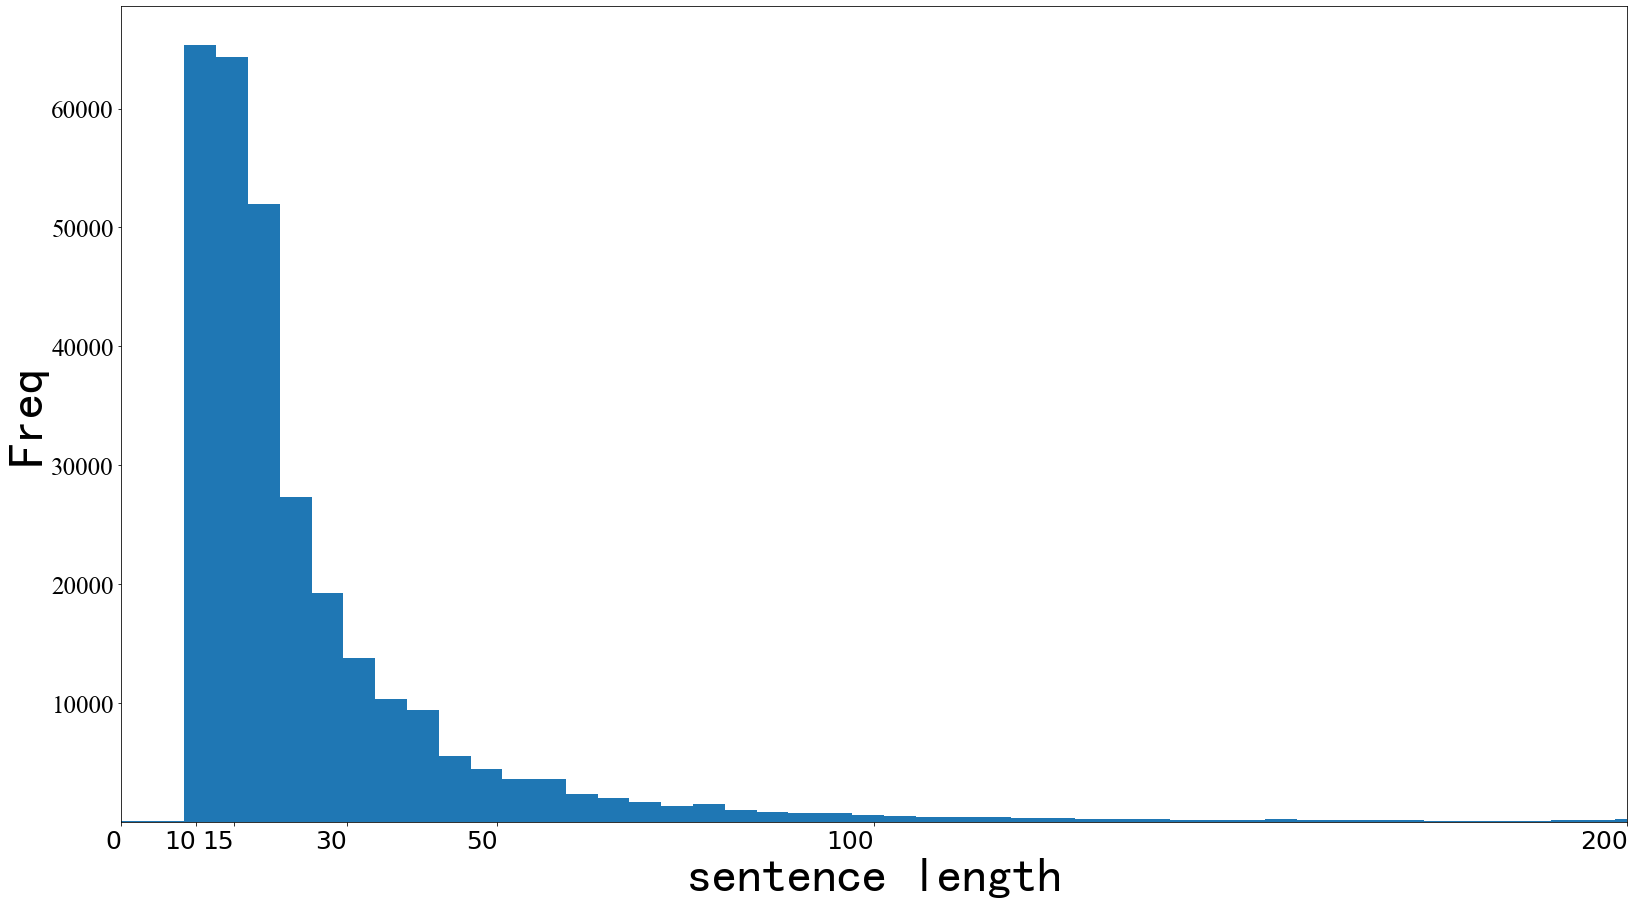

In [45]:
sent_len = [len(text) for text in dataset['content']]
plt.figure(figsize=(27,15))
_ = plt.hist(sent_len, bins = 50)
plt.xlabel('sentence length',fontproperties='SimHei',size=50)
plt.ylabel('Freq',fontproperties='SimHei',size=50)
plt.xlim(0,200)
plt.xticks(ticks=[0,10,15,30,50,100,200],ha='right', size = 25) 
plt.yticks(ticks=[10000,20000,30000,40000,50000,60000],fontproperties = 'Times New Roman', size = 25)
plt.show()

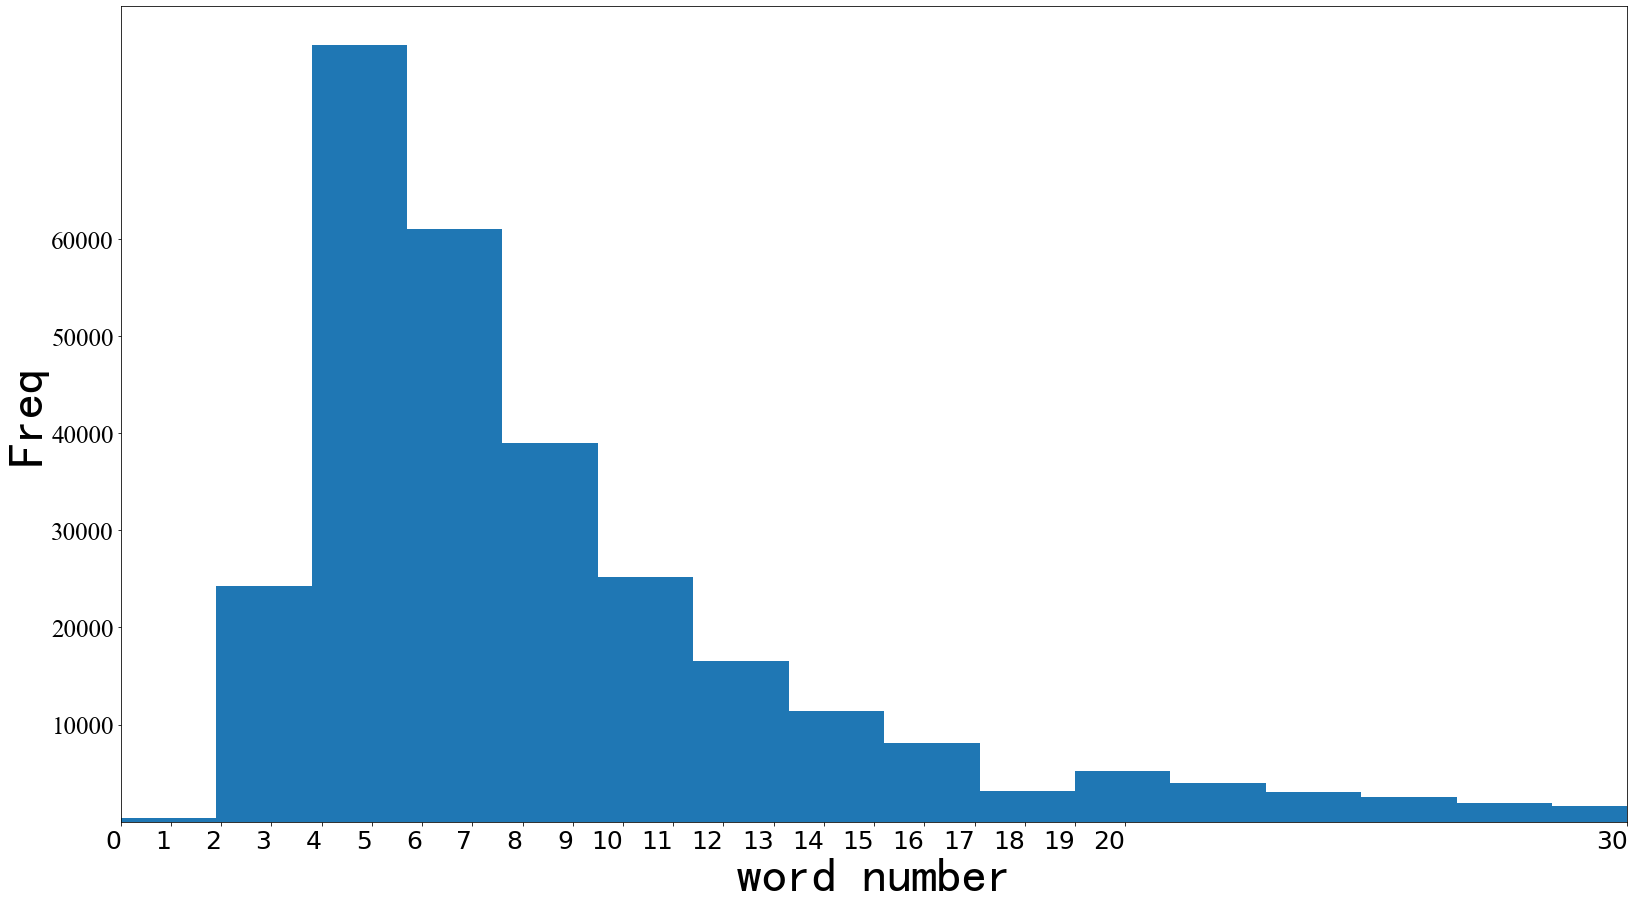

In [62]:
word_num = [len(text.split()) for text in pre_dataset['content']]
plt.figure(figsize=(27,15))
_ = plt.hist(word_num, bins = 50)
plt.xlabel('word number',fontproperties='SimHei',size=50)
plt.ylabel('Freq',fontproperties='SimHei',size=50)
plt.xlim(0,30)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30],ha='right', size = 25) 
plt.yticks(ticks=[10000,20000,30000,40000,50000,60000],fontproperties = 'Times New Roman', size = 25)
plt.show()
plt.show()

In [177]:
all_list=[]
f = open('dataset/divide_type/1type_3.txt','r',encoding='utf-8')
dataset1_long=f.readlines()
all_list.append(dataset1_long)
f.close()
f = open('dataset/divide_type/2type_3.txt','r',encoding='utf-8')
dataset2_long=f.readlines()
all_list.append(dataset2_long)
f.close()
f = open('dataset/divide_type/4type_3.txt','r',encoding='utf-8')
dataset4_long=f.readlines()
all_list.append(dataset4_long)
f.close()
str1=''.join(all_list[0])
str2=''.join(all_list[1])
str4=''.join(all_list[2])
strall=str1+str2+str4
f = open('dataset/divide_type/alltype_3.txt','w+',encoding='utf-8')
f.writelines(strall)
f.close()

['这个梗对于真人来讲已经是性骚扰了，建议封禁', '0']


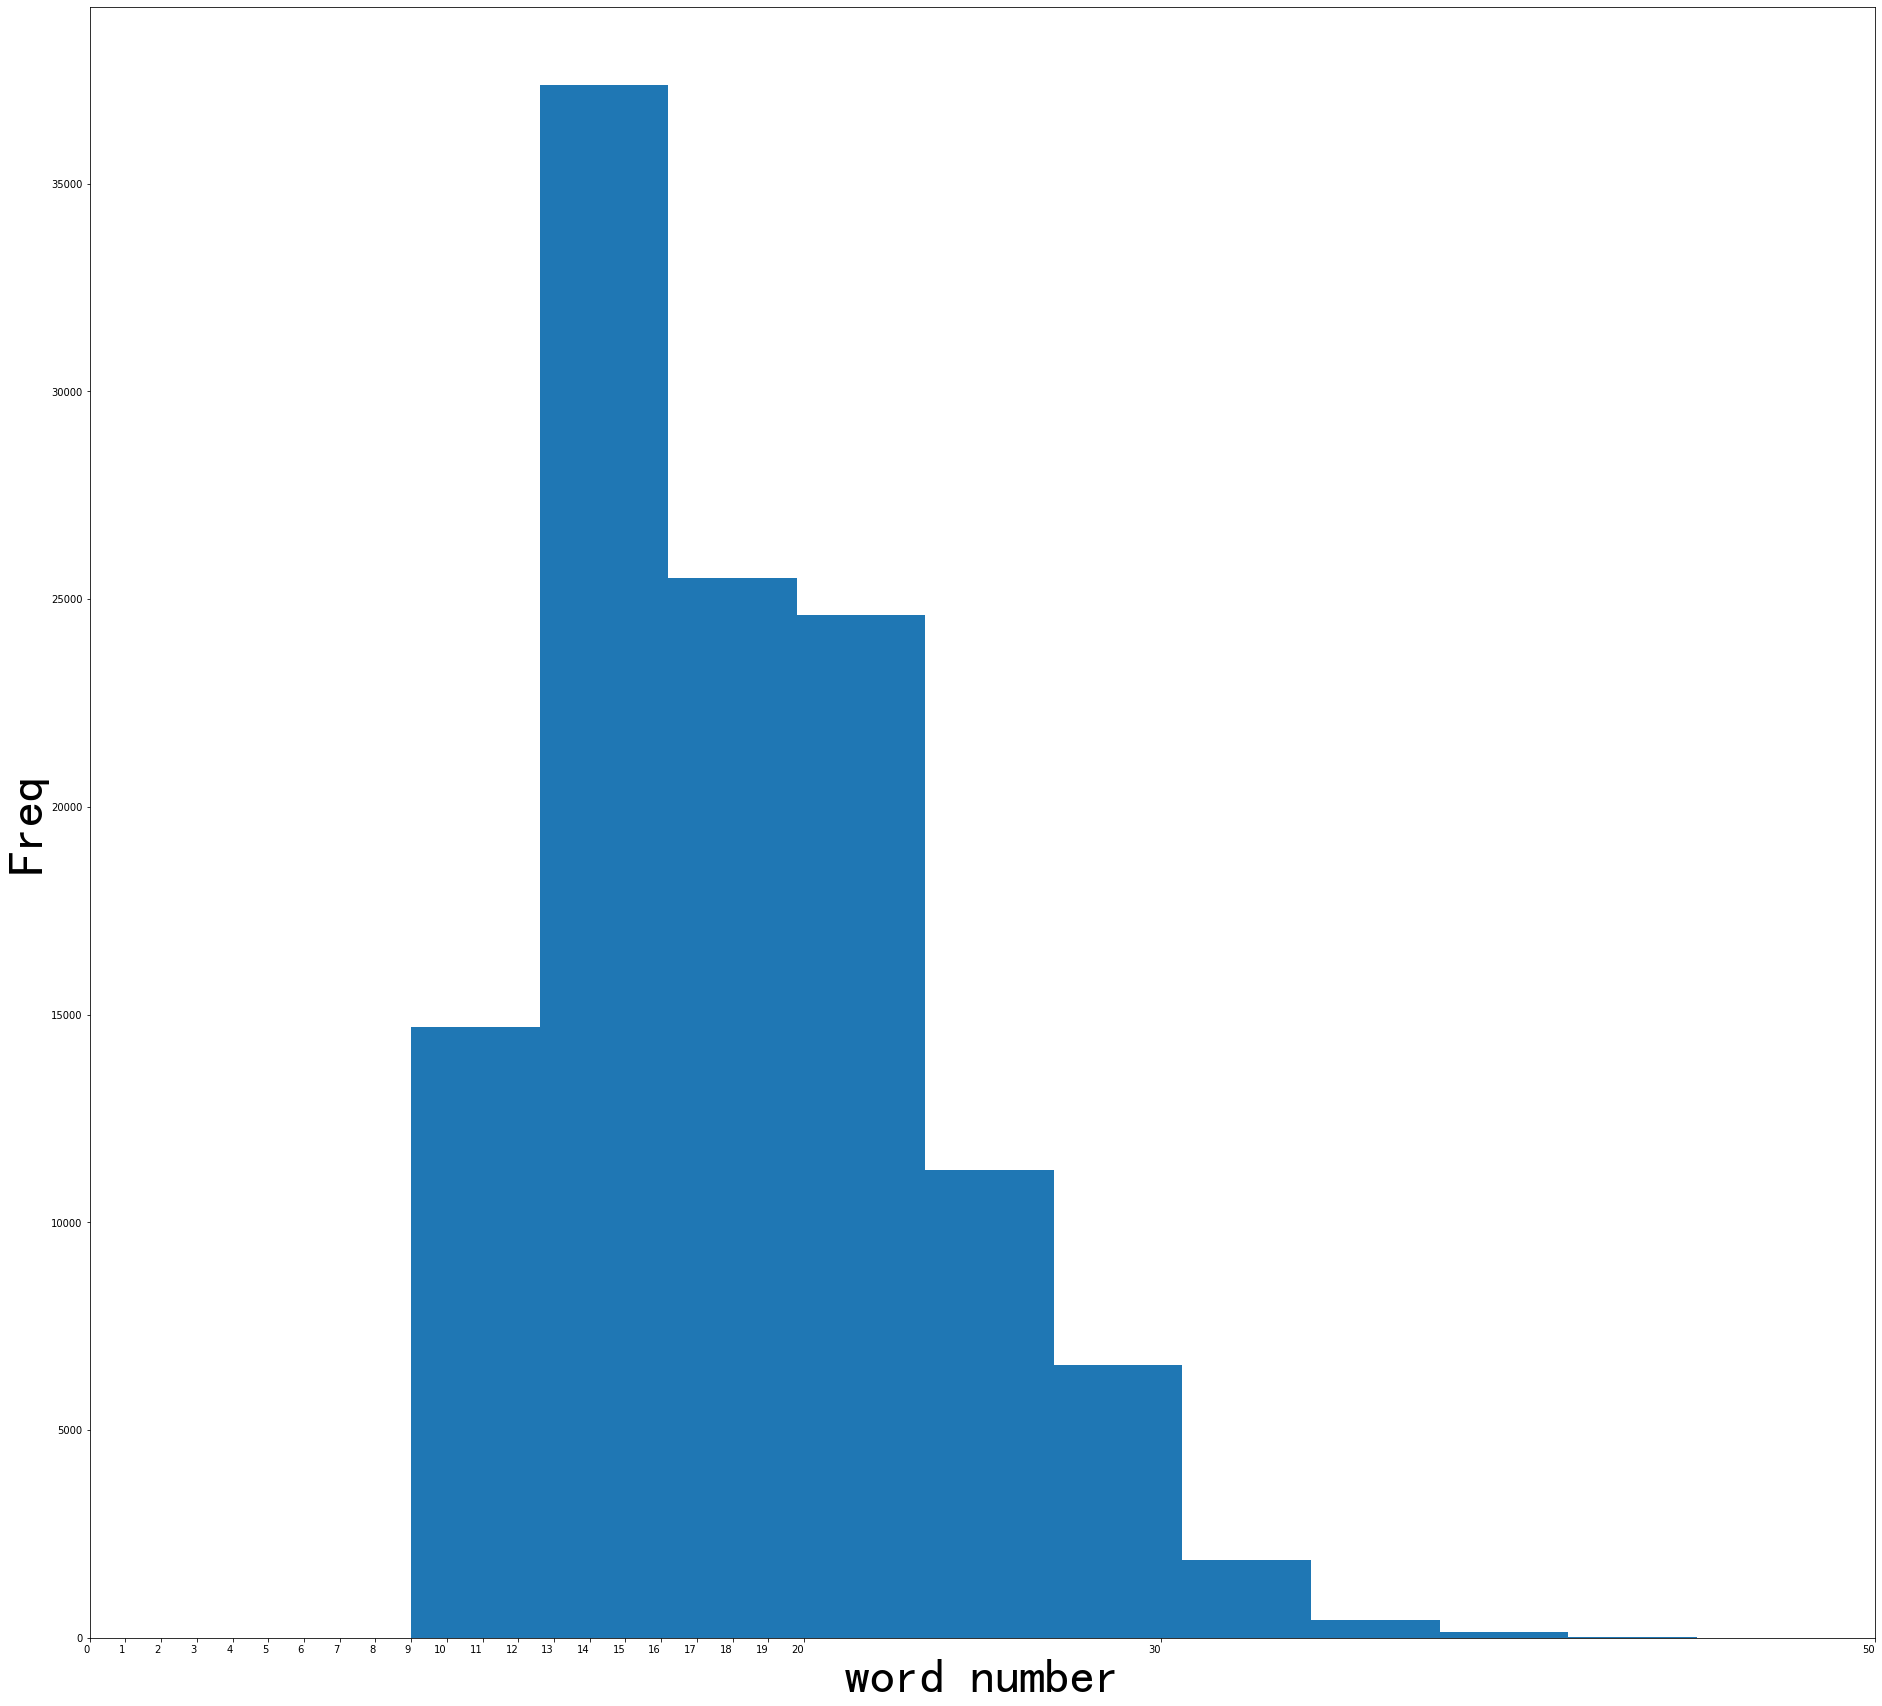

In [180]:
f = open('dataset/dataset_long.txt','r',encoding='utf-8')
dataset_list=f.readlines()
print(dataset_list[0].replace('\n','').split())
f.close()
word_num = [len(text.replace('\n','').split('\t')[0]) for text in dataset_list]
plt.figure(figsize=(32,30))
_ = plt.hist(word_num, bins = 50)
plt.xlabel('word number',fontproperties='SimHei',size=50)
plt.ylabel('Freq',fontproperties='SimHei',size=50)
plt.xlim(0,50)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50],ha='right') 
plt.show()

['梗', '对于', '真人', '来讲', '已经', '性骚扰', '封禁']


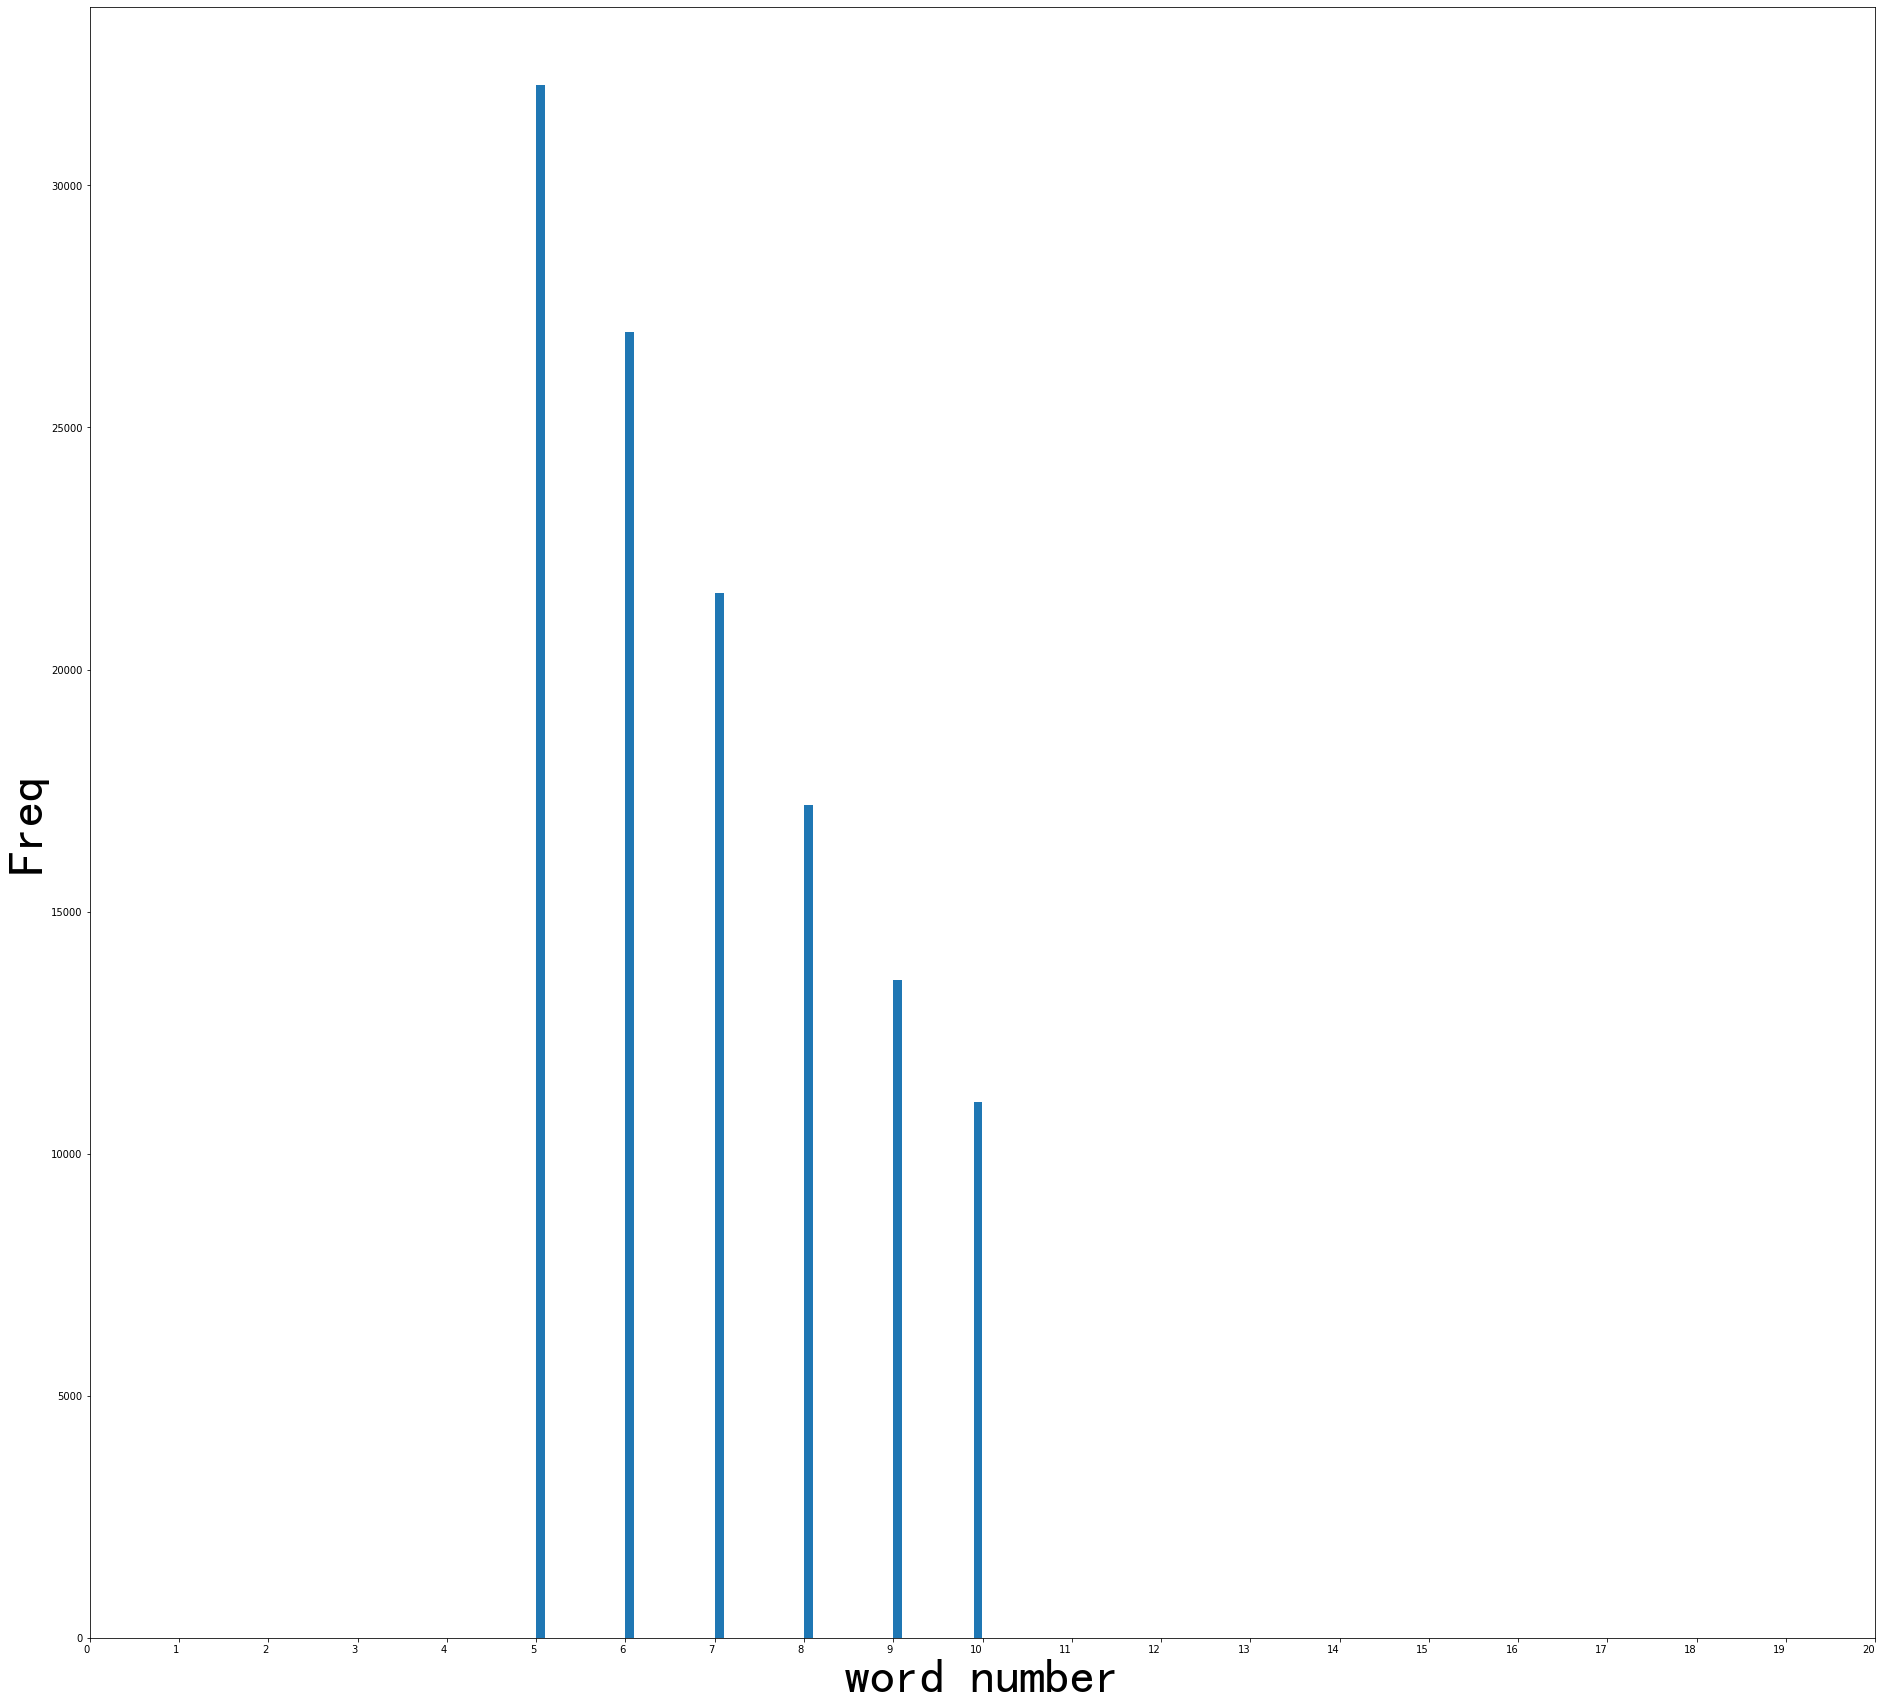

In [182]:
f = open('dataset/divide_type/alltype_3.txt','r',encoding='utf-8')
dataset_list=f.readlines()
print(dataset_list[0].replace('\n','').split('\t')[0].split())
f.close()
word_num = [len(text.replace('\n','').split('\t')[0].split()) for text in dataset_list]
plt.figure(figsize=(32,30))
_ = plt.hist(word_num, bins = 50)
plt.xlabel('word number',fontproperties='SimHei',size=50)
plt.ylabel('Freq',fontproperties='SimHei',size=50)
plt.xlim(0,20)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],ha='right') 
plt.show()

In [38]:
labelMap = {1: 0, 2: 1, 4: 2}
pre_dataset['vote'] = pre_dataset['vote'].map(labelMap)
pre_dataset.to_csv('dataset/pre_dataset_1.csv', index = False)

In [39]:
dataset['vote'] = dataset['vote'].map(labelMap)
dataset.to_csv('dataset/dataset_1.csv', index = False)

In [40]:
#分好的数据集读取
pre_dataset = pd.read_csv('dataset/pre_dataset_1.csv')
count=0
for item in pre_dataset['content']:
    if str(item) == 'nan':
        pre_dataset['content'][count] = ''
    count += 1

#数据集读取
dataset = pd.read_csv('dataset/dataset_1.csv')
count=0
for item in dataset['content']:
    if str(item) == 'nan':
        dataset['content'][count] = ''
    count += 1

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
import pdb
count = 0
count1 = 0
count2= 0
count4=0
dataset1=[]
dataset2=[]
dataset4=[]
#     pdb.set_trace()
for text in tqdm(pre_dataset['content'],disable=False):
    if len(text.split()) >= 5 and len(text.split()) <= 12:
    #         if text=='恶意中伤 二次元 群体 疑似 刻意 引战 删除 起步 ':pdb.set_trace()
        if pre_dataset['vote'][count] == 0:
            dataset1.append(text.rstrip().lstrip()+'\t'+str(pre_dataset['vote'][count])+'\t'+str(count))
            count1+=1
        if pre_dataset['vote'][count] == 1:
            dataset2.append(text.rstrip().lstrip()+'\t'+str(pre_dataset['vote'][count])+'\t'+str(count))
            count2+=1
        if pre_dataset['vote'][count] == 2:
            dataset4.append(text.rstrip().lstrip()+'\t'+str(pre_dataset['vote'][count])+'\t'+str(count))
            count4+=1
    count += 1
print(count)
print(count1)
print(count2)
print(count4)
print(dataset1[0])

100%|███████████████████████████████████████████████████████████████████████| 269491/269491 [00:06<00:00, 40217.21it/s]

269491
59108
47515
51654
梗 对于 真人 来讲 已经 性骚扰 封禁	0	1


In [49]:
with open ('dataset/divide_type/1type_3.txt','w') as f1:
    for line in dataset1:
        f1.write(line)
        f1.write('\n')
        
f1.close()
with open ('dataset/divide_type/2type_3.txt','w') as f2:
    for line in dataset2:
        f2.write(line)
        f2.write('\n')
f1.close()
with open ('dataset/divide_type/4type_3.txt','w') as f4:
    for line in dataset4:
        f4.write(line)
        f4.write('\n')
f1.close()

In [50]:
dataset_all = []
dataset1_all = []
dataset2_all = []
dataset4_all = []

for row in tqdm(dataset1,disable=False):
    row_list=row.split('\t')
    dataset_all.append(dataset['content'][int(row_list[2])]+'\t'+str(dataset['vote'][int(row_list[2])]))
    dataset1_all.append(dataset['content'][int(row_list[2])]+'\t'+str(dataset['vote'][int(row_list[2])]))
    
for row in tqdm(dataset2,disable=False):
    row_list=row.split('\t')
    dataset_all.append(dataset['content'][int(row_list[2])]+'\t'+str(dataset['vote'][int(row_list[2])]))
    dataset2_all.append(dataset['content'][int(row_list[2])]+'\t'+str(dataset['vote'][int(row_list[2])]))

for row in tqdm(dataset4,disable=False):
    row_list=row.split('\t')
    dataset_all.append(dataset['content'][int(row_list[2])]+'\t'+str(dataset['vote'][int(row_list[2])]))
    dataset4_all.append(dataset['content'][int(row_list[2])]+'\t'+str(dataset['vote'][int(row_list[2])]))
    

100%|█████████████████████████████████████████████████████████████████████████| 51654/51654 [00:02<00:00, 25695.05it/s]


In [51]:
with open ('dataset/dataset_long.txt','w',encoding='utf-8') as f:
    for line in dataset_all:
        f.write(line)
        f.write('\n')
        
f.close()
with open ('dataset/divide_type/dataset1_long.txt','w',encoding='utf-8') as f1:
    for line in dataset1_all:
        f1.write(line)
        f1.write('\n')
        
f1.close()
with open ('dataset/divide_type/dataset2_long.txt','w',encoding='utf-8') as f2:
    for line in dataset2_all:
        f2.write(line)
        f2.write('\n')
f2.close()
with open ('dataset/divide_type/dataset4_long.txt','w',encoding='utf-8') as f4:
    for line in dataset4_all:
        f4.write(line)
        f4.write('\n')
f4.close()

In [52]:
def third_test_choose(type1, type2, type4):
    random_list_1 = random.sample(range(0, len(type1)), 40000)
    random_list_2 = random.sample(range(0, len(type2)), 40000)
    random_list_4 = random.sample(range(0, len(type4)), 40000)
    random_strlist_1 = ['a' + str(i) for i in random_list_1]
    random_strlist_2 = ['b' + str(i) for i in random_list_2]
    random_strlist_4 = ['c' + str(i) for i in random_list_4]

    list_93000 = []
    list_9000 = []
    list_18000 = []

    list_93000[:31000] = random_strlist_1[:31000]
    list_93000[31000:62000] = random_strlist_2[:31000]
    list_93000[62000:93000] = random_strlist_4[:31000]

    list_9000[:3000] = random_strlist_1[31000:34000]
    list_9000[3000:6000] = random_strlist_2[31000:34000]
    list_9000[6000:9000] = random_strlist_4[31000:34000]

    list_18000[:6000] = random_strlist_1[34000:40000]
    list_18000[6000:12000] = random_strlist_2[34000:40000]
    list_18000[12000:18000] = random_strlist_4[34000:40000]

    random.shuffle(list_93000)
    random.shuffle(list_9000)
    random.shuffle(list_18000)

    train_list = []
    val_list = []
    test_list = []

    for item in list_93000:
        if item[0] == 'a': train_list.append(type1[int(item[1:])])
        if item[0] == 'b': train_list.append(type2[int(item[1:])])
        if item[0] == 'c': train_list.append(type4[int(item[1:])])

    for item in list_9000:
        if item[0] == 'a': val_list.append(type1[int(item[1:])])
        if item[0] == 'b': val_list.append(type2[int(item[1:])])
        if item[0] == 'c': val_list.append(type4[int(item[1:])])

    for item in list_18000:
        if item[0] == 'a': test_list.append(type1[int(item[1:])])
        if item[0] == 'b': test_list.append(type2[int(item[1:])])
        if item[0] == 'c': test_list.append(type4[int(item[1:])])

    with open ('dataset/spider_result_1/train.txt','w',encoding='utf-8') as f1:
        for line in train_list:
            f1.write(line)
    f1.close()
    with open ('dataset/spider_result_1/val.txt','w',encoding='utf-8') as f2:
        for line in val_list:
            f2.write(line)
    f2.close()
    with open ('dataset/spider_result_1/test.txt','w',encoding='utf-8') as f3:
        for line in test_list:
            f3.write(line)
    f3.close()

In [53]:
filename1 = 'dataset/divide_type/dataset1_long.txt'
filename2 = 'dataset/divide_type/dataset2_long.txt'
filename4 = 'dataset/divide_type/dataset4_long.txt'
type1 = open(filename1, encoding='utf-8').readlines()
type2 = open(filename2, encoding='utf-8').readlines()
type4 = open(filename4, encoding='utf-8').readlines()
print(len(type1))
print(len(type2))
print(len(type4))
third_test_choose(type1, type2, type4)

59108
47515
51654


In [ ]:
dataset_all_1=pd.concat([dataset1,dataset2])
dataset_all=pd.concat([dataset_all_1, data])

In [14]:
def huifu(x,y,word_index):
    train_dataset=[]
    count0=0
    count1=0
    count2=0
    countother=0
#     pdb.set_trace()
    count=0
    num=x.shape[0]
    for count in tqdm(range(0,num),disable=False):
        sentence=''
        for column in x[count]:
            if column == 0:
                sentence+=''
                continue
            sentence += get_dict_key(tokenizer.word_index, column)
            sentence += ' '
        sentence=sentence.rstrip()
        sentence+='\t'+str(np.argmax(y[count]))
        train_dataset.append(sentence)
    return train_dataset

In [15]:
dataset_list=huifu(x_train,y_train,tokenizer.word_index)

100%|█████████████████████████████████████████████████████████████████████████| 124788/124788 [15:58<00:00, 130.15it/s]


In [16]:
with open ('dataset/pred_true/train_dataset.txt','w') as f4:
    for pred in dataset_list:
        f4.write(pred)
        f4.write('\n')
f4.close()

In [3]:
x_train = np.load("dataset/x_train.npy")
x_val = np.load("dataset/x_val.npy")
x_test = np.load("dataset/x_test.npy")
y_train = np.load("dataset/y_train.npy")
y_val = np.load("dataset/y_val.npy")
y_test = np.load("dataset/y_test.npy")
with open('dataset/tokenizer.pickle', 'rb') as handle: 
  tokenizer = pickle.load(handle)
embedding_matrix = np.load('dataset/embedding_matrix.npy')

In [4]:
# 根据字典的值value获得该值对应的key
def get_dict_key(dic, value):
    keys = list(dic.keys())
    values = list(dic.values())
    idx = values.index(value)
    key = keys[idx]
 
    return key

In [65]:
print(get_dict_key(tokenizer.word_index, 1))

引战


In [17]:
x_train_upand_5=np.load("dataset/pred_true/x_train_upand_5.npy")
y_train_upand_5=np.load("dataset/pred_true/y_train_upand_5.npy")
train_index=np.load("dataset/pred_true/train_upand_5_index.npy")

In [18]:
dataset_list=huifu(x_train_upand_5,y_train_upand_5,tokenizer.word_index)
with open ('dataset/pred_true/train_dataset_upand_5.txt','w') as f4:
    for pred in dataset_list:
        f4.write(pred)
        f4.write('\n')
f4.close()

100%|█████████████████████████████████████████████████████████████████████████| 100079/100079 [14:22<00:00, 116.04it/s]


In [ ]:
f=open('dataset/pred_true/train_dataset.txt','r',encoding='utf-8')
dataset=f.readlines()
dataset_upand_5=[]
for item in train_index:
    dataset_upand_5.append(dataset[item])
with open ('dataset/pred_true/train_dataset_upand_5_1.txt','w') as f4:
    for pred in dataset_upand_5:
        f4.write(pred)
        f4.write('\n')
f4.close()

In [44]:
f=open('dataset/pred_true/train_dataset.txt','r',encoding='utf-8')
dataset=f.readlines()
f1=open('dataset/pred_true/train_diff_index.txt','r',encoding='utf-8')
train_index=f1.readlines()
count=0
for item in train_index:
    train_index[count]=int(train_index[count])
    count+=1
train_index_1=np.load('dataset/pred_true/train_upand_5_index.npy','r')


dataset_upand_5=[]

for item in tqdm(train_index_1,disable=False):
    if item not in train_index:
        dataset_upand_5.append(dataset[item])
                           
with open ('dataset/pred_true/train.txt','w') as f4:
    for pred in dataset_upand_5:
        f4.write(pred)
f4.close()

In [72]:
f = open('dataset/pred_true/all_dataset.txt','r',encoding='utf-8')
all_dataset=f.readlines()
labels=[]
for line in all_dataset:
    labels.append(int(line.split('\t')[1]))
dataset_type=[]
count=0
count0=0
count1=0
count2=0
countother=0
SIZE=25000

for item in labels:
    if item == 0 and count0 < 25000: 
        dataset_type.append(all_dataset[count])
        count0+=1
    if item==1 and count1 < 25000:
        dataset_type.append(all_dataset[count])
        count1+=1
    if item==2 and count2 < 25000:
        dataset_type.append(all_dataset[count])
        count2+=1
    count+=1
        
print(count0)
print(count1)
print(count2)
print(countother)
print(len(dataset_type))

25000
25000
25000
0
75000


In [74]:
with open ('dataset/dataset.txt','w') as f4:
    for pred in dataset_type:
        f4.write(pred)
f4.close()

In [50]:
train_dataset=pd.read_csv('dataset/pred_true/dataset.txt',sep='\t')
pre_dataset=pd.read_csv('dataset/pre_dataset.csv')
pre_dataset2=pre_dataset[104491:154061]

In [63]:
import pdb
count = 104491
dataset2=[]
#     pdb.set_trace()
for text in tqdm(pre_dataset2['content'],disable=False):
    if len(text.split()) >= 5 and len(text.split()) <= 10:
        if pre_dataset2['vote'][count] == 2:
            dataset2.append(text.rstrip().lstrip()+'\t'+str(pre_dataset['vote'][count]))
    count += 1
print(count)
print(dataset2[0])


100%|█████████████████████████████████████████████████████████████████████████| 49570/49570 [00:01<00:00, 37727.68it/s]

154061
说话 不仅 打 而且 歪 果仁 比较 困惑	2


In [67]:
if __name__=='__main__':
    reader=open('dataset/pred_true/dataset.txt','r',encoding='utf-8')
    notindataset=[]
    train_dataset=reader.readlines()
    for item in train_dataset:
        notindataset.append(item.split('\t')[0])
    data=[]
    for item in tqdm(dataset2,disable=False):
        if item.split('\t')[0] not in notindataset:
            pdb.set_trace()
            data.append(item)

100%|███████████████████████████████████████████████████████████████████████████| 38676/38676 [01:17<00:00, 498.13it/s]


In [76]:
reader=open('dataset/dataset.txt','r',encoding='utf-8')
all_dataset=reader.readlines()
train_dataset=pd.read_csv('dataset/dataset.txt',sep='\t')
pre_dataset=pd.read_csv('dataset/pre_dataset.csv')
dataset=pd.read_csv('dataset/dataset_long.csv',sep='\t')
dataset1=[]
count=0
for text in tqdm(dataset['content'],disable=False):
    if(str(text)=='nan'):dataset1.append(''+'\t'+str(dataset['vote'][count]))
    else:dataset1.append(text.rstrip().lstrip()+'\t'+str(dataset['vote'][count]))
    count += 1
print(count)
print(dataset1[0])
dataset2=[]
count=0
for text in tqdm(pre_dataset['content'],disable=False):
    if(str(text)=='nan'):dataset2.append('')
    dataset2.append(text.rstrip().lstrip())
    count += 1
print(count)
print(dataset2[0])

 22%|███████████████▋                                                       | 34003/154061 [00:00<00:00, 339434.70it/s]

154061
这个梗对于真人来讲已经是性骚扰了，建议封禁	0


100%|██████████████████████████████████████████████████████████████████████| 154061/154061 [00:00<00:00, 415332.64it/s]

154061
梗 对于 真人 来讲 已经 性骚扰 封禁


In [77]:
data_long=[]
count1=0
for item in all_dataset:
    count=0
    for line in dataset2:
        length=len(item.split('\t')[0])
        length1=len(line)
        if item.split('\t')[0]==line[length1-length:length1]:
      # if count1==0:pdb.set_trace()
            data_long.append(dataset1[count])
        count+=1
    count1+=1
    print('完成了第{}条'.format(count1))

with open ('dataset/dataset_source.txt','w') as f4:
    for pred in data_long:
        f4.write(pred)
        f4.write('\n')
f4.close()

完成了第1条
完成了第2条
完成了第3条
完成了第4条
完成了第5条
完成了第6条
完成了第7条
完成了第8条
完成了第9条
完成了第10条
完成了第11条
完成了第12条
完成了第13条
完成了第14条
完成了第15条
完成了第16条
完成了第17条
完成了第18条
完成了第19条
完成了第20条
完成了第21条
完成了第22条
完成了第23条
完成了第24条
完成了第25条
完成了第26条
完成了第27条
完成了第28条
完成了第29条
完成了第30条
完成了第31条
完成了第32条
完成了第33条
完成了第34条
完成了第35条
完成了第36条
完成了第37条
完成了第38条
完成了第39条
完成了第40条
完成了第41条
完成了第42条
完成了第43条
完成了第44条
完成了第45条
完成了第46条
完成了第47条
完成了第48条
完成了第49条
完成了第50条
完成了第51条
完成了第52条
完成了第53条
完成了第54条
完成了第55条
完成了第56条
完成了第57条
完成了第58条
完成了第59条
完成了第60条
完成了第61条
完成了第62条
完成了第63条
完成了第64条
完成了第65条
完成了第66条
完成了第67条
完成了第68条
完成了第69条
完成了第70条
完成了第71条
完成了第72条
完成了第73条
完成了第74条
完成了第75条
完成了第76条
完成了第77条
完成了第78条
完成了第79条
完成了第80条
完成了第81条
完成了第82条
完成了第83条
完成了第84条
完成了第85条
完成了第86条
完成了第87条
完成了第88条
完成了第89条
完成了第90条
完成了第91条
完成了第92条
完成了第93条
完成了第94条
完成了第95条
完成了第96条
完成了第97条
完成了第98条
完成了第99条
完成了第100条
完成了第101条
完成了第102条
完成了第103条
完成了第104条
完成了第105条
完成了第106条
完成了第107条
完成了第108条
完成了第109条
完成了第110条
完成了第111条
完成了第112条
完成了第113条
完成了第114条
完成了第115条
完成了第116条
完成了第117条
完成了第118条
完成了第119条
完成了第120条
完成了第121条
完成了第122条
完成了第123条
完

完成了第924条
完成了第925条
完成了第926条
完成了第927条
完成了第928条
完成了第929条
完成了第930条
完成了第931条
完成了第932条
完成了第933条
完成了第934条
完成了第935条
完成了第936条
完成了第937条
完成了第938条
完成了第939条
完成了第940条
完成了第941条
完成了第942条
完成了第943条
完成了第944条
完成了第945条
完成了第946条
完成了第947条
完成了第948条
完成了第949条
完成了第950条
完成了第951条
完成了第952条
完成了第953条
完成了第954条
完成了第955条
完成了第956条
完成了第957条
完成了第958条
完成了第959条
完成了第960条
完成了第961条
完成了第962条
完成了第963条
完成了第964条
完成了第965条
完成了第966条
完成了第967条
完成了第968条
完成了第969条
完成了第970条
完成了第971条
完成了第972条
完成了第973条
完成了第974条
完成了第975条
完成了第976条
完成了第977条
完成了第978条
完成了第979条
完成了第980条
完成了第981条
完成了第982条
完成了第983条
完成了第984条
完成了第985条
完成了第986条
完成了第987条
完成了第988条
完成了第989条
完成了第990条
完成了第991条
完成了第992条
完成了第993条
完成了第994条
完成了第995条
完成了第996条
完成了第997条
完成了第998条
完成了第999条
完成了第1000条
完成了第1001条
完成了第1002条
完成了第1003条
完成了第1004条
完成了第1005条
完成了第1006条
完成了第1007条
完成了第1008条
完成了第1009条
完成了第1010条
完成了第1011条
完成了第1012条
完成了第1013条
完成了第1014条
完成了第1015条
完成了第1016条
完成了第1017条
完成了第1018条
完成了第1019条
完成了第1020条
完成了第1021条
完成了第1022条
完成了第1023条
完成了第1024条
完成了第1025条
完成了第1026条
完成了第1027条
完成了第1028条
完成了第1029条
完成了第1030条
完成了第10

完成了第1751条
完成了第1752条
完成了第1753条
完成了第1754条
完成了第1755条
完成了第1756条
完成了第1757条
完成了第1758条
完成了第1759条
完成了第1760条
完成了第1761条
完成了第1762条
完成了第1763条
完成了第1764条
完成了第1765条
完成了第1766条
完成了第1767条
完成了第1768条
完成了第1769条
完成了第1770条
完成了第1771条
完成了第1772条
完成了第1773条
完成了第1774条
完成了第1775条
完成了第1776条
完成了第1777条
完成了第1778条
完成了第1779条
完成了第1780条
完成了第1781条
完成了第1782条
完成了第1783条
完成了第1784条
完成了第1785条
完成了第1786条
完成了第1787条
完成了第1788条
完成了第1789条
完成了第1790条
完成了第1791条
完成了第1792条
完成了第1793条
完成了第1794条
完成了第1795条
完成了第1796条
完成了第1797条
完成了第1798条
完成了第1799条
完成了第1800条
完成了第1801条
完成了第1802条
完成了第1803条
完成了第1804条
完成了第1805条
完成了第1806条
完成了第1807条
完成了第1808条
完成了第1809条
完成了第1810条
完成了第1811条
完成了第1812条
完成了第1813条
完成了第1814条
完成了第1815条
完成了第1816条
完成了第1817条
完成了第1818条
完成了第1819条
完成了第1820条
完成了第1821条
完成了第1822条
完成了第1823条
完成了第1824条
完成了第1825条
完成了第1826条
完成了第1827条
完成了第1828条
完成了第1829条
完成了第1830条
完成了第1831条
完成了第1832条
完成了第1833条
完成了第1834条
完成了第1835条
完成了第1836条
完成了第1837条
完成了第1838条
完成了第1839条
完成了第1840条
完成了第1841条
完成了第1842条
完成了第1843条
完成了第1844条
完成了第1845条
完成了第1846条
完成了第1847条
完成了第1848条
完成了第1849条
完成了第1850条


完成了第2571条
完成了第2572条
完成了第2573条
完成了第2574条
完成了第2575条
完成了第2576条
完成了第2577条
完成了第2578条
完成了第2579条
完成了第2580条
完成了第2581条
完成了第2582条
完成了第2583条
完成了第2584条
完成了第2585条
完成了第2586条
完成了第2587条
完成了第2588条
完成了第2589条
完成了第2590条
完成了第2591条
完成了第2592条
完成了第2593条
完成了第2594条
完成了第2595条
完成了第2596条
完成了第2597条
完成了第2598条
完成了第2599条
完成了第2600条
完成了第2601条
完成了第2602条
完成了第2603条
完成了第2604条
完成了第2605条
完成了第2606条
完成了第2607条
完成了第2608条
完成了第2609条
完成了第2610条
完成了第2611条
完成了第2612条
完成了第2613条
完成了第2614条
完成了第2615条
完成了第2616条
完成了第2617条
完成了第2618条
完成了第2619条
完成了第2620条
完成了第2621条
完成了第2622条
完成了第2623条
完成了第2624条
完成了第2625条
完成了第2626条
完成了第2627条
完成了第2628条
完成了第2629条
完成了第2630条
完成了第2631条
完成了第2632条
完成了第2633条
完成了第2634条
完成了第2635条
完成了第2636条
完成了第2637条
完成了第2638条
完成了第2639条
完成了第2640条
完成了第2641条
完成了第2642条
完成了第2643条
完成了第2644条
完成了第2645条
完成了第2646条
完成了第2647条
完成了第2648条
完成了第2649条
完成了第2650条
完成了第2651条
完成了第2652条
完成了第2653条
完成了第2654条
完成了第2655条
完成了第2656条
完成了第2657条
完成了第2658条
完成了第2659条
完成了第2660条
完成了第2661条
完成了第2662条
完成了第2663条
完成了第2664条
完成了第2665条
完成了第2666条
完成了第2667条
完成了第2668条
完成了第2669条
完成了第2670条


完成了第3391条
完成了第3392条
完成了第3393条
完成了第3394条
完成了第3395条
完成了第3396条
完成了第3397条
完成了第3398条
完成了第3399条
完成了第3400条
完成了第3401条
完成了第3402条
完成了第3403条
完成了第3404条
完成了第3405条
完成了第3406条
完成了第3407条
完成了第3408条
完成了第3409条
完成了第3410条
完成了第3411条
完成了第3412条
完成了第3413条
完成了第3414条
完成了第3415条
完成了第3416条
完成了第3417条
完成了第3418条
完成了第3419条
完成了第3420条
完成了第3421条
完成了第3422条
完成了第3423条
完成了第3424条
完成了第3425条
完成了第3426条
完成了第3427条
完成了第3428条
完成了第3429条
完成了第3430条
完成了第3431条
完成了第3432条
完成了第3433条
完成了第3434条
完成了第3435条
完成了第3436条
完成了第3437条
完成了第3438条
完成了第3439条
完成了第3440条
完成了第3441条
完成了第3442条
完成了第3443条
完成了第3444条
完成了第3445条
完成了第3446条
完成了第3447条
完成了第3448条
完成了第3449条
完成了第3450条
完成了第3451条
完成了第3452条
完成了第3453条
完成了第3454条
完成了第3455条
完成了第3456条
完成了第3457条
完成了第3458条
完成了第3459条
完成了第3460条
完成了第3461条
完成了第3462条
完成了第3463条
完成了第3464条
完成了第3465条
完成了第3466条
完成了第3467条
完成了第3468条
完成了第3469条
完成了第3470条
完成了第3471条
完成了第3472条
完成了第3473条
完成了第3474条
完成了第3475条
完成了第3476条
完成了第3477条
完成了第3478条
完成了第3479条
完成了第3480条
完成了第3481条
完成了第3482条
完成了第3483条
完成了第3484条
完成了第3485条
完成了第3486条
完成了第3487条
完成了第3488条
完成了第3489条
完成了第3490条


完成了第4211条
完成了第4212条
完成了第4213条
完成了第4214条
完成了第4215条
完成了第4216条
完成了第4217条
完成了第4218条
完成了第4219条
完成了第4220条
完成了第4221条
完成了第4222条
完成了第4223条
完成了第4224条
完成了第4225条
完成了第4226条
完成了第4227条
完成了第4228条
完成了第4229条
完成了第4230条
完成了第4231条
完成了第4232条
完成了第4233条
完成了第4234条
完成了第4235条
完成了第4236条
完成了第4237条
完成了第4238条
完成了第4239条
完成了第4240条
完成了第4241条
完成了第4242条
完成了第4243条
完成了第4244条
完成了第4245条
完成了第4246条
完成了第4247条
完成了第4248条
完成了第4249条
完成了第4250条
完成了第4251条
完成了第4252条
完成了第4253条
完成了第4254条
完成了第4255条
完成了第4256条
完成了第4257条
完成了第4258条
完成了第4259条
完成了第4260条
完成了第4261条
完成了第4262条
完成了第4263条
完成了第4264条
完成了第4265条
完成了第4266条
完成了第4267条
完成了第4268条
完成了第4269条
完成了第4270条
完成了第4271条
完成了第4272条
完成了第4273条
完成了第4274条
完成了第4275条
完成了第4276条
完成了第4277条
完成了第4278条
完成了第4279条
完成了第4280条
完成了第4281条
完成了第4282条
完成了第4283条
完成了第4284条
完成了第4285条
完成了第4286条
完成了第4287条
完成了第4288条
完成了第4289条
完成了第4290条
完成了第4291条
完成了第4292条
完成了第4293条
完成了第4294条
完成了第4295条
完成了第4296条
完成了第4297条
完成了第4298条
完成了第4299条
完成了第4300条
完成了第4301条
完成了第4302条
完成了第4303条
完成了第4304条
完成了第4305条
完成了第4306条
完成了第4307条
完成了第4308条
完成了第4309条
完成了第4310条


完成了第5031条
完成了第5032条
完成了第5033条
完成了第5034条
完成了第5035条
完成了第5036条
完成了第5037条
完成了第5038条
完成了第5039条
完成了第5040条
完成了第5041条
完成了第5042条
完成了第5043条
完成了第5044条
完成了第5045条
完成了第5046条
完成了第5047条
完成了第5048条
完成了第5049条
完成了第5050条
完成了第5051条
完成了第5052条
完成了第5053条
完成了第5054条
完成了第5055条
完成了第5056条
完成了第5057条
完成了第5058条
完成了第5059条
完成了第5060条
完成了第5061条
完成了第5062条
完成了第5063条
完成了第5064条
完成了第5065条
完成了第5066条
完成了第5067条
完成了第5068条
完成了第5069条
完成了第5070条
完成了第5071条
完成了第5072条
完成了第5073条
完成了第5074条
完成了第5075条
完成了第5076条
完成了第5077条
完成了第5078条
完成了第5079条
完成了第5080条
完成了第5081条
完成了第5082条
完成了第5083条
完成了第5084条
完成了第5085条
完成了第5086条
完成了第5087条
完成了第5088条
完成了第5089条
完成了第5090条
完成了第5091条
完成了第5092条
完成了第5093条
完成了第5094条
完成了第5095条
完成了第5096条
完成了第5097条
完成了第5098条
完成了第5099条
完成了第5100条
完成了第5101条
完成了第5102条
完成了第5103条
完成了第5104条
完成了第5105条
完成了第5106条
完成了第5107条
完成了第5108条
完成了第5109条
完成了第5110条
完成了第5111条
完成了第5112条
完成了第5113条
完成了第5114条
完成了第5115条
完成了第5116条
完成了第5117条
完成了第5118条
完成了第5119条
完成了第5120条
完成了第5121条
完成了第5122条
完成了第5123条
完成了第5124条
完成了第5125条
完成了第5126条
完成了第5127条
完成了第5128条
完成了第5129条
完成了第5130条


完成了第5851条
完成了第5852条
完成了第5853条
完成了第5854条
完成了第5855条
完成了第5856条
完成了第5857条
完成了第5858条
完成了第5859条
完成了第5860条
完成了第5861条
完成了第5862条
完成了第5863条
完成了第5864条
完成了第5865条
完成了第5866条
完成了第5867条
完成了第5868条
完成了第5869条
完成了第5870条
完成了第5871条
完成了第5872条
完成了第5873条
完成了第5874条
完成了第5875条
完成了第5876条
完成了第5877条
完成了第5878条
完成了第5879条
完成了第5880条
完成了第5881条
完成了第5882条
完成了第5883条
完成了第5884条
完成了第5885条
完成了第5886条
完成了第5887条
完成了第5888条
完成了第5889条
完成了第5890条
完成了第5891条
完成了第5892条
完成了第5893条
完成了第5894条
完成了第5895条
完成了第5896条
完成了第5897条
完成了第5898条
完成了第5899条
完成了第5900条
完成了第5901条
完成了第5902条
完成了第5903条
完成了第5904条
完成了第5905条
完成了第5906条
完成了第5907条
完成了第5908条
完成了第5909条
完成了第5910条
完成了第5911条
完成了第5912条
完成了第5913条
完成了第5914条
完成了第5915条
完成了第5916条
完成了第5917条
完成了第5918条
完成了第5919条
完成了第5920条
完成了第5921条
完成了第5922条
完成了第5923条
完成了第5924条
完成了第5925条
完成了第5926条
完成了第5927条
完成了第5928条
完成了第5929条
完成了第5930条
完成了第5931条
完成了第5932条
完成了第5933条
完成了第5934条
完成了第5935条
完成了第5936条
完成了第5937条
完成了第5938条
完成了第5939条
完成了第5940条
完成了第5941条
完成了第5942条
完成了第5943条
完成了第5944条
完成了第5945条
完成了第5946条
完成了第5947条
完成了第5948条
完成了第5949条
完成了第5950条


完成了第6671条
完成了第6672条
完成了第6673条
完成了第6674条
完成了第6675条
完成了第6676条
完成了第6677条
完成了第6678条
完成了第6679条
完成了第6680条
完成了第6681条
完成了第6682条
完成了第6683条
完成了第6684条
完成了第6685条
完成了第6686条
完成了第6687条
完成了第6688条
完成了第6689条
完成了第6690条
完成了第6691条
完成了第6692条
完成了第6693条
完成了第6694条
完成了第6695条
完成了第6696条
完成了第6697条
完成了第6698条
完成了第6699条
完成了第6700条
完成了第6701条
完成了第6702条
完成了第6703条
完成了第6704条
完成了第6705条
完成了第6706条
完成了第6707条
完成了第6708条
完成了第6709条
完成了第6710条
完成了第6711条
完成了第6712条
完成了第6713条
完成了第6714条
完成了第6715条
完成了第6716条
完成了第6717条
完成了第6718条
完成了第6719条
完成了第6720条
完成了第6721条
完成了第6722条
完成了第6723条
完成了第6724条
完成了第6725条
完成了第6726条
完成了第6727条
完成了第6728条
完成了第6729条
完成了第6730条
完成了第6731条
完成了第6732条
完成了第6733条
完成了第6734条
完成了第6735条
完成了第6736条
完成了第6737条
完成了第6738条
完成了第6739条
完成了第6740条
完成了第6741条
完成了第6742条
完成了第6743条
完成了第6744条
完成了第6745条
完成了第6746条
完成了第6747条
完成了第6748条
完成了第6749条
完成了第6750条
完成了第6751条
完成了第6752条
完成了第6753条
完成了第6754条
完成了第6755条
完成了第6756条
完成了第6757条
完成了第6758条
完成了第6759条
完成了第6760条
完成了第6761条
完成了第6762条
完成了第6763条
完成了第6764条
完成了第6765条
完成了第6766条
完成了第6767条
完成了第6768条
完成了第6769条
完成了第6770条


完成了第7491条
完成了第7492条
完成了第7493条
完成了第7494条
完成了第7495条
完成了第7496条
完成了第7497条
完成了第7498条
完成了第7499条
完成了第7500条
完成了第7501条
完成了第7502条
完成了第7503条
完成了第7504条
完成了第7505条
完成了第7506条
完成了第7507条
完成了第7508条
完成了第7509条
完成了第7510条
完成了第7511条
完成了第7512条
完成了第7513条
完成了第7514条
完成了第7515条
完成了第7516条
完成了第7517条
完成了第7518条
完成了第7519条
完成了第7520条
完成了第7521条
完成了第7522条
完成了第7523条
完成了第7524条
完成了第7525条
完成了第7526条
完成了第7527条
完成了第7528条
完成了第7529条
完成了第7530条
完成了第7531条
完成了第7532条
完成了第7533条
完成了第7534条
完成了第7535条
完成了第7536条
完成了第7537条
完成了第7538条
完成了第7539条
完成了第7540条
完成了第7541条
完成了第7542条
完成了第7543条
完成了第7544条
完成了第7545条
完成了第7546条
完成了第7547条
完成了第7548条
完成了第7549条
完成了第7550条
完成了第7551条
完成了第7552条
完成了第7553条
完成了第7554条
完成了第7555条
完成了第7556条
完成了第7557条
完成了第7558条
完成了第7559条
完成了第7560条
完成了第7561条
完成了第7562条
完成了第7563条
完成了第7564条
完成了第7565条
完成了第7566条
完成了第7567条
完成了第7568条
完成了第7569条
完成了第7570条
完成了第7571条
完成了第7572条
完成了第7573条
完成了第7574条
完成了第7575条
完成了第7576条
完成了第7577条
完成了第7578条
完成了第7579条
完成了第7580条
完成了第7581条
完成了第7582条
完成了第7583条
完成了第7584条
完成了第7585条
完成了第7586条
完成了第7587条
完成了第7588条
完成了第7589条
完成了第7590条


完成了第8311条
完成了第8312条
完成了第8313条
完成了第8314条
完成了第8315条
完成了第8316条
完成了第8317条
完成了第8318条
完成了第8319条
完成了第8320条
完成了第8321条
完成了第8322条
完成了第8323条
完成了第8324条
完成了第8325条
完成了第8326条
完成了第8327条
完成了第8328条
完成了第8329条
完成了第8330条
完成了第8331条
完成了第8332条
完成了第8333条
完成了第8334条
完成了第8335条
完成了第8336条
完成了第8337条
完成了第8338条
完成了第8339条
完成了第8340条
完成了第8341条
完成了第8342条
完成了第8343条
完成了第8344条
完成了第8345条
完成了第8346条
完成了第8347条
完成了第8348条
完成了第8349条
完成了第8350条
完成了第8351条
完成了第8352条
完成了第8353条
完成了第8354条
完成了第8355条
完成了第8356条
完成了第8357条
完成了第8358条
完成了第8359条
完成了第8360条
完成了第8361条
完成了第8362条
完成了第8363条
完成了第8364条
完成了第8365条
完成了第8366条
完成了第8367条
完成了第8368条
完成了第8369条
完成了第8370条
完成了第8371条
完成了第8372条
完成了第8373条
完成了第8374条
完成了第8375条
完成了第8376条
完成了第8377条
完成了第8378条
完成了第8379条
完成了第8380条
完成了第8381条
完成了第8382条
完成了第8383条
完成了第8384条
完成了第8385条
完成了第8386条
完成了第8387条
完成了第8388条
完成了第8389条
完成了第8390条
完成了第8391条
完成了第8392条
完成了第8393条
完成了第8394条
完成了第8395条
完成了第8396条
完成了第8397条
完成了第8398条
完成了第8399条
完成了第8400条
完成了第8401条
完成了第8402条
完成了第8403条
完成了第8404条
完成了第8405条
完成了第8406条
完成了第8407条
完成了第8408条
完成了第8409条
完成了第8410条


完成了第9131条
完成了第9132条
完成了第9133条
完成了第9134条
完成了第9135条
完成了第9136条
完成了第9137条
完成了第9138条
完成了第9139条
完成了第9140条
完成了第9141条
完成了第9142条
完成了第9143条
完成了第9144条
完成了第9145条
完成了第9146条
完成了第9147条
完成了第9148条
完成了第9149条
完成了第9150条
完成了第9151条
完成了第9152条
完成了第9153条
完成了第9154条
完成了第9155条
完成了第9156条
完成了第9157条
完成了第9158条
完成了第9159条
完成了第9160条
完成了第9161条
完成了第9162条
完成了第9163条
完成了第9164条
完成了第9165条
完成了第9166条
完成了第9167条
完成了第9168条
完成了第9169条
完成了第9170条
完成了第9171条
完成了第9172条
完成了第9173条
完成了第9174条
完成了第9175条
完成了第9176条
完成了第9177条
完成了第9178条
完成了第9179条
完成了第9180条
完成了第9181条
完成了第9182条
完成了第9183条
完成了第9184条
完成了第9185条
完成了第9186条
完成了第9187条
完成了第9188条
完成了第9189条
完成了第9190条
完成了第9191条
完成了第9192条
完成了第9193条
完成了第9194条
完成了第9195条
完成了第9196条
完成了第9197条
完成了第9198条
完成了第9199条
完成了第9200条
完成了第9201条
完成了第9202条
完成了第9203条
完成了第9204条
完成了第9205条
完成了第9206条
完成了第9207条
完成了第9208条
完成了第9209条
完成了第9210条
完成了第9211条
完成了第9212条
完成了第9213条
完成了第9214条
完成了第9215条
完成了第9216条
完成了第9217条
完成了第9218条
完成了第9219条
完成了第9220条
完成了第9221条
完成了第9222条
完成了第9223条
完成了第9224条
完成了第9225条
完成了第9226条
完成了第9227条
完成了第9228条
完成了第9229条
完成了第9230条


完成了第9951条
完成了第9952条
完成了第9953条
完成了第9954条
完成了第9955条
完成了第9956条
完成了第9957条
完成了第9958条
完成了第9959条
完成了第9960条
完成了第9961条
完成了第9962条
完成了第9963条
完成了第9964条
完成了第9965条
完成了第9966条
完成了第9967条
完成了第9968条
完成了第9969条
完成了第9970条
完成了第9971条
完成了第9972条
完成了第9973条
完成了第9974条
完成了第9975条
完成了第9976条
完成了第9977条
完成了第9978条
完成了第9979条
完成了第9980条
完成了第9981条
完成了第9982条
完成了第9983条
完成了第9984条
完成了第9985条
完成了第9986条
完成了第9987条
完成了第9988条
完成了第9989条
完成了第9990条
完成了第9991条
完成了第9992条
完成了第9993条
完成了第9994条
完成了第9995条
完成了第9996条
完成了第9997条
完成了第9998条
完成了第9999条
完成了第10000条
完成了第10001条
完成了第10002条
完成了第10003条
完成了第10004条
完成了第10005条
完成了第10006条
完成了第10007条
完成了第10008条
完成了第10009条
完成了第10010条
完成了第10011条
完成了第10012条
完成了第10013条
完成了第10014条
完成了第10015条
完成了第10016条
完成了第10017条
完成了第10018条
完成了第10019条
完成了第10020条
完成了第10021条
完成了第10022条
完成了第10023条
完成了第10024条
完成了第10025条
完成了第10026条
完成了第10027条
完成了第10028条
完成了第10029条
完成了第10030条
完成了第10031条
完成了第10032条
完成了第10033条
完成了第10034条
完成了第10035条
完成了第10036条
完成了第10037条
完成了第10038条
完成了第10039条
完成了第10040条
完成了第10041条
完成了第10042条
完成了第10043条
完成了第10044条
完成了第10045条
完成了第

完成了第10702条
完成了第10703条
完成了第10704条
完成了第10705条
完成了第10706条
完成了第10707条
完成了第10708条
完成了第10709条
完成了第10710条
完成了第10711条
完成了第10712条
完成了第10713条
完成了第10714条
完成了第10715条
完成了第10716条
完成了第10717条
完成了第10718条
完成了第10719条
完成了第10720条
完成了第10721条
完成了第10722条
完成了第10723条
完成了第10724条
完成了第10725条
完成了第10726条
完成了第10727条
完成了第10728条
完成了第10729条
完成了第10730条
完成了第10731条
完成了第10732条
完成了第10733条
完成了第10734条
完成了第10735条
完成了第10736条
完成了第10737条
完成了第10738条
完成了第10739条
完成了第10740条
完成了第10741条
完成了第10742条
完成了第10743条
完成了第10744条
完成了第10745条
完成了第10746条
完成了第10747条
完成了第10748条
完成了第10749条
完成了第10750条
完成了第10751条
完成了第10752条
完成了第10753条
完成了第10754条
完成了第10755条
完成了第10756条
完成了第10757条
完成了第10758条
完成了第10759条
完成了第10760条
完成了第10761条
完成了第10762条
完成了第10763条
完成了第10764条
完成了第10765条
完成了第10766条
完成了第10767条
完成了第10768条
完成了第10769条
完成了第10770条
完成了第10771条
完成了第10772条
完成了第10773条
完成了第10774条
完成了第10775条
完成了第10776条
完成了第10777条
完成了第10778条
完成了第10779条
完成了第10780条
完成了第10781条
完成了第10782条
完成了第10783条
完成了第10784条
完成了第10785条
完成了第10786条
完成了第10787条
完成了第10788条
完成了第10789条
完成了第10790条
完成了第10791条
完成了第10792条

完成了第11448条
完成了第11449条
完成了第11450条
完成了第11451条
完成了第11452条
完成了第11453条
完成了第11454条
完成了第11455条
完成了第11456条
完成了第11457条
完成了第11458条
完成了第11459条
完成了第11460条
完成了第11461条
完成了第11462条
完成了第11463条
完成了第11464条
完成了第11465条
完成了第11466条
完成了第11467条
完成了第11468条
完成了第11469条
完成了第11470条
完成了第11471条
完成了第11472条
完成了第11473条
完成了第11474条
完成了第11475条
完成了第11476条
完成了第11477条
完成了第11478条
完成了第11479条
完成了第11480条
完成了第11481条
完成了第11482条
完成了第11483条
完成了第11484条
完成了第11485条
完成了第11486条
完成了第11487条
完成了第11488条
完成了第11489条
完成了第11490条
完成了第11491条
完成了第11492条
完成了第11493条
完成了第11494条
完成了第11495条
完成了第11496条
完成了第11497条
完成了第11498条
完成了第11499条
完成了第11500条
完成了第11501条
完成了第11502条
完成了第11503条
完成了第11504条
完成了第11505条
完成了第11506条
完成了第11507条
完成了第11508条
完成了第11509条
完成了第11510条
完成了第11511条
完成了第11512条
完成了第11513条
完成了第11514条
完成了第11515条
完成了第11516条
完成了第11517条
完成了第11518条
完成了第11519条
完成了第11520条
完成了第11521条
完成了第11522条
完成了第11523条
完成了第11524条
完成了第11525条
完成了第11526条
完成了第11527条
完成了第11528条
完成了第11529条
完成了第11530条
完成了第11531条
完成了第11532条
完成了第11533条
完成了第11534条
完成了第11535条
完成了第11536条
完成了第11537条
完成了第11538条

完成了第12193条
完成了第12194条
完成了第12195条
完成了第12196条
完成了第12197条
完成了第12198条
完成了第12199条
完成了第12200条
完成了第12201条
完成了第12202条
完成了第12203条
完成了第12204条
完成了第12205条
完成了第12206条
完成了第12207条
完成了第12208条
完成了第12209条
完成了第12210条
完成了第12211条
完成了第12212条
完成了第12213条
完成了第12214条
完成了第12215条
完成了第12216条
完成了第12217条
完成了第12218条
完成了第12219条
完成了第12220条
完成了第12221条
完成了第12222条
完成了第12223条
完成了第12224条
完成了第12225条
完成了第12226条
完成了第12227条
完成了第12228条
完成了第12229条
完成了第12230条
完成了第12231条
完成了第12232条
完成了第12233条
完成了第12234条
完成了第12235条
完成了第12236条
完成了第12237条
完成了第12238条
完成了第12239条
完成了第12240条
完成了第12241条
完成了第12242条
完成了第12243条
完成了第12244条
完成了第12245条
完成了第12246条
完成了第12247条
完成了第12248条
完成了第12249条
完成了第12250条
完成了第12251条
完成了第12252条
完成了第12253条
完成了第12254条
完成了第12255条
完成了第12256条
完成了第12257条
完成了第12258条
完成了第12259条
完成了第12260条
完成了第12261条
完成了第12262条
完成了第12263条
完成了第12264条
完成了第12265条
完成了第12266条
完成了第12267条
完成了第12268条
完成了第12269条
完成了第12270条
完成了第12271条
完成了第12272条
完成了第12273条
完成了第12274条
完成了第12275条
完成了第12276条
完成了第12277条
完成了第12278条
完成了第12279条
完成了第12280条
完成了第12281条
完成了第12282条
完成了第12283条

完成了第12938条
完成了第12939条
完成了第12940条
完成了第12941条
完成了第12942条
完成了第12943条
完成了第12944条
完成了第12945条
完成了第12946条
完成了第12947条
完成了第12948条
完成了第12949条
完成了第12950条
完成了第12951条
完成了第12952条
完成了第12953条
完成了第12954条
完成了第12955条
完成了第12956条
完成了第12957条
完成了第12958条
完成了第12959条
完成了第12960条
完成了第12961条
完成了第12962条
完成了第12963条
完成了第12964条
完成了第12965条
完成了第12966条
完成了第12967条
完成了第12968条
完成了第12969条
完成了第12970条
完成了第12971条
完成了第12972条
完成了第12973条
完成了第12974条
完成了第12975条
完成了第12976条
完成了第12977条
完成了第12978条
完成了第12979条
完成了第12980条
完成了第12981条
完成了第12982条
完成了第12983条
完成了第12984条
完成了第12985条
完成了第12986条
完成了第12987条
完成了第12988条
完成了第12989条
完成了第12990条
完成了第12991条
完成了第12992条
完成了第12993条
完成了第12994条
完成了第12995条
完成了第12996条
完成了第12997条
完成了第12998条
完成了第12999条
完成了第13000条
完成了第13001条
完成了第13002条
完成了第13003条
完成了第13004条
完成了第13005条
完成了第13006条
完成了第13007条
完成了第13008条
完成了第13009条
完成了第13010条
完成了第13011条
完成了第13012条
完成了第13013条
完成了第13014条
完成了第13015条
完成了第13016条
完成了第13017条
完成了第13018条
完成了第13019条
完成了第13020条
完成了第13021条
完成了第13022条
完成了第13023条
完成了第13024条
完成了第13025条
完成了第13026条
完成了第13027条
完成了第13028条

完成了第13683条
完成了第13684条
完成了第13685条
完成了第13686条
完成了第13687条
完成了第13688条
完成了第13689条
完成了第13690条
完成了第13691条
完成了第13692条
完成了第13693条
完成了第13694条
完成了第13695条
完成了第13696条
完成了第13697条
完成了第13698条
完成了第13699条
完成了第13700条
完成了第13701条
完成了第13702条
完成了第13703条
完成了第13704条
完成了第13705条
完成了第13706条
完成了第13707条
完成了第13708条
完成了第13709条
完成了第13710条
完成了第13711条
完成了第13712条
完成了第13713条
完成了第13714条
完成了第13715条
完成了第13716条
完成了第13717条
完成了第13718条
完成了第13719条
完成了第13720条
完成了第13721条
完成了第13722条
完成了第13723条
完成了第13724条
完成了第13725条
完成了第13726条
完成了第13727条
完成了第13728条
完成了第13729条
完成了第13730条
完成了第13731条
完成了第13732条
完成了第13733条
完成了第13734条
完成了第13735条
完成了第13736条
完成了第13737条
完成了第13738条
完成了第13739条
完成了第13740条
完成了第13741条
完成了第13742条
完成了第13743条
完成了第13744条
完成了第13745条
完成了第13746条
完成了第13747条
完成了第13748条
完成了第13749条
完成了第13750条
完成了第13751条
完成了第13752条
完成了第13753条
完成了第13754条
完成了第13755条
完成了第13756条
完成了第13757条
完成了第13758条
完成了第13759条
完成了第13760条
完成了第13761条
完成了第13762条
完成了第13763条
完成了第13764条
完成了第13765条
完成了第13766条
完成了第13767条
完成了第13768条
完成了第13769条
完成了第13770条
完成了第13771条
完成了第13772条
完成了第13773条

完成了第14428条
完成了第14429条
完成了第14430条
完成了第14431条
完成了第14432条
完成了第14433条
完成了第14434条
完成了第14435条
完成了第14436条
完成了第14437条
完成了第14438条
完成了第14439条
完成了第14440条
完成了第14441条
完成了第14442条
完成了第14443条
完成了第14444条
完成了第14445条
完成了第14446条
完成了第14447条
完成了第14448条
完成了第14449条
完成了第14450条
完成了第14451条
完成了第14452条
完成了第14453条
完成了第14454条
完成了第14455条
完成了第14456条
完成了第14457条
完成了第14458条
完成了第14459条
完成了第14460条
完成了第14461条
完成了第14462条
完成了第14463条
完成了第14464条
完成了第14465条
完成了第14466条
完成了第14467条
完成了第14468条
完成了第14469条
完成了第14470条
完成了第14471条
完成了第14472条
完成了第14473条
完成了第14474条
完成了第14475条
完成了第14476条
完成了第14477条
完成了第14478条
完成了第14479条
完成了第14480条
完成了第14481条
完成了第14482条
完成了第14483条
完成了第14484条
完成了第14485条
完成了第14486条
完成了第14487条
完成了第14488条
完成了第14489条
完成了第14490条
完成了第14491条
完成了第14492条
完成了第14493条
完成了第14494条
完成了第14495条
完成了第14496条
完成了第14497条
完成了第14498条
完成了第14499条
完成了第14500条
完成了第14501条
完成了第14502条
完成了第14503条
完成了第14504条
完成了第14505条
完成了第14506条
完成了第14507条
完成了第14508条
完成了第14509条
完成了第14510条
完成了第14511条
完成了第14512条
完成了第14513条
完成了第14514条
完成了第14515条
完成了第14516条
完成了第14517条
完成了第14518条

完成了第15173条
完成了第15174条
完成了第15175条
完成了第15176条
完成了第15177条
完成了第15178条
完成了第15179条
完成了第15180条
完成了第15181条
完成了第15182条
完成了第15183条
完成了第15184条
完成了第15185条
完成了第15186条
完成了第15187条
完成了第15188条
完成了第15189条
完成了第15190条
完成了第15191条
完成了第15192条
完成了第15193条
完成了第15194条
完成了第15195条
完成了第15196条
完成了第15197条
完成了第15198条
完成了第15199条
完成了第15200条
完成了第15201条
完成了第15202条
完成了第15203条
完成了第15204条
完成了第15205条
完成了第15206条
完成了第15207条
完成了第15208条
完成了第15209条
完成了第15210条
完成了第15211条
完成了第15212条
完成了第15213条
完成了第15214条
完成了第15215条
完成了第15216条
完成了第15217条
完成了第15218条
完成了第15219条
完成了第15220条
完成了第15221条
完成了第15222条
完成了第15223条
完成了第15224条
完成了第15225条
完成了第15226条
完成了第15227条
完成了第15228条
完成了第15229条
完成了第15230条
完成了第15231条
完成了第15232条
完成了第15233条
完成了第15234条
完成了第15235条
完成了第15236条
完成了第15237条
完成了第15238条
完成了第15239条
完成了第15240条
完成了第15241条
完成了第15242条
完成了第15243条
完成了第15244条
完成了第15245条
完成了第15246条
完成了第15247条
完成了第15248条
完成了第15249条
完成了第15250条
完成了第15251条
完成了第15252条
完成了第15253条
完成了第15254条
完成了第15255条
完成了第15256条
完成了第15257条
完成了第15258条
完成了第15259条
完成了第15260条
完成了第15261条
完成了第15262条
完成了第15263条

完成了第15918条
完成了第15919条
完成了第15920条
完成了第15921条
完成了第15922条
完成了第15923条
完成了第15924条
完成了第15925条
完成了第15926条
完成了第15927条
完成了第15928条
完成了第15929条
完成了第15930条
完成了第15931条
完成了第15932条
完成了第15933条
完成了第15934条
完成了第15935条
完成了第15936条
完成了第15937条
完成了第15938条
完成了第15939条
完成了第15940条
完成了第15941条
完成了第15942条
完成了第15943条
完成了第15944条
完成了第15945条
完成了第15946条
完成了第15947条
完成了第15948条
完成了第15949条
完成了第15950条
完成了第15951条
完成了第15952条
完成了第15953条
完成了第15954条
完成了第15955条
完成了第15956条
完成了第15957条
完成了第15958条
完成了第15959条
完成了第15960条
完成了第15961条
完成了第15962条
完成了第15963条
完成了第15964条
完成了第15965条
完成了第15966条
完成了第15967条
完成了第15968条
完成了第15969条
完成了第15970条
完成了第15971条
完成了第15972条
完成了第15973条
完成了第15974条
完成了第15975条
完成了第15976条
完成了第15977条
完成了第15978条
完成了第15979条
完成了第15980条
完成了第15981条
完成了第15982条
完成了第15983条
完成了第15984条
完成了第15985条
完成了第15986条
完成了第15987条
完成了第15988条
完成了第15989条
完成了第15990条
完成了第15991条
完成了第15992条
完成了第15993条
完成了第15994条
完成了第15995条
完成了第15996条
完成了第15997条
完成了第15998条
完成了第15999条
完成了第16000条
完成了第16001条
完成了第16002条
完成了第16003条
完成了第16004条
完成了第16005条
完成了第16006条
完成了第16007条
完成了第16008条

完成了第16663条
完成了第16664条
完成了第16665条
完成了第16666条
完成了第16667条
完成了第16668条
完成了第16669条
完成了第16670条
完成了第16671条
完成了第16672条
完成了第16673条
完成了第16674条
完成了第16675条
完成了第16676条
完成了第16677条
完成了第16678条
完成了第16679条
完成了第16680条
完成了第16681条
完成了第16682条
完成了第16683条
完成了第16684条
完成了第16685条
完成了第16686条
完成了第16687条
完成了第16688条
完成了第16689条
完成了第16690条
完成了第16691条
完成了第16692条
完成了第16693条
完成了第16694条
完成了第16695条
完成了第16696条
完成了第16697条
完成了第16698条
完成了第16699条
完成了第16700条
完成了第16701条
完成了第16702条
完成了第16703条
完成了第16704条
完成了第16705条
完成了第16706条
完成了第16707条
完成了第16708条
完成了第16709条
完成了第16710条
完成了第16711条
完成了第16712条
完成了第16713条
完成了第16714条
完成了第16715条
完成了第16716条
完成了第16717条
完成了第16718条
完成了第16719条
完成了第16720条
完成了第16721条
完成了第16722条
完成了第16723条
完成了第16724条
完成了第16725条
完成了第16726条
完成了第16727条
完成了第16728条
完成了第16729条
完成了第16730条
完成了第16731条
完成了第16732条
完成了第16733条
完成了第16734条
完成了第16735条
完成了第16736条
完成了第16737条
完成了第16738条
完成了第16739条
完成了第16740条
完成了第16741条
完成了第16742条
完成了第16743条
完成了第16744条
完成了第16745条
完成了第16746条
完成了第16747条
完成了第16748条
完成了第16749条
完成了第16750条
完成了第16751条
完成了第16752条
完成了第16753条

完成了第17408条
完成了第17409条
完成了第17410条
完成了第17411条
完成了第17412条
完成了第17413条
完成了第17414条
完成了第17415条
完成了第17416条
完成了第17417条
完成了第17418条
完成了第17419条
完成了第17420条
完成了第17421条
完成了第17422条
完成了第17423条
完成了第17424条
完成了第17425条
完成了第17426条
完成了第17427条
完成了第17428条
完成了第17429条
完成了第17430条
完成了第17431条
完成了第17432条
完成了第17433条
完成了第17434条
完成了第17435条
完成了第17436条
完成了第17437条
完成了第17438条
完成了第17439条
完成了第17440条
完成了第17441条
完成了第17442条
完成了第17443条
完成了第17444条
完成了第17445条
完成了第17446条
完成了第17447条
完成了第17448条
完成了第17449条
完成了第17450条
完成了第17451条
完成了第17452条
完成了第17453条
完成了第17454条
完成了第17455条
完成了第17456条
完成了第17457条
完成了第17458条
完成了第17459条
完成了第17460条
完成了第17461条
完成了第17462条
完成了第17463条
完成了第17464条
完成了第17465条
完成了第17466条
完成了第17467条
完成了第17468条
完成了第17469条
完成了第17470条
完成了第17471条
完成了第17472条
完成了第17473条
完成了第17474条
完成了第17475条
完成了第17476条
完成了第17477条
完成了第17478条
完成了第17479条
完成了第17480条
完成了第17481条
完成了第17482条
完成了第17483条
完成了第17484条
完成了第17485条
完成了第17486条
完成了第17487条
完成了第17488条
完成了第17489条
完成了第17490条
完成了第17491条
完成了第17492条
完成了第17493条
完成了第17494条
完成了第17495条
完成了第17496条
完成了第17497条
完成了第17498条

完成了第18154条
完成了第18155条
完成了第18156条
完成了第18157条
完成了第18158条
完成了第18159条
完成了第18160条
完成了第18161条
完成了第18162条
完成了第18163条
完成了第18164条
完成了第18165条
完成了第18166条
完成了第18167条
完成了第18168条
完成了第18169条
完成了第18170条
完成了第18171条
完成了第18172条
完成了第18173条
完成了第18174条
完成了第18175条
完成了第18176条
完成了第18177条
完成了第18178条
完成了第18179条
完成了第18180条
完成了第18181条
完成了第18182条
完成了第18183条
完成了第18184条
完成了第18185条
完成了第18186条
完成了第18187条
完成了第18188条
完成了第18189条
完成了第18190条
完成了第18191条
完成了第18192条
完成了第18193条
完成了第18194条
完成了第18195条
完成了第18196条
完成了第18197条
完成了第18198条
完成了第18199条
完成了第18200条
完成了第18201条
完成了第18202条
完成了第18203条
完成了第18204条
完成了第18205条
完成了第18206条
完成了第18207条
完成了第18208条
完成了第18209条
完成了第18210条
完成了第18211条
完成了第18212条
完成了第18213条
完成了第18214条
完成了第18215条
完成了第18216条
完成了第18217条
完成了第18218条
完成了第18219条
完成了第18220条
完成了第18221条
完成了第18222条
完成了第18223条
完成了第18224条
完成了第18225条
完成了第18226条
完成了第18227条
完成了第18228条
完成了第18229条
完成了第18230条
完成了第18231条
完成了第18232条
完成了第18233条
完成了第18234条
完成了第18235条
完成了第18236条
完成了第18237条
完成了第18238条
完成了第18239条
完成了第18240条
完成了第18241条
完成了第18242条
完成了第18243条
完成了第18244条

完成了第18899条
完成了第18900条
完成了第18901条
完成了第18902条
完成了第18903条
完成了第18904条
完成了第18905条
完成了第18906条
完成了第18907条
完成了第18908条
完成了第18909条
完成了第18910条
完成了第18911条
完成了第18912条
完成了第18913条
完成了第18914条
完成了第18915条
完成了第18916条
完成了第18917条
完成了第18918条
完成了第18919条
完成了第18920条
完成了第18921条
完成了第18922条
完成了第18923条
完成了第18924条
完成了第18925条
完成了第18926条
完成了第18927条
完成了第18928条
完成了第18929条
完成了第18930条
完成了第18931条
完成了第18932条
完成了第18933条
完成了第18934条
完成了第18935条
完成了第18936条
完成了第18937条
完成了第18938条
完成了第18939条
完成了第18940条
完成了第18941条
完成了第18942条
完成了第18943条
完成了第18944条
完成了第18945条
完成了第18946条
完成了第18947条
完成了第18948条
完成了第18949条
完成了第18950条
完成了第18951条
完成了第18952条
完成了第18953条
完成了第18954条
完成了第18955条
完成了第18956条
完成了第18957条
完成了第18958条
完成了第18959条
完成了第18960条
完成了第18961条
完成了第18962条
完成了第18963条
完成了第18964条
完成了第18965条
完成了第18966条
完成了第18967条
完成了第18968条
完成了第18969条
完成了第18970条
完成了第18971条
完成了第18972条
完成了第18973条
完成了第18974条
完成了第18975条
完成了第18976条
完成了第18977条
完成了第18978条
完成了第18979条
完成了第18980条
完成了第18981条
完成了第18982条
完成了第18983条
完成了第18984条
完成了第18985条
完成了第18986条
完成了第18987条
完成了第18988条
完成了第18989条

完成了第19644条
完成了第19645条
完成了第19646条
完成了第19647条
完成了第19648条
完成了第19649条
完成了第19650条
完成了第19651条
完成了第19652条
完成了第19653条
完成了第19654条
完成了第19655条
完成了第19656条
完成了第19657条
完成了第19658条
完成了第19659条
完成了第19660条
完成了第19661条
完成了第19662条
完成了第19663条
完成了第19664条
完成了第19665条
完成了第19666条
完成了第19667条
完成了第19668条
完成了第19669条
完成了第19670条
完成了第19671条
完成了第19672条
完成了第19673条
完成了第19674条
完成了第19675条
完成了第19676条
完成了第19677条
完成了第19678条
完成了第19679条
完成了第19680条
完成了第19681条
完成了第19682条
完成了第19683条
完成了第19684条
完成了第19685条
完成了第19686条
完成了第19687条
完成了第19688条
完成了第19689条
完成了第19690条
完成了第19691条
完成了第19692条
完成了第19693条
完成了第19694条
完成了第19695条
完成了第19696条
完成了第19697条
完成了第19698条
完成了第19699条
完成了第19700条
完成了第19701条
完成了第19702条
完成了第19703条
完成了第19704条
完成了第19705条
完成了第19706条
完成了第19707条
完成了第19708条
完成了第19709条
完成了第19710条
完成了第19711条
完成了第19712条
完成了第19713条
完成了第19714条
完成了第19715条
完成了第19716条
完成了第19717条
完成了第19718条
完成了第19719条
完成了第19720条
完成了第19721条
完成了第19722条
完成了第19723条
完成了第19724条
完成了第19725条
完成了第19726条
完成了第19727条
完成了第19728条
完成了第19729条
完成了第19730条
完成了第19731条
完成了第19732条
完成了第19733条
完成了第19734条

完成了第20390条
完成了第20391条
完成了第20392条
完成了第20393条
完成了第20394条
完成了第20395条
完成了第20396条
完成了第20397条
完成了第20398条
完成了第20399条
完成了第20400条
完成了第20401条
完成了第20402条
完成了第20403条
完成了第20404条
完成了第20405条
完成了第20406条
完成了第20407条
完成了第20408条
完成了第20409条
完成了第20410条
完成了第20411条
完成了第20412条
完成了第20413条
完成了第20414条
完成了第20415条
完成了第20416条
完成了第20417条
完成了第20418条
完成了第20419条
完成了第20420条
完成了第20421条
完成了第20422条
完成了第20423条
完成了第20424条
完成了第20425条
完成了第20426条
完成了第20427条
完成了第20428条
完成了第20429条
完成了第20430条
完成了第20431条
完成了第20432条
完成了第20433条
完成了第20434条
完成了第20435条
完成了第20436条
完成了第20437条
完成了第20438条
完成了第20439条
完成了第20440条
完成了第20441条
完成了第20442条
完成了第20443条
完成了第20444条
完成了第20445条
完成了第20446条
完成了第20447条
完成了第20448条
完成了第20449条
完成了第20450条
完成了第20451条
完成了第20452条
完成了第20453条
完成了第20454条
完成了第20455条
完成了第20456条
完成了第20457条
完成了第20458条
完成了第20459条
完成了第20460条
完成了第20461条
完成了第20462条
完成了第20463条
完成了第20464条
完成了第20465条
完成了第20466条
完成了第20467条
完成了第20468条
完成了第20469条
完成了第20470条
完成了第20471条
完成了第20472条
完成了第20473条
完成了第20474条
完成了第20475条
完成了第20476条
完成了第20477条
完成了第20478条
完成了第20479条
完成了第20480条

完成了第21135条
完成了第21136条
完成了第21137条
完成了第21138条
完成了第21139条
完成了第21140条
完成了第21141条
完成了第21142条
完成了第21143条
完成了第21144条
完成了第21145条
完成了第21146条
完成了第21147条
完成了第21148条
完成了第21149条
完成了第21150条
完成了第21151条
完成了第21152条
完成了第21153条
完成了第21154条
完成了第21155条
完成了第21156条
完成了第21157条
完成了第21158条
完成了第21159条
完成了第21160条
完成了第21161条
完成了第21162条
完成了第21163条
完成了第21164条
完成了第21165条
完成了第21166条
完成了第21167条
完成了第21168条
完成了第21169条
完成了第21170条
完成了第21171条
完成了第21172条
完成了第21173条
完成了第21174条
完成了第21175条
完成了第21176条
完成了第21177条
完成了第21178条
完成了第21179条
完成了第21180条
完成了第21181条
完成了第21182条
完成了第21183条
完成了第21184条
完成了第21185条
完成了第21186条
完成了第21187条
完成了第21188条
完成了第21189条
完成了第21190条
完成了第21191条
完成了第21192条
完成了第21193条
完成了第21194条
完成了第21195条
完成了第21196条
完成了第21197条
完成了第21198条
完成了第21199条
完成了第21200条
完成了第21201条
完成了第21202条
完成了第21203条
完成了第21204条
完成了第21205条
完成了第21206条
完成了第21207条
完成了第21208条
完成了第21209条
完成了第21210条
完成了第21211条
完成了第21212条
完成了第21213条
完成了第21214条
完成了第21215条
完成了第21216条
完成了第21217条
完成了第21218条
完成了第21219条
完成了第21220条
完成了第21221条
完成了第21222条
完成了第21223条
完成了第21224条
完成了第21225条

完成了第21880条
完成了第21881条
完成了第21882条
完成了第21883条
完成了第21884条
完成了第21885条
完成了第21886条
完成了第21887条
完成了第21888条
完成了第21889条
完成了第21890条
完成了第21891条
完成了第21892条
完成了第21893条
完成了第21894条
完成了第21895条
完成了第21896条
完成了第21897条
完成了第21898条
完成了第21899条
完成了第21900条
完成了第21901条
完成了第21902条
完成了第21903条
完成了第21904条
完成了第21905条
完成了第21906条
完成了第21907条
完成了第21908条
完成了第21909条
完成了第21910条
完成了第21911条
完成了第21912条
完成了第21913条
完成了第21914条
完成了第21915条
完成了第21916条
完成了第21917条
完成了第21918条
完成了第21919条
完成了第21920条
完成了第21921条
完成了第21922条
完成了第21923条
完成了第21924条
完成了第21925条
完成了第21926条
完成了第21927条
完成了第21928条
完成了第21929条
完成了第21930条
完成了第21931条
完成了第21932条
完成了第21933条
完成了第21934条
完成了第21935条
完成了第21936条
完成了第21937条
完成了第21938条
完成了第21939条
完成了第21940条
完成了第21941条
完成了第21942条
完成了第21943条
完成了第21944条
完成了第21945条
完成了第21946条
完成了第21947条
完成了第21948条
完成了第21949条
完成了第21950条
完成了第21951条
完成了第21952条
完成了第21953条
完成了第21954条
完成了第21955条
完成了第21956条
完成了第21957条
完成了第21958条
完成了第21959条
完成了第21960条
完成了第21961条
完成了第21962条
完成了第21963条
完成了第21964条
完成了第21965条
完成了第21966条
完成了第21967条
完成了第21968条
完成了第21969条
完成了第21970条

完成了第22625条
完成了第22626条
完成了第22627条
完成了第22628条
完成了第22629条
完成了第22630条
完成了第22631条
完成了第22632条
完成了第22633条
完成了第22634条
完成了第22635条
完成了第22636条
完成了第22637条
完成了第22638条
完成了第22639条
完成了第22640条
完成了第22641条
完成了第22642条
完成了第22643条
完成了第22644条
完成了第22645条
完成了第22646条
完成了第22647条
完成了第22648条
完成了第22649条
完成了第22650条
完成了第22651条
完成了第22652条
完成了第22653条
完成了第22654条
完成了第22655条
完成了第22656条
完成了第22657条
完成了第22658条
完成了第22659条
完成了第22660条
完成了第22661条
完成了第22662条
完成了第22663条
完成了第22664条
完成了第22665条
完成了第22666条
完成了第22667条
完成了第22668条
完成了第22669条
完成了第22670条
完成了第22671条
完成了第22672条
完成了第22673条
完成了第22674条
完成了第22675条
完成了第22676条
完成了第22677条
完成了第22678条
完成了第22679条
完成了第22680条
完成了第22681条
完成了第22682条
完成了第22683条
完成了第22684条
完成了第22685条
完成了第22686条
完成了第22687条
完成了第22688条
完成了第22689条
完成了第22690条
完成了第22691条
完成了第22692条
完成了第22693条
完成了第22694条
完成了第22695条
完成了第22696条
完成了第22697条
完成了第22698条
完成了第22699条
完成了第22700条
完成了第22701条
完成了第22702条
完成了第22703条
完成了第22704条
完成了第22705条
完成了第22706条
完成了第22707条
完成了第22708条
完成了第22709条
完成了第22710条
完成了第22711条
完成了第22712条
完成了第22713条
完成了第22714条
完成了第22715条

完成了第23370条
完成了第23371条
完成了第23372条
完成了第23373条
完成了第23374条
完成了第23375条
完成了第23376条
完成了第23377条
完成了第23378条
完成了第23379条
完成了第23380条
完成了第23381条
完成了第23382条
完成了第23383条
完成了第23384条
完成了第23385条
完成了第23386条
完成了第23387条
完成了第23388条
完成了第23389条
完成了第23390条
完成了第23391条
完成了第23392条
完成了第23393条
完成了第23394条
完成了第23395条
完成了第23396条
完成了第23397条
完成了第23398条
完成了第23399条
完成了第23400条
完成了第23401条
完成了第23402条
完成了第23403条
完成了第23404条
完成了第23405条
完成了第23406条
完成了第23407条
完成了第23408条
完成了第23409条
完成了第23410条
完成了第23411条
完成了第23412条
完成了第23413条
完成了第23414条
完成了第23415条
完成了第23416条
完成了第23417条
完成了第23418条
完成了第23419条
完成了第23420条
完成了第23421条
完成了第23422条
完成了第23423条
完成了第23424条
完成了第23425条
完成了第23426条
完成了第23427条
完成了第23428条
完成了第23429条
完成了第23430条
完成了第23431条
完成了第23432条
完成了第23433条
完成了第23434条
完成了第23435条
完成了第23436条
完成了第23437条
完成了第23438条
完成了第23439条
完成了第23440条
完成了第23441条
完成了第23442条
完成了第23443条
完成了第23444条
完成了第23445条
完成了第23446条
完成了第23447条
完成了第23448条
完成了第23449条
完成了第23450条
完成了第23451条
完成了第23452条
完成了第23453条
完成了第23454条
完成了第23455条
完成了第23456条
完成了第23457条
完成了第23458条
完成了第23459条
完成了第23460条

完成了第24115条
完成了第24116条
完成了第24117条
完成了第24118条
完成了第24119条
完成了第24120条
完成了第24121条
完成了第24122条
完成了第24123条
完成了第24124条
完成了第24125条
完成了第24126条
完成了第24127条
完成了第24128条
完成了第24129条
完成了第24130条
完成了第24131条
完成了第24132条
完成了第24133条
完成了第24134条
完成了第24135条
完成了第24136条
完成了第24137条
完成了第24138条
完成了第24139条
完成了第24140条
完成了第24141条
完成了第24142条
完成了第24143条
完成了第24144条
完成了第24145条
完成了第24146条
完成了第24147条
完成了第24148条
完成了第24149条
完成了第24150条
完成了第24151条
完成了第24152条
完成了第24153条
完成了第24154条
完成了第24155条
完成了第24156条
完成了第24157条
完成了第24158条
完成了第24159条
完成了第24160条
完成了第24161条
完成了第24162条
完成了第24163条
完成了第24164条
完成了第24165条
完成了第24166条
完成了第24167条
完成了第24168条
完成了第24169条
完成了第24170条
完成了第24171条
完成了第24172条
完成了第24173条
完成了第24174条
完成了第24175条
完成了第24176条
完成了第24177条
完成了第24178条
完成了第24179条
完成了第24180条
完成了第24181条
完成了第24182条
完成了第24183条
完成了第24184条
完成了第24185条
完成了第24186条
完成了第24187条
完成了第24188条
完成了第24189条
完成了第24190条
完成了第24191条
完成了第24192条
完成了第24193条
完成了第24194条
完成了第24195条
完成了第24196条
完成了第24197条
完成了第24198条
完成了第24199条
完成了第24200条
完成了第24201条
完成了第24202条
完成了第24203条
完成了第24204条
完成了第24205条

完成了第24860条
完成了第24861条
完成了第24862条
完成了第24863条
完成了第24864条
完成了第24865条
完成了第24866条
完成了第24867条
完成了第24868条
完成了第24869条
完成了第24870条
完成了第24871条
完成了第24872条
完成了第24873条
完成了第24874条
完成了第24875条
完成了第24876条
完成了第24877条
完成了第24878条
完成了第24879条
完成了第24880条
完成了第24881条
完成了第24882条
完成了第24883条
完成了第24884条
完成了第24885条
完成了第24886条
完成了第24887条
完成了第24888条
完成了第24889条
完成了第24890条
完成了第24891条
完成了第24892条
完成了第24893条
完成了第24894条
完成了第24895条
完成了第24896条
完成了第24897条
完成了第24898条
完成了第24899条
完成了第24900条
完成了第24901条
完成了第24902条
完成了第24903条
完成了第24904条
完成了第24905条
完成了第24906条
完成了第24907条
完成了第24908条
完成了第24909条
完成了第24910条
完成了第24911条
完成了第24912条
完成了第24913条
完成了第24914条
完成了第24915条
完成了第24916条
完成了第24917条
完成了第24918条
完成了第24919条
完成了第24920条
完成了第24921条
完成了第24922条
完成了第24923条
完成了第24924条
完成了第24925条
完成了第24926条
完成了第24927条
完成了第24928条
完成了第24929条
完成了第24930条
完成了第24931条
完成了第24932条
完成了第24933条
完成了第24934条
完成了第24935条
完成了第24936条
完成了第24937条
完成了第24938条
完成了第24939条
完成了第24940条
完成了第24941条
完成了第24942条
完成了第24943条
完成了第24944条
完成了第24945条
完成了第24946条
完成了第24947条
完成了第24948条
完成了第24949条
完成了第24950条

完成了第25606条
完成了第25607条
完成了第25608条
完成了第25609条
完成了第25610条
完成了第25611条
完成了第25612条
完成了第25613条
完成了第25614条
完成了第25615条
完成了第25616条
完成了第25617条
完成了第25618条
完成了第25619条
完成了第25620条
完成了第25621条
完成了第25622条
完成了第25623条
完成了第25624条
完成了第25625条
完成了第25626条
完成了第25627条
完成了第25628条
完成了第25629条
完成了第25630条
完成了第25631条
完成了第25632条
完成了第25633条
完成了第25634条
完成了第25635条
完成了第25636条
完成了第25637条
完成了第25638条
完成了第25639条
完成了第25640条
完成了第25641条
完成了第25642条
完成了第25643条
完成了第25644条
完成了第25645条
完成了第25646条
完成了第25647条
完成了第25648条
完成了第25649条
完成了第25650条
完成了第25651条
完成了第25652条
完成了第25653条
完成了第25654条
完成了第25655条
完成了第25656条
完成了第25657条
完成了第25658条
完成了第25659条
完成了第25660条
完成了第25661条
完成了第25662条
完成了第25663条
完成了第25664条
完成了第25665条
完成了第25666条
完成了第25667条
完成了第25668条
完成了第25669条
完成了第25670条
完成了第25671条
完成了第25672条
完成了第25673条
完成了第25674条
完成了第25675条
完成了第25676条
完成了第25677条
完成了第25678条
完成了第25679条
完成了第25680条
完成了第25681条
完成了第25682条
完成了第25683条
完成了第25684条
完成了第25685条
完成了第25686条
完成了第25687条
完成了第25688条
完成了第25689条
完成了第25690条
完成了第25691条
完成了第25692条
完成了第25693条
完成了第25694条
完成了第25695条
完成了第25696条

完成了第26351条
完成了第26352条
完成了第26353条
完成了第26354条
完成了第26355条
完成了第26356条
完成了第26357条
完成了第26358条
完成了第26359条
完成了第26360条
完成了第26361条
完成了第26362条
完成了第26363条
完成了第26364条
完成了第26365条
完成了第26366条
完成了第26367条
完成了第26368条
完成了第26369条
完成了第26370条
完成了第26371条
完成了第26372条
完成了第26373条
完成了第26374条
完成了第26375条
完成了第26376条
完成了第26377条
完成了第26378条
完成了第26379条
完成了第26380条
完成了第26381条
完成了第26382条
完成了第26383条
完成了第26384条
完成了第26385条
完成了第26386条
完成了第26387条
完成了第26388条
完成了第26389条
完成了第26390条
完成了第26391条
完成了第26392条
完成了第26393条
完成了第26394条
完成了第26395条
完成了第26396条
完成了第26397条
完成了第26398条
完成了第26399条
完成了第26400条
完成了第26401条
完成了第26402条
完成了第26403条
完成了第26404条
完成了第26405条
完成了第26406条
完成了第26407条
完成了第26408条
完成了第26409条
完成了第26410条
完成了第26411条
完成了第26412条
完成了第26413条
完成了第26414条
完成了第26415条
完成了第26416条
完成了第26417条
完成了第26418条
完成了第26419条
完成了第26420条
完成了第26421条
完成了第26422条
完成了第26423条
完成了第26424条
完成了第26425条
完成了第26426条
完成了第26427条
完成了第26428条
完成了第26429条
完成了第26430条
完成了第26431条
完成了第26432条
完成了第26433条
完成了第26434条
完成了第26435条
完成了第26436条
完成了第26437条
完成了第26438条
完成了第26439条
完成了第26440条
完成了第26441条

完成了第27096条
完成了第27097条
完成了第27098条
完成了第27099条
完成了第27100条
完成了第27101条
完成了第27102条
完成了第27103条
完成了第27104条
完成了第27105条
完成了第27106条
完成了第27107条
完成了第27108条
完成了第27109条
完成了第27110条
完成了第27111条
完成了第27112条
完成了第27113条
完成了第27114条
完成了第27115条
完成了第27116条
完成了第27117条
完成了第27118条
完成了第27119条
完成了第27120条
完成了第27121条
完成了第27122条
完成了第27123条
完成了第27124条
完成了第27125条
完成了第27126条
完成了第27127条
完成了第27128条
完成了第27129条
完成了第27130条
完成了第27131条
完成了第27132条
完成了第27133条
完成了第27134条
完成了第27135条
完成了第27136条
完成了第27137条
完成了第27138条
完成了第27139条
完成了第27140条
完成了第27141条
完成了第27142条
完成了第27143条
完成了第27144条
完成了第27145条
完成了第27146条
完成了第27147条
完成了第27148条
完成了第27149条
完成了第27150条
完成了第27151条
完成了第27152条
完成了第27153条
完成了第27154条
完成了第27155条
完成了第27156条
完成了第27157条
完成了第27158条
完成了第27159条
完成了第27160条
完成了第27161条
完成了第27162条
完成了第27163条
完成了第27164条
完成了第27165条
完成了第27166条
完成了第27167条
完成了第27168条
完成了第27169条
完成了第27170条
完成了第27171条
完成了第27172条
完成了第27173条
完成了第27174条
完成了第27175条
完成了第27176条
完成了第27177条
完成了第27178条
完成了第27179条
完成了第27180条
完成了第27181条
完成了第27182条
完成了第27183条
完成了第27184条
完成了第27185条
完成了第27186条

完成了第27841条
完成了第27842条
完成了第27843条
完成了第27844条
完成了第27845条
完成了第27846条
完成了第27847条
完成了第27848条
完成了第27849条
完成了第27850条
完成了第27851条
完成了第27852条
完成了第27853条
完成了第27854条
完成了第27855条
完成了第27856条
完成了第27857条
完成了第27858条
完成了第27859条
完成了第27860条
完成了第27861条
完成了第27862条
完成了第27863条
完成了第27864条
完成了第27865条
完成了第27866条
完成了第27867条
完成了第27868条
完成了第27869条
完成了第27870条
完成了第27871条
完成了第27872条
完成了第27873条
完成了第27874条
完成了第27875条
完成了第27876条
完成了第27877条
完成了第27878条
完成了第27879条
完成了第27880条
完成了第27881条
完成了第27882条
完成了第27883条
完成了第27884条
完成了第27885条
完成了第27886条
完成了第27887条
完成了第27888条
完成了第27889条
完成了第27890条
完成了第27891条
完成了第27892条
完成了第27893条
完成了第27894条
完成了第27895条
完成了第27896条
完成了第27897条
完成了第27898条
完成了第27899条
完成了第27900条
完成了第27901条
完成了第27902条
完成了第27903条
完成了第27904条
完成了第27905条
完成了第27906条
完成了第27907条
完成了第27908条
完成了第27909条
完成了第27910条
完成了第27911条
完成了第27912条
完成了第27913条
完成了第27914条
完成了第27915条
完成了第27916条
完成了第27917条
完成了第27918条
完成了第27919条
完成了第27920条
完成了第27921条
完成了第27922条
完成了第27923条
完成了第27924条
完成了第27925条
完成了第27926条
完成了第27927条
完成了第27928条
完成了第27929条
完成了第27930条
完成了第27931条

完成了第28586条
完成了第28587条
完成了第28588条
完成了第28589条
完成了第28590条
完成了第28591条
完成了第28592条
完成了第28593条
完成了第28594条
完成了第28595条
完成了第28596条
完成了第28597条
完成了第28598条
完成了第28599条
完成了第28600条
完成了第28601条
完成了第28602条
完成了第28603条
完成了第28604条
完成了第28605条
完成了第28606条
完成了第28607条
完成了第28608条
完成了第28609条
完成了第28610条
完成了第28611条
完成了第28612条
完成了第28613条
完成了第28614条
完成了第28615条
完成了第28616条
完成了第28617条
完成了第28618条
完成了第28619条
完成了第28620条
完成了第28621条
完成了第28622条
完成了第28623条
完成了第28624条
完成了第28625条
完成了第28626条
完成了第28627条
完成了第28628条
完成了第28629条
完成了第28630条
完成了第28631条
完成了第28632条
完成了第28633条
完成了第28634条
完成了第28635条
完成了第28636条
完成了第28637条
完成了第28638条
完成了第28639条
完成了第28640条
完成了第28641条
完成了第28642条
完成了第28643条
完成了第28644条
完成了第28645条
完成了第28646条
完成了第28647条
完成了第28648条
完成了第28649条
完成了第28650条
完成了第28651条
完成了第28652条
完成了第28653条
完成了第28654条
完成了第28655条
完成了第28656条
完成了第28657条
完成了第28658条
完成了第28659条
完成了第28660条
完成了第28661条
完成了第28662条
完成了第28663条
完成了第28664条
完成了第28665条
完成了第28666条
完成了第28667条
完成了第28668条
完成了第28669条
完成了第28670条
完成了第28671条
完成了第28672条
完成了第28673条
完成了第28674条
完成了第28675条
完成了第28676条

完成了第29332条
完成了第29333条
完成了第29334条
完成了第29335条
完成了第29336条
完成了第29337条
完成了第29338条
完成了第29339条
完成了第29340条
完成了第29341条
完成了第29342条
完成了第29343条
完成了第29344条
完成了第29345条
完成了第29346条
完成了第29347条
完成了第29348条
完成了第29349条
完成了第29350条
完成了第29351条
完成了第29352条
完成了第29353条
完成了第29354条
完成了第29355条
完成了第29356条
完成了第29357条
完成了第29358条
完成了第29359条
完成了第29360条
完成了第29361条
完成了第29362条
完成了第29363条
完成了第29364条
完成了第29365条
完成了第29366条
完成了第29367条
完成了第29368条
完成了第29369条
完成了第29370条
完成了第29371条
完成了第29372条
完成了第29373条
完成了第29374条
完成了第29375条
完成了第29376条
完成了第29377条
完成了第29378条
完成了第29379条
完成了第29380条
完成了第29381条
完成了第29382条
完成了第29383条
完成了第29384条
完成了第29385条
完成了第29386条
完成了第29387条
完成了第29388条
完成了第29389条
完成了第29390条
完成了第29391条
完成了第29392条
完成了第29393条
完成了第29394条
完成了第29395条
完成了第29396条
完成了第29397条
完成了第29398条
完成了第29399条
完成了第29400条
完成了第29401条
完成了第29402条
完成了第29403条
完成了第29404条
完成了第29405条
完成了第29406条
完成了第29407条
完成了第29408条
完成了第29409条
完成了第29410条
完成了第29411条
完成了第29412条
完成了第29413条
完成了第29414条
完成了第29415条
完成了第29416条
完成了第29417条
完成了第29418条
完成了第29419条
完成了第29420条
完成了第29421条
完成了第29422条

完成了第30077条
完成了第30078条
完成了第30079条
完成了第30080条
完成了第30081条
完成了第30082条
完成了第30083条
完成了第30084条
完成了第30085条
完成了第30086条
完成了第30087条
完成了第30088条
完成了第30089条
完成了第30090条
完成了第30091条
完成了第30092条
完成了第30093条
完成了第30094条
完成了第30095条
完成了第30096条
完成了第30097条
完成了第30098条
完成了第30099条
完成了第30100条
完成了第30101条
完成了第30102条
完成了第30103条
完成了第30104条
完成了第30105条
完成了第30106条
完成了第30107条
完成了第30108条
完成了第30109条
完成了第30110条
完成了第30111条
完成了第30112条
完成了第30113条
完成了第30114条
完成了第30115条
完成了第30116条
完成了第30117条
完成了第30118条
完成了第30119条
完成了第30120条
完成了第30121条
完成了第30122条
完成了第30123条
完成了第30124条
完成了第30125条
完成了第30126条
完成了第30127条
完成了第30128条
完成了第30129条
完成了第30130条
完成了第30131条
完成了第30132条
完成了第30133条
完成了第30134条
完成了第30135条
完成了第30136条
完成了第30137条
完成了第30138条
完成了第30139条
完成了第30140条
完成了第30141条
完成了第30142条
完成了第30143条
完成了第30144条
完成了第30145条
完成了第30146条
完成了第30147条
完成了第30148条
完成了第30149条
完成了第30150条
完成了第30151条
完成了第30152条
完成了第30153条
完成了第30154条
完成了第30155条
完成了第30156条
完成了第30157条
完成了第30158条
完成了第30159条
完成了第30160条
完成了第30161条
完成了第30162条
完成了第30163条
完成了第30164条
完成了第30165条
完成了第30166条
完成了第30167条

完成了第30823条
完成了第30824条
完成了第30825条
完成了第30826条
完成了第30827条
完成了第30828条
完成了第30829条
完成了第30830条
完成了第30831条
完成了第30832条
完成了第30833条
完成了第30834条
完成了第30835条
完成了第30836条
完成了第30837条
完成了第30838条
完成了第30839条
完成了第30840条
完成了第30841条
完成了第30842条
完成了第30843条
完成了第30844条
完成了第30845条
完成了第30846条
完成了第30847条
完成了第30848条
完成了第30849条
完成了第30850条
完成了第30851条
完成了第30852条
完成了第30853条
完成了第30854条
完成了第30855条
完成了第30856条
完成了第30857条
完成了第30858条
完成了第30859条
完成了第30860条
完成了第30861条
完成了第30862条
完成了第30863条
完成了第30864条
完成了第30865条
完成了第30866条
完成了第30867条
完成了第30868条
完成了第30869条
完成了第30870条
完成了第30871条
完成了第30872条
完成了第30873条
完成了第30874条
完成了第30875条
完成了第30876条
完成了第30877条
完成了第30878条
完成了第30879条
完成了第30880条
完成了第30881条
完成了第30882条
完成了第30883条
完成了第30884条
完成了第30885条
完成了第30886条
完成了第30887条
完成了第30888条
完成了第30889条
完成了第30890条
完成了第30891条
完成了第30892条
完成了第30893条
完成了第30894条
完成了第30895条
完成了第30896条
完成了第30897条
完成了第30898条
完成了第30899条
完成了第30900条
完成了第30901条
完成了第30902条
完成了第30903条
完成了第30904条
完成了第30905条
完成了第30906条
完成了第30907条
完成了第30908条
完成了第30909条
完成了第30910条
完成了第30911条
完成了第30912条
完成了第30913条

完成了第31568条
完成了第31569条
完成了第31570条
完成了第31571条
完成了第31572条
完成了第31573条
完成了第31574条
完成了第31575条
完成了第31576条
完成了第31577条
完成了第31578条
完成了第31579条
完成了第31580条
完成了第31581条
完成了第31582条
完成了第31583条
完成了第31584条
完成了第31585条
完成了第31586条
完成了第31587条
完成了第31588条
完成了第31589条
完成了第31590条
完成了第31591条
完成了第31592条
完成了第31593条
完成了第31594条
完成了第31595条
完成了第31596条
完成了第31597条
完成了第31598条
完成了第31599条
完成了第31600条
完成了第31601条
完成了第31602条
完成了第31603条
完成了第31604条
完成了第31605条
完成了第31606条
完成了第31607条
完成了第31608条
完成了第31609条
完成了第31610条
完成了第31611条
完成了第31612条
完成了第31613条
完成了第31614条
完成了第31615条
完成了第31616条
完成了第31617条
完成了第31618条
完成了第31619条
完成了第31620条
完成了第31621条
完成了第31622条
完成了第31623条
完成了第31624条
完成了第31625条
完成了第31626条
完成了第31627条
完成了第31628条
完成了第31629条
完成了第31630条
完成了第31631条
完成了第31632条
完成了第31633条
完成了第31634条
完成了第31635条
完成了第31636条
完成了第31637条
完成了第31638条
完成了第31639条
完成了第31640条
完成了第31641条
完成了第31642条
完成了第31643条
完成了第31644条
完成了第31645条
完成了第31646条
完成了第31647条
完成了第31648条
完成了第31649条
完成了第31650条
完成了第31651条
完成了第31652条
完成了第31653条
完成了第31654条
完成了第31655条
完成了第31656条
完成了第31657条
完成了第31658条

完成了第32314条
完成了第32315条
完成了第32316条
完成了第32317条
完成了第32318条
完成了第32319条
完成了第32320条
完成了第32321条
完成了第32322条
完成了第32323条
完成了第32324条
完成了第32325条
完成了第32326条
完成了第32327条
完成了第32328条
完成了第32329条
完成了第32330条
完成了第32331条
完成了第32332条
完成了第32333条
完成了第32334条
完成了第32335条
完成了第32336条
完成了第32337条
完成了第32338条
完成了第32339条
完成了第32340条
完成了第32341条
完成了第32342条
完成了第32343条
完成了第32344条
完成了第32345条
完成了第32346条
完成了第32347条
完成了第32348条
完成了第32349条
完成了第32350条
完成了第32351条
完成了第32352条
完成了第32353条
完成了第32354条
完成了第32355条
完成了第32356条
完成了第32357条
完成了第32358条
完成了第32359条
完成了第32360条
完成了第32361条
完成了第32362条
完成了第32363条
完成了第32364条
完成了第32365条
完成了第32366条
完成了第32367条
完成了第32368条
完成了第32369条
完成了第32370条
完成了第32371条
完成了第32372条
完成了第32373条
完成了第32374条
完成了第32375条
完成了第32376条
完成了第32377条
完成了第32378条
完成了第32379条
完成了第32380条
完成了第32381条
完成了第32382条
完成了第32383条
完成了第32384条
完成了第32385条
完成了第32386条
完成了第32387条
完成了第32388条
完成了第32389条
完成了第32390条
完成了第32391条
完成了第32392条
完成了第32393条
完成了第32394条
完成了第32395条
完成了第32396条
完成了第32397条
完成了第32398条
完成了第32399条
完成了第32400条
完成了第32401条
完成了第32402条
完成了第32403条
完成了第32404条

完成了第33059条
完成了第33060条
完成了第33061条
完成了第33062条
完成了第33063条
完成了第33064条
完成了第33065条
完成了第33066条
完成了第33067条
完成了第33068条
完成了第33069条
完成了第33070条
完成了第33071条
完成了第33072条
完成了第33073条
完成了第33074条
完成了第33075条
完成了第33076条
完成了第33077条
完成了第33078条
完成了第33079条
完成了第33080条
完成了第33081条
完成了第33082条
完成了第33083条
完成了第33084条
完成了第33085条
完成了第33086条
完成了第33087条
完成了第33088条
完成了第33089条
完成了第33090条
完成了第33091条
完成了第33092条
完成了第33093条
完成了第33094条
完成了第33095条
完成了第33096条
完成了第33097条
完成了第33098条
完成了第33099条
完成了第33100条
完成了第33101条
完成了第33102条
完成了第33103条
完成了第33104条
完成了第33105条
完成了第33106条
完成了第33107条
完成了第33108条
完成了第33109条
完成了第33110条
完成了第33111条
完成了第33112条
完成了第33113条
完成了第33114条
完成了第33115条
完成了第33116条
完成了第33117条
完成了第33118条
完成了第33119条
完成了第33120条
完成了第33121条
完成了第33122条
完成了第33123条
完成了第33124条
完成了第33125条
完成了第33126条
完成了第33127条
完成了第33128条
完成了第33129条
完成了第33130条
完成了第33131条
完成了第33132条
完成了第33133条
完成了第33134条
完成了第33135条
完成了第33136条
完成了第33137条
完成了第33138条
完成了第33139条
完成了第33140条
完成了第33141条
完成了第33142条
完成了第33143条
完成了第33144条
完成了第33145条
完成了第33146条
完成了第33147条
完成了第33148条
完成了第33149条

完成了第33804条
完成了第33805条
完成了第33806条
完成了第33807条
完成了第33808条
完成了第33809条
完成了第33810条
完成了第33811条
完成了第33812条
完成了第33813条
完成了第33814条
完成了第33815条
完成了第33816条
完成了第33817条
完成了第33818条
完成了第33819条
完成了第33820条
完成了第33821条
完成了第33822条
完成了第33823条
完成了第33824条
完成了第33825条
完成了第33826条
完成了第33827条
完成了第33828条
完成了第33829条
完成了第33830条
完成了第33831条
完成了第33832条
完成了第33833条
完成了第33834条
完成了第33835条
完成了第33836条
完成了第33837条
完成了第33838条
完成了第33839条
完成了第33840条
完成了第33841条
完成了第33842条
完成了第33843条
完成了第33844条
完成了第33845条
完成了第33846条
完成了第33847条
完成了第33848条
完成了第33849条
完成了第33850条
完成了第33851条
完成了第33852条
完成了第33853条
完成了第33854条
完成了第33855条
完成了第33856条
完成了第33857条
完成了第33858条
完成了第33859条
完成了第33860条
完成了第33861条
完成了第33862条
完成了第33863条
完成了第33864条
完成了第33865条
完成了第33866条
完成了第33867条
完成了第33868条
完成了第33869条
完成了第33870条
完成了第33871条
完成了第33872条
完成了第33873条
完成了第33874条
完成了第33875条
完成了第33876条
完成了第33877条
完成了第33878条
完成了第33879条
完成了第33880条
完成了第33881条
完成了第33882条
完成了第33883条
完成了第33884条
完成了第33885条
完成了第33886条
完成了第33887条
完成了第33888条
完成了第33889条
完成了第33890条
完成了第33891条
完成了第33892条
完成了第33893条
完成了第33894条

完成了第34549条
完成了第34550条
完成了第34551条
完成了第34552条
完成了第34553条
完成了第34554条
完成了第34555条
完成了第34556条
完成了第34557条
完成了第34558条
完成了第34559条
完成了第34560条
完成了第34561条
完成了第34562条
完成了第34563条
完成了第34564条
完成了第34565条
完成了第34566条
完成了第34567条
完成了第34568条
完成了第34569条
完成了第34570条
完成了第34571条
完成了第34572条
完成了第34573条
完成了第34574条
完成了第34575条
完成了第34576条
完成了第34577条
完成了第34578条
完成了第34579条
完成了第34580条
完成了第34581条
完成了第34582条
完成了第34583条
完成了第34584条
完成了第34585条
完成了第34586条
完成了第34587条
完成了第34588条
完成了第34589条
完成了第34590条
完成了第34591条
完成了第34592条
完成了第34593条
完成了第34594条
完成了第34595条
完成了第34596条
完成了第34597条
完成了第34598条
完成了第34599条
完成了第34600条
完成了第34601条
完成了第34602条
完成了第34603条
完成了第34604条
完成了第34605条
完成了第34606条
完成了第34607条
完成了第34608条
完成了第34609条
完成了第34610条
完成了第34611条
完成了第34612条
完成了第34613条
完成了第34614条
完成了第34615条
完成了第34616条
完成了第34617条
完成了第34618条
完成了第34619条
完成了第34620条
完成了第34621条
完成了第34622条
完成了第34623条
完成了第34624条
完成了第34625条
完成了第34626条
完成了第34627条
完成了第34628条
完成了第34629条
完成了第34630条
完成了第34631条
完成了第34632条
完成了第34633条
完成了第34634条
完成了第34635条
完成了第34636条
完成了第34637条
完成了第34638条
完成了第34639条

完成了第35294条
完成了第35295条
完成了第35296条
完成了第35297条
完成了第35298条
完成了第35299条
完成了第35300条
完成了第35301条
完成了第35302条
完成了第35303条
完成了第35304条
完成了第35305条
完成了第35306条
完成了第35307条
完成了第35308条
完成了第35309条
完成了第35310条
完成了第35311条
完成了第35312条
完成了第35313条
完成了第35314条
完成了第35315条
完成了第35316条
完成了第35317条
完成了第35318条
完成了第35319条
完成了第35320条
完成了第35321条
完成了第35322条
完成了第35323条
完成了第35324条
完成了第35325条
完成了第35326条
完成了第35327条
完成了第35328条
完成了第35329条
完成了第35330条
完成了第35331条
完成了第35332条
完成了第35333条
完成了第35334条
完成了第35335条
完成了第35336条
完成了第35337条
完成了第35338条
完成了第35339条
完成了第35340条
完成了第35341条
完成了第35342条
完成了第35343条
完成了第35344条
完成了第35345条
完成了第35346条
完成了第35347条
完成了第35348条
完成了第35349条
完成了第35350条
完成了第35351条
完成了第35352条
完成了第35353条
完成了第35354条
完成了第35355条
完成了第35356条
完成了第35357条
完成了第35358条
完成了第35359条
完成了第35360条
完成了第35361条
完成了第35362条
完成了第35363条
完成了第35364条
完成了第35365条
完成了第35366条
完成了第35367条
完成了第35368条
完成了第35369条
完成了第35370条
完成了第35371条
完成了第35372条
完成了第35373条
完成了第35374条
完成了第35375条
完成了第35376条
完成了第35377条
完成了第35378条
完成了第35379条
完成了第35380条
完成了第35381条
完成了第35382条
完成了第35383条
完成了第35384条

完成了第36040条
完成了第36041条
完成了第36042条
完成了第36043条
完成了第36044条
完成了第36045条
完成了第36046条
完成了第36047条
完成了第36048条
完成了第36049条
完成了第36050条
完成了第36051条
完成了第36052条
完成了第36053条
完成了第36054条
完成了第36055条
完成了第36056条
完成了第36057条
完成了第36058条
完成了第36059条
完成了第36060条
完成了第36061条
完成了第36062条
完成了第36063条
完成了第36064条
完成了第36065条
完成了第36066条
完成了第36067条
完成了第36068条
完成了第36069条
完成了第36070条
完成了第36071条
完成了第36072条
完成了第36073条
完成了第36074条
完成了第36075条
完成了第36076条
完成了第36077条
完成了第36078条
完成了第36079条
完成了第36080条
完成了第36081条
完成了第36082条
完成了第36083条
完成了第36084条
完成了第36085条
完成了第36086条
完成了第36087条
完成了第36088条
完成了第36089条
完成了第36090条
完成了第36091条
完成了第36092条
完成了第36093条
完成了第36094条
完成了第36095条
完成了第36096条
完成了第36097条
完成了第36098条
完成了第36099条
完成了第36100条
完成了第36101条
完成了第36102条
完成了第36103条
完成了第36104条
完成了第36105条
完成了第36106条
完成了第36107条
完成了第36108条
完成了第36109条
完成了第36110条
完成了第36111条
完成了第36112条
完成了第36113条
完成了第36114条
完成了第36115条
完成了第36116条
完成了第36117条
完成了第36118条
完成了第36119条
完成了第36120条
完成了第36121条
完成了第36122条
完成了第36123条
完成了第36124条
完成了第36125条
完成了第36126条
完成了第36127条
完成了第36128条
完成了第36129条
完成了第36130条

完成了第36785条
完成了第36786条
完成了第36787条
完成了第36788条
完成了第36789条
完成了第36790条
完成了第36791条
完成了第36792条
完成了第36793条
完成了第36794条
完成了第36795条
完成了第36796条
完成了第36797条
完成了第36798条
完成了第36799条
完成了第36800条
完成了第36801条
完成了第36802条
完成了第36803条
完成了第36804条
完成了第36805条
完成了第36806条
完成了第36807条
完成了第36808条
完成了第36809条
完成了第36810条
完成了第36811条
完成了第36812条
完成了第36813条
完成了第36814条
完成了第36815条
完成了第36816条
完成了第36817条
完成了第36818条
完成了第36819条
完成了第36820条
完成了第36821条
完成了第36822条
完成了第36823条
完成了第36824条
完成了第36825条
完成了第36826条
完成了第36827条
完成了第36828条
完成了第36829条
完成了第36830条
完成了第36831条
完成了第36832条
完成了第36833条
完成了第36834条
完成了第36835条
完成了第36836条
完成了第36837条
完成了第36838条
完成了第36839条
完成了第36840条
完成了第36841条
完成了第36842条
完成了第36843条
完成了第36844条
完成了第36845条
完成了第36846条
完成了第36847条
完成了第36848条
完成了第36849条
完成了第36850条
完成了第36851条
完成了第36852条
完成了第36853条
完成了第36854条
完成了第36855条
完成了第36856条
完成了第36857条
完成了第36858条
完成了第36859条
完成了第36860条
完成了第36861条
完成了第36862条
完成了第36863条
完成了第36864条
完成了第36865条
完成了第36866条
完成了第36867条
完成了第36868条
完成了第36869条
完成了第36870条
完成了第36871条
完成了第36872条
完成了第36873条
完成了第36874条
完成了第36875条

完成了第37531条
完成了第37532条
完成了第37533条
完成了第37534条
完成了第37535条
完成了第37536条
完成了第37537条
完成了第37538条
完成了第37539条
完成了第37540条
完成了第37541条
完成了第37542条
完成了第37543条
完成了第37544条
完成了第37545条
完成了第37546条
完成了第37547条
完成了第37548条
完成了第37549条
完成了第37550条
完成了第37551条
完成了第37552条
完成了第37553条
完成了第37554条
完成了第37555条
完成了第37556条
完成了第37557条
完成了第37558条
完成了第37559条
完成了第37560条
完成了第37561条
完成了第37562条
完成了第37563条
完成了第37564条
完成了第37565条
完成了第37566条
完成了第37567条
完成了第37568条
完成了第37569条
完成了第37570条
完成了第37571条
完成了第37572条
完成了第37573条
完成了第37574条
完成了第37575条
完成了第37576条
完成了第37577条
完成了第37578条
完成了第37579条
完成了第37580条
完成了第37581条
完成了第37582条
完成了第37583条
完成了第37584条
完成了第37585条
完成了第37586条
完成了第37587条
完成了第37588条
完成了第37589条
完成了第37590条
完成了第37591条
完成了第37592条
完成了第37593条
完成了第37594条
完成了第37595条
完成了第37596条
完成了第37597条
完成了第37598条
完成了第37599条
完成了第37600条
完成了第37601条
完成了第37602条
完成了第37603条
完成了第37604条
完成了第37605条
完成了第37606条
完成了第37607条
完成了第37608条
完成了第37609条
完成了第37610条
完成了第37611条
完成了第37612条
完成了第37613条
完成了第37614条
完成了第37615条
完成了第37616条
完成了第37617条
完成了第37618条
完成了第37619条
完成了第37620条
完成了第37621条

完成了第38276条
完成了第38277条
完成了第38278条
完成了第38279条
完成了第38280条
完成了第38281条
完成了第38282条
完成了第38283条
完成了第38284条
完成了第38285条
完成了第38286条
完成了第38287条
完成了第38288条
完成了第38289条
完成了第38290条
完成了第38291条
完成了第38292条
完成了第38293条
完成了第38294条
完成了第38295条
完成了第38296条
完成了第38297条
完成了第38298条
完成了第38299条
完成了第38300条
完成了第38301条
完成了第38302条
完成了第38303条
完成了第38304条
完成了第38305条
完成了第38306条
完成了第38307条
完成了第38308条
完成了第38309条
完成了第38310条
完成了第38311条
完成了第38312条
完成了第38313条
完成了第38314条
完成了第38315条
完成了第38316条
完成了第38317条
完成了第38318条
完成了第38319条
完成了第38320条
完成了第38321条
完成了第38322条
完成了第38323条
完成了第38324条
完成了第38325条
完成了第38326条
完成了第38327条
完成了第38328条
完成了第38329条
完成了第38330条
完成了第38331条
完成了第38332条
完成了第38333条
完成了第38334条
完成了第38335条
完成了第38336条
完成了第38337条
完成了第38338条
完成了第38339条
完成了第38340条
完成了第38341条
完成了第38342条
完成了第38343条
完成了第38344条
完成了第38345条
完成了第38346条
完成了第38347条
完成了第38348条
完成了第38349条
完成了第38350条
完成了第38351条
完成了第38352条
完成了第38353条
完成了第38354条
完成了第38355条
完成了第38356条
完成了第38357条
完成了第38358条
完成了第38359条
完成了第38360条
完成了第38361条
完成了第38362条
完成了第38363条
完成了第38364条
完成了第38365条
完成了第38366条

完成了第39021条
完成了第39022条
完成了第39023条
完成了第39024条
完成了第39025条
完成了第39026条
完成了第39027条
完成了第39028条
完成了第39029条
完成了第39030条
完成了第39031条
完成了第39032条
完成了第39033条
完成了第39034条
完成了第39035条
完成了第39036条
完成了第39037条
完成了第39038条
完成了第39039条
完成了第39040条
完成了第39041条
完成了第39042条
完成了第39043条
完成了第39044条
完成了第39045条
完成了第39046条
完成了第39047条
完成了第39048条
完成了第39049条
完成了第39050条
完成了第39051条
完成了第39052条
完成了第39053条
完成了第39054条
完成了第39055条
完成了第39056条
完成了第39057条
完成了第39058条
完成了第39059条
完成了第39060条
完成了第39061条
完成了第39062条
完成了第39063条
完成了第39064条
完成了第39065条
完成了第39066条
完成了第39067条
完成了第39068条
完成了第39069条
完成了第39070条
完成了第39071条
完成了第39072条
完成了第39073条
完成了第39074条
完成了第39075条
完成了第39076条
完成了第39077条
完成了第39078条
完成了第39079条
完成了第39080条
完成了第39081条
完成了第39082条
完成了第39083条
完成了第39084条
完成了第39085条
完成了第39086条
完成了第39087条
完成了第39088条
完成了第39089条
完成了第39090条
完成了第39091条
完成了第39092条
完成了第39093条
完成了第39094条
完成了第39095条
完成了第39096条
完成了第39097条
完成了第39098条
完成了第39099条
完成了第39100条
完成了第39101条
完成了第39102条
完成了第39103条
完成了第39104条
完成了第39105条
完成了第39106条
完成了第39107条
完成了第39108条
完成了第39109条
完成了第39110条
完成了第39111条

完成了第39766条
完成了第39767条
完成了第39768条
完成了第39769条
完成了第39770条
完成了第39771条
完成了第39772条
完成了第39773条
完成了第39774条
完成了第39775条
完成了第39776条
完成了第39777条
完成了第39778条
完成了第39779条
完成了第39780条
完成了第39781条
完成了第39782条
完成了第39783条
完成了第39784条
完成了第39785条
完成了第39786条
完成了第39787条
完成了第39788条
完成了第39789条
完成了第39790条
完成了第39791条
完成了第39792条
完成了第39793条
完成了第39794条
完成了第39795条
完成了第39796条
完成了第39797条
完成了第39798条
完成了第39799条
完成了第39800条
完成了第39801条
完成了第39802条
完成了第39803条
完成了第39804条
完成了第39805条
完成了第39806条
完成了第39807条
完成了第39808条
完成了第39809条
完成了第39810条
完成了第39811条
完成了第39812条
完成了第39813条
完成了第39814条
完成了第39815条
完成了第39816条
完成了第39817条
完成了第39818条
完成了第39819条
完成了第39820条
完成了第39821条
完成了第39822条
完成了第39823条
完成了第39824条
完成了第39825条
完成了第39826条
完成了第39827条
完成了第39828条
完成了第39829条
完成了第39830条
完成了第39831条
完成了第39832条
完成了第39833条
完成了第39834条
完成了第39835条
完成了第39836条
完成了第39837条
完成了第39838条
完成了第39839条
完成了第39840条
完成了第39841条
完成了第39842条
完成了第39843条
完成了第39844条
完成了第39845条
完成了第39846条
完成了第39847条
完成了第39848条
完成了第39849条
完成了第39850条
完成了第39851条
完成了第39852条
完成了第39853条
完成了第39854条
完成了第39855条
完成了第39856条

KeyboardInterrupt: 